In [5]:
import pandas as pd


df = pd.read_csv(r"C:\Users\Master\Desktop\Final Year\Student_PRD_dataset.csv")

   # your actual filename

[col for col in df.columns if col.startswith("SEM")]




['SEM', 'SEM1', 'SEM2', 'SEM3', 'SEM4', 'SEM5', 'SEM7', 'SEM8']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df

,S.NO,NAME,RNO,EMAIL,DEPT,YEAR,SEM,CURR_SEM,MENTOR,MENTOR_EMAIL,...,SEM3,SEM4,SEM5,SEM7,SEM8,INTERNAL_MARKS,TOTAL_DAYS_CURR,ATTENDED_DAYS_CURR,PREV_ATTENDANCE_PERC,BEHAVIOR_SCORE_10
0,1,Arjun Menon,23G31A8578,arjun.menon478@gmail.com,CSE,1,1-2,2,Prof. Meera Desai,prof..meera.desai68@gmail.com,...,NaN,NaN,NaN,NaN,NaN,23,116,92,88,9.6
1,2,Vivek Gupta,23G31A2758,vivek.gupta939@gmail.com,CDS,1,1-1,1,Prof. Meera Desai,prof..meera.desai58@gmail.com,...,NaN,NaN,NaN,NaN,NaN,13,90,73,48,8.0
2,3,Pari Kapoor,23G31B3979,pari.kapoor485@gmail.com,ECE,1,1-1,1,Dr. Anil Singh,dr..anil.singh16@gmail.com,...,NaN,NaN,NaN,NaN,NaN,15,83,74,57,9.0
3,4,Diya Sinha,23G31A2000,diya.sinha196@gmail.com,EEE,1,1-2,2,Dr. Rohan Kapoor,dr..rohan.kapoor92@gmail.com,...,NaN,NaN,NaN,NaN,NaN,24,90,38,89,3.9
4,5,Bhavna Bhat,23G31B7030,bhavna.bhat845@gmail.com,MECH,1,1-1,1,Prof. Shreya Nair,prof..shreya.nair96@gmail.com,...,NaN,NaN,NaN,NaN,NaN,27,87,67,85,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,Meera Menon,26G31B5514,meera.menon871@gmail.com,CSE(AI),4,4-1,7,Prof. Divya Srivastava,prof..divya.srivastava32@gmail.com,...,80.0,61.0,83.0,NaN,NaN,20,102,82,74,7.2
1596,1597,Avni Reddy,26G31A3765,avni.reddy823@gmail.com,CSE,4,4-2,8,Prof. Shreya Nair,prof..shreya.nair28@gmail.com,...,78.0,82.0,79.0,81.0,NaN,23,85,76,80,6.6
1597,1598,Tanvi Iyer,26G31A5455,tanvi.iyer272@gmail.com,CDS,4,4-1,7,Dr. Rajesh Kumar,dr..rajesh.kumar29@gmail.com,...,74.0,86.0,59.0,NaN,NaN,12,106,106,84,4.6
1598,1599,Kumar Nair,26G31A2037,kumar.nair117@gmail.com,ECE,4,4-1,7,Dr. Sanjay Joshi,dr..sanjay.joshi28@gmail.com,...,71.0,86.0,80.0,NaN,NaN,11,117,67,69,5.8


In [7]:
df = df.drop(columns=['SEM'])



In [8]:
df.columns

Index(['S.NO', 'NAME', 'RNO', 'EMAIL', 'DEPT', 'YEAR', 'CURR_SEM', 'MENTOR',
       'MENTOR_EMAIL', 'SEM1', 'SEM2', 'SEM3', 'SEM4', 'SEM5', 'SEM7', 'SEM8',
       'INTERNAL_MARKS', 'TOTAL_DAYS_CURR', 'ATTENDED_DAYS_CURR',
       'PREV_ATTENDANCE_PERC', 'BEHAVIOR_SCORE_10'],
      dtype='object')

In [9]:
df['SEM6'] = 0  # create the column


In [10]:

df.columns


Index(['S.NO', 'NAME', 'RNO', 'EMAIL', 'DEPT', 'YEAR', 'CURR_SEM', 'MENTOR',
       'MENTOR_EMAIL', 'SEM1', 'SEM2', 'SEM3', 'SEM4', 'SEM5', 'SEM7', 'SEM8',
       'INTERNAL_MARKS', 'TOTAL_DAYS_CURR', 'ATTENDED_DAYS_CURR',
       'PREV_ATTENDANCE_PERC', 'BEHAVIOR_SCORE_10', 'SEM6'],
      dtype='object')

In [ ]:
df[['SEM6']].head(500)

,SEM6
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [11]:
def fill_sem6(row):
    curr = int(row['CURR_SEM'])

    # Case 1: Future SEM for sem1–sem6 students → keep 0
    if curr <= 6:
        row['SEM6'] = 0
        return row

    # Case 2: For curr_sem 7 or 8 → compute mean of SEM1–SEM5
    past_vals = []

    for i in range(1, 6):  # SEM1 to SEM5
        col = f"SEM{i}"
        if row[col] > 0:
            past_vals.append(row[col])

    if len(past_vals) == 0:
        row['SEM6'] = 0
    else:
        row['SEM6'] = sum(past_vals) / len(past_vals)

    return row

df = df.apply(fill_sem6, axis=1)


In [12]:
sem_order = ['SEM1','SEM2','SEM3','SEM4','SEM5','SEM6','SEM7','SEM8']
other_cols = [c for c in df.columns if c not in sem_order]

df = df[other_cols[:9] + sem_order + other_cols[9:]]


In [13]:
df[['SEM6']].head(500)

,SEM6
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,83.8
496,70.0
497,70.6
498,59.8


In [14]:
df.columns

Index(['S.NO', 'NAME', 'RNO', 'EMAIL', 'DEPT', 'YEAR', 'CURR_SEM', 'MENTOR',
       'MENTOR_EMAIL', 'SEM1', 'SEM2', 'SEM3', 'SEM4', 'SEM5', 'SEM6', 'SEM7',
       'SEM8', 'INTERNAL_MARKS', 'TOTAL_DAYS_CURR', 'ATTENDED_DAYS_CURR',
       'PREV_ATTENDANCE_PERC', 'BEHAVIOR_SCORE_10'],
      dtype='object')

In [15]:
import numpy as np

df['SEM6'] = df['SEM6'].astype(float)

for i, row in df.iterrows():
    if row['CURR_SEM'] in [1,2,3,4,5,6]:
        df.at[i,'SEM6'] = 0
    else:  # curr_sem 7 or 8
        past = [row['SEM1'], row['SEM2'], row['SEM3'], row['SEM4'], row['SEM5']]
        df.at[i, 'SEM6'] = np.mean([x for x in past if x not in [0, None, np.nan]])


In [16]:
sem_cols = ['SEM1','SEM2','SEM3','SEM4','SEM5','SEM6','SEM7','SEM8']

for i, row in df.iterrows():
    curr = row['CURR_SEM']
    for idx, sem in enumerate(sem_cols, start=1):
        if idx > curr:   # future sem
            df.at[i, sem] = 0


In [17]:
df[['CURR_SEM','SEM1','SEM2','SEM3','SEM4','SEM5','SEM6','SEM7','SEM8']].head(500)


,CURR_SEM,SEM1,SEM2,SEM3,SEM4,SEM5,SEM6,SEM7,SEM8
0,2,79.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,66.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
495,7,98.0,81.0,86.0,75.0,79.0,83.8,NaN,0.0
496,7,72.0,75.0,54.0,77.0,72.0,70.0,NaN,0.0
497,7,78.0,79.0,45.0,92.0,59.0,70.6,NaN,0.0
498,8,57.0,59.0,62.0,43.0,78.0,59.8,67.0,NaN


In [18]:
for i, row in df.iterrows():
    curr = row['CURR_SEM']

    # Student in 1-1 has no past sems
    if curr == 1:
        continue

    # Required past sems = SEM1 ... SEM(curr-1)
    needed = curr - 1

    for k in range(1, needed+1):
        col = f'SEM{k}'
        if row[col] == 0 or pd.isna(row[col]):
            # calculate simple mean of existing past
            past_vals = [row[f'SEM{x}'] for x in range(1, needed+1)
                         if row[f'SEM{x}'] != 0]
            if len(past_vals) > 0:
                df.at[i, col] = np.mean(past_vals)


In [19]:
df.drop_duplicates(inplace=True)


In [20]:
text_cols = ['NAME','EMAIL','DEPT','MENTOR','MENTOR_EMAIL']
for c in text_cols:
    df[c] = df[c].astype(str).str.strip()


In [21]:
numeric_cols = ['SEM1','SEM2','SEM3','SEM4','SEM5','SEM6','SEM7','SEM8',
                'INTERNAL_MARKS','TOTAL_DAYS_CURR','ATTENDED_DAYS_CURR',
                'PREV_ATTENDANCE_PERC','BEHAVIOR_SCORE_10','CURR_SEM','YEAR']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [41]:
DS1["RNO"] = DS1["RNO"].astype(str)
DS1["DEPT"] = DS1["DEPT"].astype(str)
DS1["YEAR"] = DS1["YEAR"].astype(int)


In [40]:
for c in numeric_cols:
    df[c] = df[c].clip(lower=df[c].quantile(0.01), upper=df[c].quantile(0.99))

df.to_csv('DS1.csv', index=False)

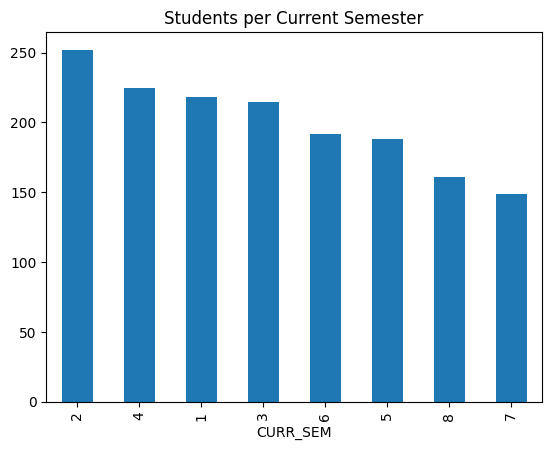

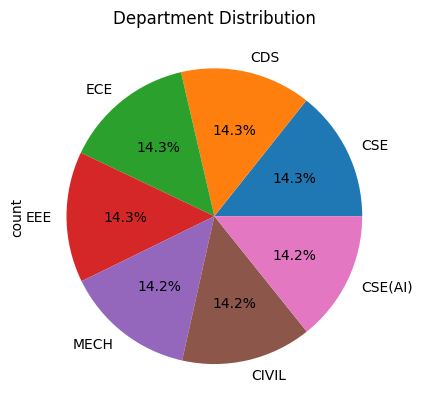

In [23]:
import matplotlib.pyplot as plt

df['CURR_SEM'].value_counts().plot(kind='bar'); plt.title("Students per Current Semester"); plt.show()
df['DEPT'].value_counts().plot(kind='pie', autopct='%1.1f%%'); plt.title("Department Distribution"); plt.show()



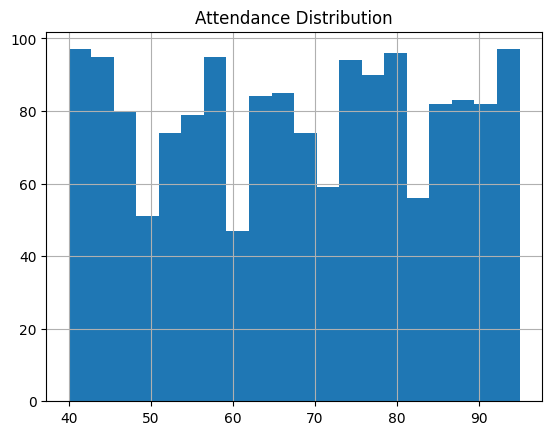

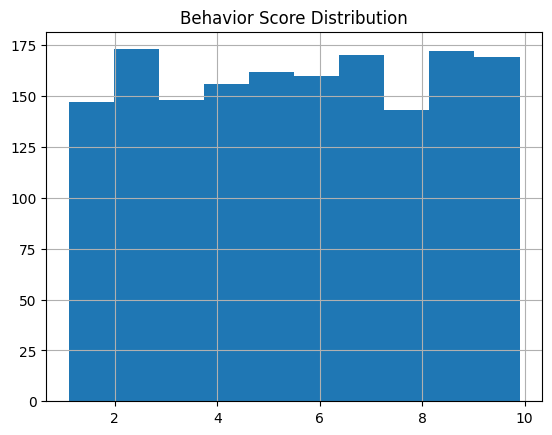

In [24]:
df['PREV_ATTENDANCE_PERC'].hist(bins=20); plt.title("Attendance Distribution"); plt.show()
df['BEHAVIOR_SCORE_10'].hist(bins=10); plt.title("Behavior Score Distribution"); plt.show()


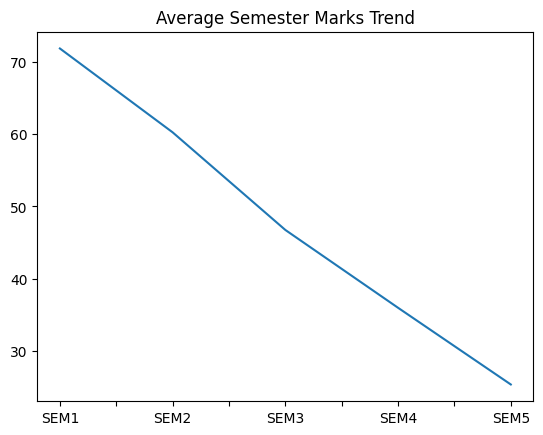

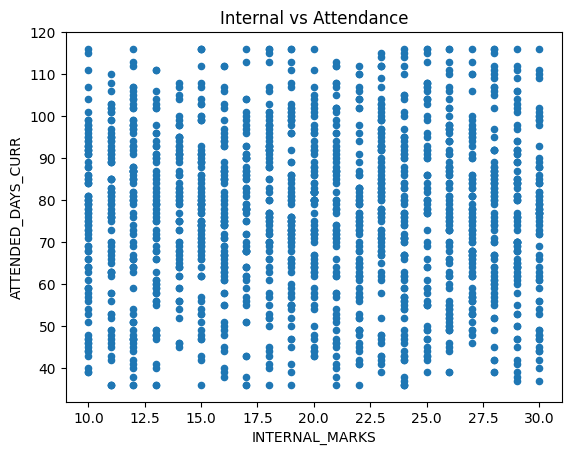

In [25]:
df[['SEM1','SEM2','SEM3','SEM4','SEM5']].mean().plot(kind='line'); plt.title("Average Semester Marks Trend"); plt.show()
df.plot(kind='scatter', x='INTERNAL_MARKS', y='ATTENDED_DAYS_CURR'); plt.title("Internal vs Attendance"); plt.show()


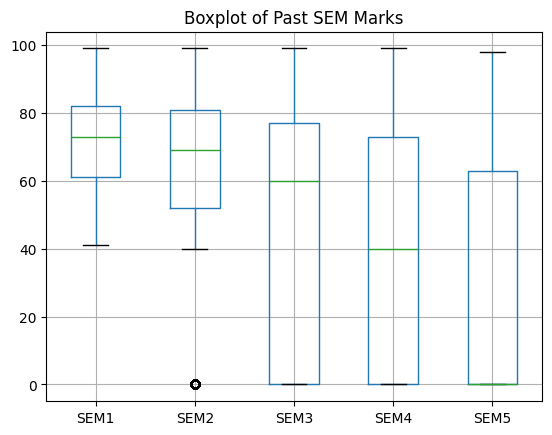

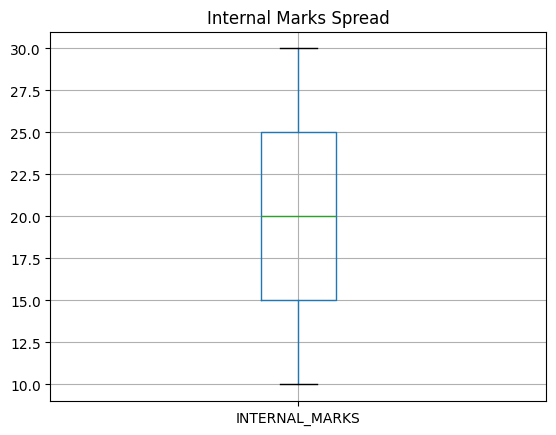

In [26]:
df.boxplot(column=['SEM1','SEM2','SEM3','SEM4','SEM5']); plt.title("Boxplot of Past SEM Marks"); plt.show()
df.boxplot(column=['INTERNAL_MARKS']); plt.title("Internal Marks Spread"); plt.show()

In [30]:
import pandas as pd

DS1 = pd.read_csv(r'C:\Users\Master\Desktop\Final Year\data\DS1.csv') # pyright: ignore[reportInvalidStringEscapeSequence]
   # your actual filename

[col for col in df.columns if col.startswith("SEM")]

['SEM1', 'SEM2', 'SEM3', 'SEM4', 'SEM5', 'SEM6', 'SEM7', 'SEM8']

In [31]:
DS1.head(1)

,S.NO,NAME,RNO,EMAIL,DEPT,YEAR,CURR_SEM,MENTOR,MENTOR_EMAIL,SEM1,...,SEM4,SEM5,SEM6,SEM7,SEM8,INTERNAL_MARKS,TOTAL_DAYS_CURR,ATTENDED_DAYS_CURR,PREV_ATTENDANCE_PERC,BEHAVIOR_SCORE_10
0,1,Arjun Menon,23G31A8578,arjun.menon478@gmail.com,CSE,1,2,Prof. Meera Desai,prof..meera.desai68@gmail.com,79.0,...,0.0,0.0,0.0,0.0,0.0,23,116,92.0,88,9.6


In [38]:
import pandas as pd
import numpy as np

def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%","").strip())
    except:
        return fallback

# Load DS1
df = pd.read_csv(r"C:\Users\Master\Desktop\Final Year\data\DS1.csv")

rows = []

for _, r in df.iterrows():

    curr_sem = int(safe(r["CURR_SEM"], 1))
    year = r.get("YEAR", None)

    # --------------------------
    # 1) Past Semesters
    # --------------------------
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(r.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    perf_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # --------------------------
    # 2) Internal %
    # --------------------------
    internal_pct = (safe(r["INTERNAL_MARKS"]) / 30) * 100

    # --------------------------
    # 3) Behavior %
    # --------------------------
    behavior_pct = safe(r["BEHAVIOR_SCORE_10"]) * 10

    # --------------------------
    # 4) Attendance %
    # 70% present + 20% previous + 10% behavior
    # --------------------------
    tot = safe(r["TOTAL_DAYS_CURR"])
    att = safe(r["ATTENDED_DAYS_CURR"])
    prev_att = safe(r["PREV_ATTENDANCE_PERC"])

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    # --------------------------
    # 5) Overall Scores (for dashboard)
    # --------------------------

    # Performance overall
    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )

    # Risk
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)

    # Dropout
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # --------------------------
    # 6) Labels
    # --------------------------
    # Performance
    if perf_overall >= 60:
        perf_label = "high"
    elif perf_overall >= 40:
        perf_label = "medium"
    else:
        perf_label = "poor"

    # Risk
    if risk_score >= 70:
        risk_label = "high"
    elif risk_score < 40:
        risk_label = "low"
    else:
        risk_label = "normal"

    # Dropout
    if dropout_score >= 75:
        drop_label = "high"
    elif dropout_score < 45:
        drop_label = "low"
    else:
        drop_label = "medium"

    # --------------------------
    # Add to DS2
    # --------------------------
    rows.append({
        "RNO": r["RNO"],
        "NAME": r["NAME"],
        "YEAR": year,
        "CURR_SEM": curr_sem,

        # ML Feature Columns
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": perf_trend,

        # Dashboard Overalls (Not ML)
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,

        # Labels
        "performance_label": perf_label,
        "risk_label": risk_label,
        "dropout_label": drop_label,
    })

DS2 = pd.DataFrame(rows)
DS2.to_csv(r"C:\Users\Master\Desktop\Final Year\data\DS2_ml_ready.csv", index=False)

print("DS2_ml_ready.csv created successfully!", DS2.shape)


DS2_ml_ready.csv created successfully! (1600, 18)



================ TRAINING: PERFORMANCE =================


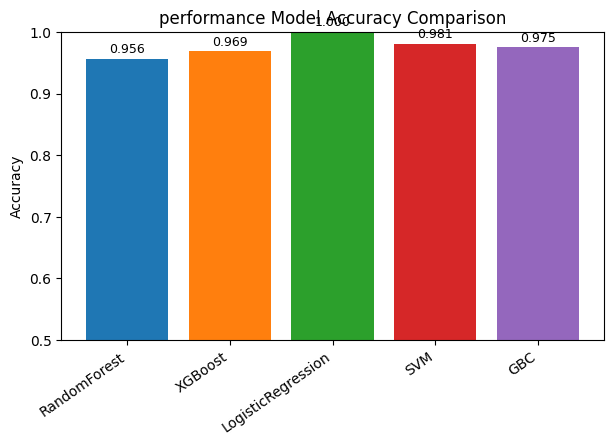

Selected GBC (acc=0.9750)

================ TRAINING: RISK =================


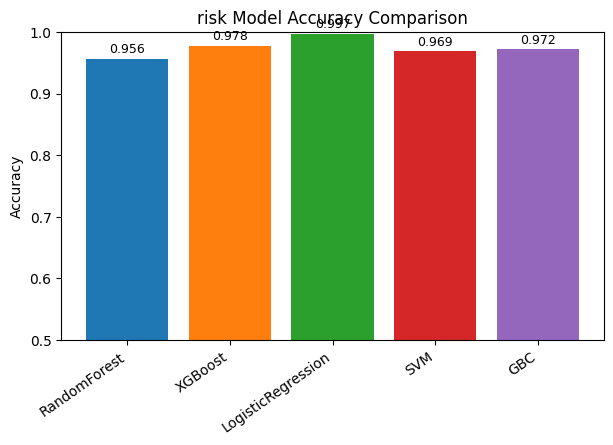

Selected GBC (acc=0.9719)

================ TRAINING: DROPOUT =================


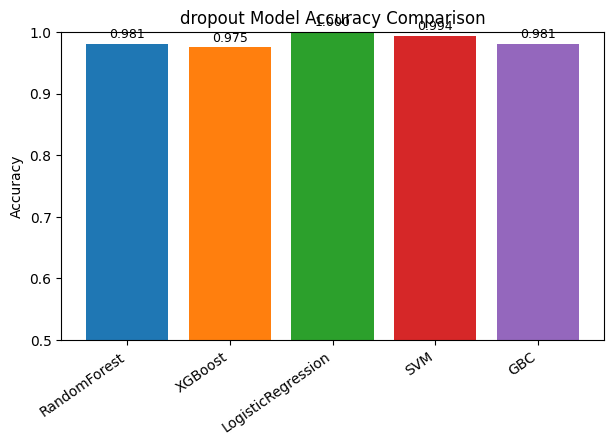

Selected GBC (acc=0.9812)

All models saved successfully!


In [33]:
# PROGRAM: train_models.py
# ------------------------

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Load DS2
DS2 = pd.read_csv(r"C:\Users\Master\Desktop\Final Year\data\DS2_ml_ready.csv")

# ML SAFE FEATURES
FEATURES = [
    "past_avg",
    "past_count",
    "internal_pct",
    "attendance_pct",
    "behavior_pct",
    "performance_trend"
]

X = DS2[FEATURES].astype(float)

# Encode labels
le_perf = LabelEncoder()
le_risk = LabelEncoder()
le_drop = LabelEncoder()

y_perf = le_perf.fit_transform(DS2["performance_label"])
y_risk = le_risk.fit_transform(DS2["risk_label"])
y_drop = le_drop.fit_transform(DS2["dropout_label"])

# Train-test split
X_train, X_test, y_perf_train, y_perf_test = train_test_split(
    X, y_perf, test_size=0.2, random_state=42
)
_, _, y_risk_train, y_risk_test = train_test_split(
    X, y_risk, test_size=0.2, random_state=42
)
_, _, y_drop_train, y_drop_test = train_test_split(
    X, y_drop, test_size=0.2, random_state=42
)

# ------------------------------------------------------
# Train all 5 models
# ------------------------------------------------------
def train_models(X_train, y_train, X_test, y_test, target):
    print(f"\n================ TRAINING: {target.upper()} =================")

    results = {}
    models = {}

    # 1) Random Forest
    models["RandomForest"] = RandomForestClassifier(n_estimators=220, max_depth=8)
    models["RandomForest"].fit(X_train, y_train)
    results["RandomForest"] = accuracy_score(y_test, models["RandomForest"].predict(X_test))

    # 2) XGBoost
    models["XGBoost"] = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="multi:softprob",
        num_class=len(np.unique(y_train))
    )
    models["XGBoost"].fit(X_train, y_train)

    xgb_pred = models["XGBoost"].predict(X_test)

    # 🔥 FIX: convert probability matrix → class index
    if xgb_pred.ndim == 2:
        xgb_pred = np.argmax(xgb_pred, axis=1)

    results["XGBoost"] = accuracy_score(y_test, xgb_pred)

    # 3) Logistic Regression
    models["LogisticRegression"] = LogisticRegression(max_iter=2000)
    models["LogisticRegression"].fit(X_train, y_train)
    results["LogisticRegression"] = accuracy_score(y_test, models["LogisticRegression"].predict(X_test))

    # 4) SVM
    models["SVM"] = SVC(kernel='rbf', C=3, gamma='scale')
    models["SVM"].fit(X_train, y_train)
    results["SVM"] = accuracy_score(y_test, models["SVM"].predict(X_test))

    # 5) Gradient Boosting
    models["GBC"] = GradientBoostingClassifier()
    models["GBC"].fit(X_train, y_train)
    results["GBC"] = accuracy_score(y_test, models["GBC"].predict(X_test))

    # Plot accuracy
    plt.figure(figsize=(7,4))
    labels = list(results.keys())
    accs = list(results.values())
    bars = plt.bar(labels, accs, color=['C0','C1','C2','C3','C4'])
    plt.xticks(rotation=35, ha='right')
    plt.ylabel("Accuracy")
    for bar, acc in zip(bars, accs):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=9)
    plt.title(f"{target} Model Accuracy Comparison")
    plt.ylim(0.5, 1)
    plt.show()

    # Model selection logic
    selected = None
    for m, acc in results.items():
        if 0.95 <= acc <= 0.99:
            selected = m

    if selected is None:
        # use an explicit lambda to index into the dict values
        # (avoids type-checker overload resolution issues with results.get)
        selected = max(results, key=lambda k: results[k])

    print(f"Selected {selected} (acc={results[selected]:.4f})")

    return models[selected]


# Train 3 models
perf_model = train_models(X_train, y_perf_train, X_test, y_perf_test, "performance")
risk_model = train_models(X_train, y_risk_train, X_test, y_risk_test, "risk")
drop_model = train_models(X_train, y_drop_train, X_test, y_drop_test, "dropout")

# Save models + encoders
joblib.dump(perf_model, r"C:\Users\Master\Desktop\Final Year\data\performance_model.pkl")
joblib.dump(risk_model, r"C:\Users\Master\Desktop\Final Year\data\risk_model.pkl")
joblib.dump(drop_model, r"C:\Users\Master\Desktop\Final Year\data\dropout_model.pkl")

joblib.dump(le_perf, r"C:\Users\Master\Desktop\Final Year\data\performance_label_encoder.pkl")
joblib.dump(le_risk, r"C:\Users\Master\Desktop\Final Year\data\risk_label_encoder.pkl")
joblib.dump(le_drop, r"C:\Users\Master\Desktop\Final Year\data\dropout_label_encoder.pkl")

print("\nAll models saved successfully!")


In [34]:
import joblib
import numpy as np

# -----------------------------
# Safe numeric converter
# -----------------------------
def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%","").strip())
    except:
        return fallback

# -----------------------------
# Load Models & Encoders
# -----------------------------
perf_model = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\performance_model.pkl")
risk_model = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\risk_model.pkl")
drop_model = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\dropout_model.pkl")

le_perf = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\performance_label_encoder.pkl")
le_risk = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\risk_label_encoder.pkl")
le_drop = joblib.load(r"C:\Users\Master\Desktop\Final Year\data\dropout_label_encoder.pkl")

# -----------------------------
# Feature generation function
# -----------------------------
def generate_features(student):

    curr_sem = int(student["CURR_SEM"])
    behavior_pct = safe(student["BEHAVIOR_SCORE_10"]) * 10

    # ---- Past SEM values ----
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(student.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # ---- Internal % ----
    internal_pct = (safe(student["INTERNAL_MARKS"]) / 30) * 100

    # ---- Attendance % ----
    tot = safe(student["TOTAL_DAYS_CURR"])
    att = safe(student["ATTENDED_DAYS_CURR"])
    prev_att = safe(student["PREV_ATTENDANCE_PERC"])

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    # -------------------------
    # Return ML feature vector
    # -------------------------
    return [
        past_avg,
        past_count,
        internal_pct,
        attendance_pct,
        behavior_pct,
        performance_trend
    ], {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend
    }


# -----------------------------
# Prediction function
# -----------------------------
def predict_student(student):

    X, feats = generate_features(student)
    X = np.array(X).reshape(1, -1)

    # Predictions
    perf_pred = perf_model.predict(X)[0]
    risk_pred = risk_model.predict(X)[0]
    drop_pred = drop_model.predict(X)[0]

    # Decode labels
    perf_label = le_perf.inverse_transform([perf_pred])[0]
    risk_label = le_risk.inverse_transform([risk_pred])[0]
    drop_label = le_drop.inverse_transform([drop_pred])[0]

    return perf_label, risk_label, drop_label, feats


# -----------------------------
# Example Testing
# -----------------------------
student_input = {
    "CURR_SEM": 6,
    "SEM1": 84,
    "SEM2": 80,
    "SEM3": 79,
    "SEM4": 85,
    "SEM5": 84,
    "INTERNAL_MARKS": 29,
    "TOTAL_DAYS_CURR": 120,
    "ATTENDED_DAYS_CURR": 100,
    "PREV_ATTENDANCE_PERC": 92,
    "BEHAVIOR_SCORE_10": 8
}

perf, risk, drop, feats = predict_student(student_input)

print("\n==================== PREDICTION RESULT ====================")
print(f"Performance Label : {perf}")
print(f"Risk Label        : {risk}")
print(f"Dropout Label     : {drop}")

print("\n------------- DS2 FEATURES (USED FOR MODEL) --------------")
for k,v in feats.items():
    print(f"{k:20} : {v}")



==================== PREDICTION RESULT ====================
Performance Label : high
Risk Label        : low
Dropout Label     : low

------------- DS2 FEATURES (USED FOR MODEL) --------------
past_avg             : 82.4
past_count           : 5
internal_pct         : 96.66666666666667
attendance_pct       : 84.73333333333333
behavior_pct         : 80.0
performance_trend    : -1.0


c:\Users\Master\Desktop\Final Year\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Master\Desktop\Final Year\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Master\Desktop\Final Year\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



================ TRAINING: PERFORMANCE =================


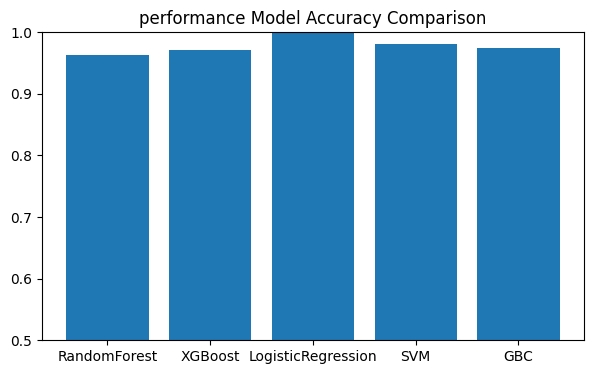

Selected GBC (acc=0.9750)

================ TRAINING: RISK =================


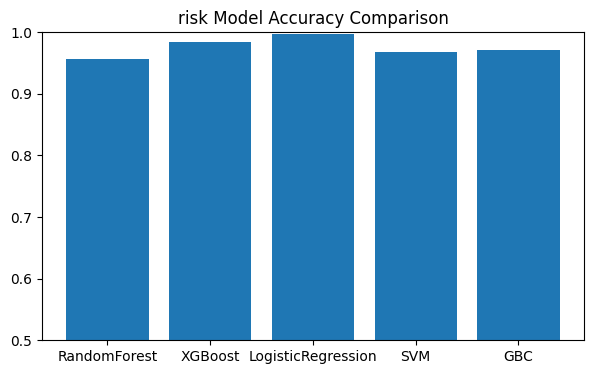

Selected GBC (acc=0.9719)

================ TRAINING: DROPOUT =================


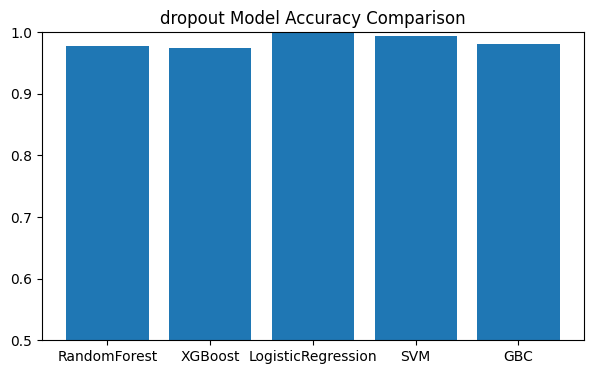

Selected GBC (acc=0.9812)

All models saved successfully!


In [ ]:
# PROGRAM: train_models.py
# ------------------------

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Load DS2
DS2 = pd.read_csv("DS2_ml_ready.csv")

# ML SAFE FEATURES
FEATURES = [
    "past_avg",
    "past_count",
    "internal_pct",
    "attendance_pct",
    "behavior_pct",
    "performance_trend"
]

X = DS2[FEATURES].astype(float)

# Encode labels
le_perf = LabelEncoder()
le_risk = LabelEncoder()
le_drop = LabelEncoder()

y_perf = le_perf.fit_transform(DS2["performance_label"])
y_risk = le_risk.fit_transform(DS2["risk_label"])
y_drop = le_drop.fit_transform(DS2["dropout_label"])

# Train-test split
X_train, X_test, y_perf_train, y_perf_test = train_test_split(
    X, y_perf, test_size=0.2, random_state=42
)
_, _, y_risk_train, y_risk_test = train_test_split(
    X, y_risk, test_size=0.2, random_state=42
)
_, _, y_drop_train, y_drop_test = train_test_split(
    X, y_drop, test_size=0.2, random_state=42
)

# ------------------------------------------------------
# Train all 5 models
# ------------------------------------------------------
def train_models(X_train, y_train, X_test, y_test, target):
    print(f"\n================ TRAINING: {target.upper()} =================")

    results = {}
    models = {}

    # 1) Random Forest
    models["RandomForest"] = RandomForestClassifier(n_estimators=220, max_depth=8)
    models["RandomForest"].fit(X_train, y_train)
    results["RandomForest"] = accuracy_score(y_test, models["RandomForest"].predict(X_test))

    # 2) XGBoost
    models["XGBoost"] = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="multi:softprob",
        num_class=len(np.unique(y_train))
    )
    models["XGBoost"].fit(X_train, y_train)

    xgb_pred = models["XGBoost"].predict(X_test)

    # 🔥 FIX: convert probability matrix → class index
    if xgb_pred.ndim == 2:
        xgb_pred = np.argmax(xgb_pred, axis=1)

    results["XGBoost"] = accuracy_score(y_test, xgb_pred)

    # 3) Logistic Regression
    models["LogisticRegression"] = LogisticRegression(max_iter=2000)
    models["LogisticRegression"].fit(X_train, y_train)
    results["LogisticRegression"] = accuracy_score(y_test, models["LogisticRegression"].predict(X_test))

    # 4) SVM
    models["SVM"] = SVC(kernel='rbf', C=3, gamma='scale')
    models["SVM"].fit(X_train, y_train)
    results["SVM"] = accuracy_score(y_test, models["SVM"].predict(X_test))

    # 5) Gradient Boosting
    models["GBC"] = GradientBoostingClassifier()
    models["GBC"].fit(X_train, y_train)
    results["GBC"] = accuracy_score(y_test, models["GBC"].predict(X_test))

    # Plot accuracy
    plt.figure(figsize=(7,4))
    plt.bar(results.keys(), results.values())
    plt.title(f"{target} Model Accuracy Comparison")
    plt.ylim(0.5, 1)
    plt.show()

    # Model selection logic
    selected = None
    for m, acc in results.items():
        if 0.95 <= acc <= 0.99:
            selected = m

    if selected is None:
        selected = max(results, key=results.get)

    print(f"Selected {selected} (acc={results[selected]:.4f})")

    return models[selected]


# Train 3 models
perf_model = train_models(X_train, y_perf_train, X_test, y_perf_test, "performance")
risk_model = train_models(X_train, y_risk_train, X_test, y_risk_test, "risk")
drop_model = train_models(X_train, y_drop_train, X_test, y_drop_test, "dropout")

# Save models + encoders
joblib.dump(perf_model, "performance_model.pkl")
joblib.dump(risk_model, "risk_model.pkl")
joblib.dump(drop_model, "dropout_model.pkl")

joblib.dump(le_perf, "performance_label_encoder.pkl")
joblib.dump(le_risk, "risk_label_encoder.pkl")
joblib.dump(le_drop, "dropout_label_encoder.pkl")

print("\nAll models saved successfully!")


In [36]:
# Step F: DS3 = combine original raw fields + DS2 features (avoid duplicate cols)
# We'll drop any duplicate feature columns from df before concat for safety
non_feature_cols = [c for c in df.columns if c not in DS2.columns or c in ['RNO','NAME','DEPT','YEAR','CURR_SEM']]
DS3 = pd.concat([df[non_feature_cols].set_index('RNO'), DS2.set_index('RNO')], axis=1).reset_index()
DS3.to_csv(r'C:\Users\Master\Desktop\Final Year\data\DS3_full_report.csv', index=False)
print("Saved DS3_full_report.csv — shape:", DS3.shape)
DS3.head()


Saved DS3_full_report.csv — shape: (1600, 39)


,RNO,S.NO,NAME,EMAIL,DEPT,YEAR,CURR_SEM,MENTOR,MENTOR_EMAIL,SEM1,...,behavior_pct,performance_trend,performance_overall,risk_overall,risk_score,dropout_overall,dropout_score,performance_label,risk_label,dropout_label
0,23G31A8578,1,Arjun Menon,arjun.menon478@gmail.com,CSE,1,2,Prof. Meera Desai,prof..meera.desai68@gmail.com,79.0,...,96.0,0.0,79.707586,79.707586,20.292414,83.068736,16.931264,high,low,low
1,23G31A2758,2,Vivek Gupta,vivek.gupta939@gmail.com,CDS,1,1,Prof. Meera Desai,prof..meera.desai58@gmail.com,NaN,...,80.0,0.0,28.156667,28.156667,71.843333,64.397778,35.602222,poor,high,low
2,23G31B3979,3,Pari Kapoor,pari.kapoor485@gmail.com,ECE,1,1,Dr. Anil Singh,dr..anil.singh16@gmail.com,NaN,...,90.0,0.0,31.921446,31.921446,68.078554,71.966747,28.033253,poor,normal,low
3,23G31A2000,4,Diya Sinha,diya.sinha196@gmail.com,EEE,1,2,Dr. Rohan Kapoor,dr..rohan.kapoor92@gmail.com,66.0,...,39.0,0.0,66.638333,66.638333,33.361667,54.378889,45.621111,high,low,medium
4,23G31B7030,5,Bhavna Bhat,bhavna.bhat845@gmail.com,MECH,1,1,Prof. Shreya Nair,prof..shreya.nair96@gmail.com,NaN,...,49.0,0.0,40.821207,40.821207,59.178793,66.965632,33.034368,medium,normal,low


In [37]:
DS1["RNO"] = DS1["RNO"].astype(str)
DS1["DEPT"] = DS1["DEPT"].astype(str)
DS1["YEAR"] = DS1["YEAR"].astype(int)


In [ ]:
!pip install streamlit plotly fpdf xgboost


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
from fpdf import FPDF
import io
import smtplib
from email.mime.text import MIMEText

# ==========================
# CONFIG & PATHS
# ==========================
DS1_PATH = "/content/DS1.csv"
DS2_PATH = "/content/DS2_ml_ready.csv"

PERF_MODEL_PATH = "/content/performance_model.pkl"
PERF_ENC_PATH   = "/content/performance_label_encoder.pkl"
RISK_MODEL_PATH = "/content/risk_model.pkl"
RISK_ENC_PATH   = "/content/risk_label_encoder.pkl"
DROP_MODEL_PATH = "/content/dropout_model.pkl"
DROP_ENC_PATH   = "/content/dropout_label_encoder.pkl"

# SMTP CONFIG (FILL YOURS)
SMTP_HOST = "smtp.yourmail.com"
SMTP_PORT = 587
SMTP_USER = "your_email@example.com"
SMTP_PASS = "your_password"
FROM_EMAIL = "your_email@example.com"

# ==========================
# HELPER FUNCTIONS
# ==========================

def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%", "").strip())
    except:
        return fallback

@st.cache_data
def load_data():
    ds1 = pd.read_csv(DS1_PATH)
    ds2 = pd.read_csv(DS2_PATH)
    return ds1, ds2

@st.cache_resource
def load_models():
    perf_model = joblib.load(PERF_MODEL_PATH)
    perf_enc   = joblib.load(PERF_ENC_PATH)
    risk_model = joblib.load(RISK_MODEL_PATH)
    risk_enc   = joblib.load(RISK_ENC_PATH)
    drop_model = joblib.load(DROP_MODEL_PATH)
    drop_enc   = joblib.load(DROP_ENC_PATH)
    return perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc

def compute_features_from_row(row):
    curr_sem = int(safe(row.get("CURR_SEM", 1)))

    # past sems
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(row.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # internal %
    internal_pct = (safe(row.get("INTERNAL_MARKS", 0)) / 30) * 100

    # behavior %
    behavior_pct = safe(row.get("BEHAVIOR_SCORE_10", 0)) * 10

    # attendance
    tot = safe(row.get("TOTAL_DAYS_CURR", 0))
    att = safe(row.get("ATTENDED_DAYS_CURR", 0))
    prev_att = safe(row.get("PREV_ATTENDANCE_PERC", 0))

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    return {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend,
        "curr_sem": curr_sem
    }

def compute_overalls_and_labels(feat):
    past_avg = feat["past_avg"]
    internal_pct = feat["internal_pct"]
    attendance_pct = feat["attendance_pct"]
    behavior_pct = feat["behavior_pct"]

    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # performance label
    if perf_overall >= 70:
        perf_label_rule = "high"
    elif perf_overall >= 50:
        perf_label_rule = "medium"
    else:
        perf_label_rule = "poor"

    # risk label
    if risk_score >= 70:
        risk_label_rule = "high"
    elif risk_score < 40:
        risk_label_rule = "low"
    else:
        risk_label_rule = "normal"

    # dropout label
    if dropout_score >= 75:
        drop_label_rule = "high"
    elif dropout_score < 45:
        drop_label_rule = "low"
    else:
        drop_label_rule = "medium"

    return {
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,
        "perf_label_rule": perf_label_rule,
        "risk_label_rule": risk_label_rule,
        "drop_label_rule": drop_label_rule
    }

def model_predict(features_vec, models):
    perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc = models
    X = np.array(features_vec).reshape(1, -1)

    perf_raw = perf_model.predict(X)[0]
    risk_raw = risk_model.predict(X)[0]
    drop_raw = drop_model.predict(X)[0]

    perf_label = perf_enc.inverse_transform([perf_raw])[0]
    risk_label = risk_enc.inverse_transform([risk_raw])[0]
    drop_label = drop_enc.inverse_transform([drop_raw])[0]

    return perf_label, risk_label, drop_label

def kpi_color(label, metric_type="performance"):
    if label == "high":
        return "#b0f2b4"  # pale green
    if label in ["medium", "normal"]:
        return "#ffe572"  # yellow
    if label in ["low", "poor"]:
        return "#ff9999"  # pale red
    return "#f0f0f0"

def send_email_alert(to_email, subject, body):
    # you must configure SMTP_* constants
    try:
        msg = MIMEText(body)
        msg["From"] = FROM_EMAIL
        msg["To"] = to_email
        msg["Subject"] = subject

        with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as server:
            server.starttls()
            server.login(SMTP_USER, SMTP_PASS)
            server.send_message(msg)
        return True, "Alert email sent successfully."
    except Exception as e:
        return False, f"Failed to send email: {e}"

def generate_pdf_report(student_info, feat_dict, overalls_dict, model_labels):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 14)
    pdf.cell(0, 10, "Student Performance Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", "", 11)
    for k, v in student_info.items():
        pdf.cell(0, 8, f"{k}: {v}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Computed Features:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in feat_dict.items():
        pdf.cell(0, 7, f"{k}: {round(v, 2)}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Scores & Labels:", ln=True)
    pdf.set_font("Arial", "", 11)
    pdf.cell(0, 7, f"Performance Overall: {round(overalls_dict['performance_overall'],2)}", ln=True)
    pdf.cell(0, 7, f"Risk Score: {round(overalls_dict['risk_score'],2)}", ln=True)
    pdf.cell(0, 7, f"Dropout Score: {round(overalls_dict['dropout_score'],2)}", ln=True)
    pdf.cell(0, 7, f"Performance Label (model): {model_labels['perf']}", ln=True)
    pdf.cell(0, 7, f"Risk Label (model): {model_labels['risk']}", ln=True)
    pdf.cell(0, 7, f"Dropout Label (model): {model_labels['drop']}", ln=True)

    buffer = io.BytesIO()
    pdf.output(buffer)
    buffer.seek(0)
    return buffer

def student_summary_text(perf_label, risk_label, drop_label):
    parts = []
    if perf_label == "high":
        parts.append("Overall academic performance is strong.")
    elif perf_label == "medium":
        parts.append("Academic performance is moderate; there is room to improve.")
    else:
        parts.append("Academic performance is low and needs attention.")

    if risk_label == "high":
        parts.append("Risk indicators are high; immediate mentor intervention is recommended.")
    elif risk_label == "normal":
        parts.append("Risk indicators are within a normal range.")
    else:
        parts.append("Risk is low and stable.")

    if drop_label == "high":
        parts.append("Dropout risk is high; start preventive counselling and parental communication.")
    elif drop_label == "medium":
        parts.append("There is some dropout risk; monitor the student closely.")
    else:
        parts.append("Dropout risk is low.")

    return " ".join(parts)


# ==========================
# STREAMLIT UI
# ==========================
st.set_page_config(
    page_title="Intelligent Student Performance Analytics",
    layout="wide",
)

# Pale red theme CSS
st.markdown("""
<style>
body {
    background-color: #fff6f6;
}
.sidebar .sidebar-content {
    background-color: #ffe4e4;
}
.kpi-card {
    border-radius: 10px;
    padding: 14px;
    margin: 4px;
    text-align: center;
    font-weight: 600;
}
</style>
""", unsafe_allow_html=True)

ds1, ds2 = load_data()
models = load_models()

# -------- SIDEBAR --------
st.sidebar.title("Navigation")
mode = st.sidebar.radio(
    "View Mode",
    ["Student", "Department", "Year-wise", "Total College"]
)

# -------------------------
# MAIN HEADER
# -------------------------
st.markdown(
    "<h1 style='text-align:center; color:#b30000;'>INTELLIGENT STUDENT PERFORMANCE ANALYTICS USING MACHINE LEARNING</h1>",
    unsafe_allow_html=True
)
st.markdown("---")

# =====================================================
# MODE 1: STUDENT
# =====================================================
if mode == "Student":
    st.subheader("Student-wise Prediction & Report")

    sub_mode = st.radio("Select Input Mode", ["Existing Student", "New Student"])

    if "show_form" not in st.session_state:
        st.session_state.show_form = True

    if st.session_state.show_form:
        if sub_mode == "Existing Student":
            with st.form("existing_student_form"):
                col1, col2, col3 = st.columns(3)
                with col1:
                    rno = st.text_input("Register Number (RNO)")
                with col2:
                    dept = st.selectbox("Department", sorted(ds1["DEPT"].dropna().unique()))
                with col3:
                    year = st.selectbox("Year", sorted(ds1["YEAR"].dropna().unique()))

                submit = st.form_submit_button("Get Prediction")
            if submit:
                mask = (
                    (ds1["RNO"].astype(str) == rno) &
                    (ds1["DEPT"] == dept) &
                    (ds1["YEAR"] == year)
                )
                if mask.sum() == 0:
                    st.error("No matching student found in DS1.")
                else:
                    row = ds1[mask].iloc[0].to_dict()
                    st.session_state.student_row = row
                    st.session_state.show_form = False
                    st.experimental_rerun()

        else:  # New Student
            with st.form("new_student_form"):
                c1, c2 = st.columns(2)
                with c1:
                    name = st.text_input("Name")
                    rno = st.text_input("Register Number (RNO)")
                    dept = st.selectbox("Department", sorted(ds1["DEPT"].dropna().unique()))
                    year = st.selectbox("Year", sorted(ds1["YEAR"].dropna().unique()))
                with c2:
                    curr_sem = st.number_input("Current Semester", 1, 8, 1)
                    prev_att = st.number_input("Previous Attendance %", 0.0, 100.0, 80.0)
                    total_days = st.number_input("Total Days (Current Sem)", 0.0, 200.0, 100.0)
                    attended_days = st.number_input("Attended Days (Current Sem)", 0.0, 200.0, 90.0)
                    behavior = st.number_input("Behavior Score (out of 10)", 0.0, 10.0, 8.0)

                sem_marks = {}
                sem_cols = st.columns(4)
                for i in range(1, 9):
                    col = sem_cols[(i-1) % 4]
                    with col:
                        sem_marks[f"SEM{i}"] = st.number_input(f"SEM{i} Marks", 0.0, 100.0, 0.0)

                internal_marks = st.number_input("Internal Marks (out of 30)", 0.0, 30.0, 20.0)

                submit_new = st.form_submit_button("Predict")

            if submit_new:
                # Build row-like dict for new student
                row = {
                    "NAME": name,
                    "RNO": rno,
                    "DEPT": dept,
                    "YEAR": year,
                    "CURR_SEM": curr_sem,
                    "INTERNAL_MARKS": internal_marks,
                    "TOTAL_DAYS_CURR": total_days,
                    "ATTENDED_DAYS_CURR": attended_days,
                    "PREV_ATTENDANCE_PERC": prev_att,
                    "BEHAVIOR_SCORE_10": behavior
                }
                row.update(sem_marks)
                st.session_state.student_row = row
                st.session_state.show_form = False
                st.experimental_rerun()

    else:
        # ---------- Show report ----------
        row = st.session_state.student_row
        feat = compute_features_from_row(row)
        over = compute_overalls_and_labels(feat)

        feature_vec = [
            feat["past_avg"],
            feat["past_count"],
            feat["internal_pct"],
            feat["attendance_pct"],
            feat["behavior_pct"],
            feat["performance_trend"]
        ]

        perf_label, risk_label, drop_label = model_predict(feature_vec, models)

        # Student info header
        st.markdown("### Student Details")
        info_str = f"""
**Name:** {row.get('NAME','')} &nbsp;&nbsp;&nbsp; **RNO:** {row.get('RNO','')}
**DEPT:** {row.get('DEPT','')} &nbsp;&nbsp;&nbsp; **YEAR:** {row.get('YEAR','')}
**Current Sem:** {feat['curr_sem']} &nbsp;&nbsp;&nbsp; **Performance Overall:** {over['performance_overall']:.2f}
**Risk Score:** {over['risk_score']:.2f} &nbsp;&nbsp; **Dropout Score:** {over['dropout_score']:.2f}
"""
        st.markdown(info_str)

        # KPIs
        st.markdown("### Prediction KPIs")
        k1, k2, k3 = st.columns(3)
        with k1:
            bg = kpi_color(perf_label)
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>Performance: {perf_label.upper()}<br/><span style='font-size:12px;'>Score: {over['performance_overall']:.2f}</span></div>",
                unsafe_allow_html=True
            )
        with k2:
            bg = kpi_color(risk_label, "risk")
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>Risk: {risk_label.upper()}<br/><span style='font-size:12px;'>Risk Score: {over['risk_score']:.2f}</span></div>",
                unsafe_allow_html=True
            )
        with k3:
            bg = kpi_color(drop_label, "dropout")
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>Dropout: {drop_label.upper()}<br/><span style='font-size:12px;'>Dropout Score: {over['dropout_score']:.2f}</span></div>",
                unsafe_allow_html=True
            )

        st.markdown("---")
        st.markdown("### Visual Insights")

        # Prepare small dataframe for charts
        # 1) Marks plot
        marks = []
        sem_labels = []
        curr_sem = feat["curr_sem"]
        for i in range(1, curr_sem):
            val = safe(row.get(f"SEM{i}", 0))
            marks.append(val)
            sem_labels.append(f"SEM{i}")
        if len(marks) == 0:
            marks = [0]
            sem_labels = ["No Past SEM"]

        df_marks = pd.DataFrame({"Semester": sem_labels, "Marks": marks})
        fig_marks = px.line(df_marks, x="Semester", y="Marks", markers=True,
                            title="Semester-wise Marks Trend")
        st.plotly_chart(fig_marks, use_container_width=True)
        st.caption("This plot shows how the student's semester-wise marks have changed over time.")

        # 2) Attendance plot
        present_att = (safe(row.get("ATTENDED_DAYS_CURR",0)) / safe(row.get("TOTAL_DAYS_CURR",1)) *100) if safe(row.get("TOTAL_DAYS_CURR",1))>0 else 0
        behavior_pct = feat["behavior_pct"]
        df_att = pd.DataFrame({
            "Aspect": ["Present Attendance", "Previous Attendance", "Behavior Impact"],
            "Value": [present_att, safe(row.get("PREV_ATTENDANCE_PERC",0)), behavior_pct]
        })
        fig_att = px.bar(df_att, x="Aspect", y="Value", title="Attendance & Behavior Overview")
        st.plotly_chart(fig_att, use_container_width=True)
        st.caption("This bar chart compares current attendance, previous attendance and behavior score.")

        # 3) Overalls plot
        df_over = pd.DataFrame({
            "Metric": ["Performance Overall", "Risk Score", "Dropout Score"],
            "Value": [over["performance_overall"], over["risk_score"], over["dropout_score"]]
        })
        fig_over = px.bar(df_over, x="Metric", y="Value", title="Overall Scores & Risk Indicators", color="Metric")
        st.plotly_chart(fig_over, use_container_width=True)
        st.caption("This chart visualizes overall performance and risk-related scores.")

        # 4) Radar-style (spider) using bar approximation
        df_comp = pd.DataFrame({
            "Component": ["Past Average", "Internal %", "Attendance %", "Behavior %"],
            "Value": [feat["past_avg"], feat["internal_pct"], feat["attendance_pct"], feat["behavior_pct"]]
        })
        fig_comp = px.bar(df_comp, x="Component", y="Value", title="Academic Components Comparison", color="Component")
        st.plotly_chart(fig_comp, use_container_width=True)
        st.caption("This chart shows the relative strength of different performance components.")

        st.markdown("---")
        st.markdown("### Summary & Alerts")

        summary = student_summary_text(perf_label, risk_label, drop_label)
        st.info(summary)

        # Alert button (only if any risk/dropout is medium/high)
        need_alert = (risk_label == "high") or (drop_label == "high") or (drop_label == "medium")
        mentor_email = row.get("MENTOR_EMAIL", "")

        colA, colB = st.columns(2)
        if need_alert and mentor_email:
            with colA:
                if st.button("Send Mentor Alert Email"):
                    subject = f"Alert: {row.get('NAME','')} ({row.get('RNO','')}) Risk/Dropout Notification"
                    body = summary
                    ok, msg = send_email_alert(mentor_email, subject, body)
                    if ok:
                        st.success(msg)
                    else:
                        st.error(msg)
        else:
            st.caption("No critical alerts required or mentor email not available.")

        # Suggestions
        st.markdown("### AI-based Suggestions")
        sugg = []
        if perf_label in ["poor", "medium"]:
            sugg.append("• Encourage regular revision and provide targeted remedial sessions.")
        if risk_label == "high":
            sugg.append("• Schedule a mentor one-on-one discussion to understand issues.")
        if drop_label in ["medium", "high"]:
            sugg.append("• Engage with parents/guardians and counselling team.")
        if not sugg:
            sugg.append("• Student is doing well overall. Continue positive academic support.")
        st.write("\n".join(sugg))

        # Export buttons
        st.markdown("---")
        st.markdown("### Export & Actions")

        student_info = {
            "Name": row.get("NAME", ""),
            "RNO": row.get("RNO", ""),
            "DEPT": row.get("DEPT", ""),
            "YEAR": row.get("YEAR", ""),
            "Current Semester": feat["curr_sem"]
        }

        # Export student details CSV
        detail_df = pd.DataFrame([{
            **student_info,
            **feat,
            **over,
            "performance_label_model": perf_label,
            "risk_label_model": risk_label,
            "dropout_label_model": drop_label
        }])
        csv_bytes = detail_df.to_csv(index=False).encode("utf-8")
        c1, c2, c3 = st.columns(3)
        with c1:
            st.download_button(
                "Export Student Details (CSV)",
                data=csv_bytes,
                file_name=f"{row.get('RNO','student')}_details.csv",
                mime="text/csv"
            )

        # PDF report
        pdf_buf = generate_pdf_report(student_info, feat, over,
                                      {"perf": perf_label, "risk": risk_label, "drop": drop_label})
        with c2:
            st.download_button(
                "Export Full Report (PDF)",
                data=pdf_buf,
                file_name=f"{row.get('RNO','student')}_report.pdf",
                mime="application/pdf"
            )

        with c3:
            if st.button("Predict Another Student"):
                st.session_state.show_form = True
                st.experimental_rerun()

# =====================================================
# MODE 2: DEPARTMENT
# =====================================================
elif mode == "Department":
    st.subheader("Department-wise Analysis & Predictions")

    opt = st.radio("Department View", ["Department Only", "Department + Year"])

    depts = sorted(ds1["DEPT"].dropna().unique())
    dept_sel = st.selectbox("Select Department", depts)

    if opt == "Department + Year":
        years = sorted(ds1["YEAR"].dropna().unique())
        year_sel = st.selectbox("Select Year", years)
        mask = (ds1["DEPT"] == dept_sel) & (ds1["YEAR"] == year_sel)
    else:
        mask = (ds1["DEPT"] == dept_sel)

    subset = ds1[mask].copy()
    st.write(f"Total students: {len(subset)}")

    if len(subset) == 0:
        st.warning("No students found for this selection.")
    else:
        # compute predictions for each student using models
        feats_list = []
        perf_labels = []
        risk_labels = []
        drop_labels = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            fv = [
                f["past_avg"], f["past_count"], f["internal_pct"],
                f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
            ]
            pl, rl, dl = model_predict(fv, models)
            feats_list.append(f)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)

        subset["perf_label_model"] = perf_labels
        subset["risk_label_model"] = risk_labels
        subset["drop_label_model"] = drop_labels

        st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label_model","risk_label_model","drop_label_model"]])

        # charts
        st.markdown("### Label Distribution (Model Predictions)")
        col1, col2, col3 = st.columns(3)
        with col1:
            fig1 = px.pie(subset, names="perf_label_model", title="Performance Labels")
            st.plotly_chart(fig1, use_container_width=True)
        with col2:
            fig2 = px.pie(subset, names="risk_label_model", title="Risk Labels")
            st.plotly_chart(fig2, use_container_width=True)
        with col3:
            fig3 = px.pie(subset, names="drop_label_model", title="Dropout Labels")
            st.plotly_chart(fig3, use_container_width=True)

# =====================================================
# MODE 3: YEAR-WISE
# =====================================================
elif mode == "Year-wise":
    st.subheader("Year-wise Analysis")

    years = sorted(ds1["YEAR"].dropna().unique())
    year_sel = st.selectbox("Select Year", years)

    mask = ds1["YEAR"] == year_sel
    subset = ds1[mask].copy()
    st.write(f"Total students in Year {year_sel}: {len(subset)}")

    if len(subset) == 0:
        st.warning("No students for this year.")
    else:
        feats_list = []
        perf_labels = []
        risk_labels = []
        drop_labels = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            fv = [
                f["past_avg"], f["past_count"], f["internal_pct"],
                f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
            ]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)

        subset["perf_label_model"] = perf_labels
        subset["risk_label_model"] = risk_labels
        subset["drop_label_model"] = drop_labels

        st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label_model","risk_label_model","drop_label_model"]])

        # Bar chart by dept
        st.markdown("### Department-wise Performance (Model Labels)")
        fig = px.histogram(subset, x="DEPT", color="perf_label_model", barmode="group",
                           title="Department vs Performance Labels")
        st.plotly_chart(fig, use_container_width=True)

# =====================================================
# MODE 4: TOTAL COLLEGE
# =====================================================
elif mode == "Total College":
    st.subheader("Overall College Analytics")

    subset = ds1.copy()

    feats_list = []
    perf_labels = []
    risk_labels = []
    drop_labels = []

    for _, r in subset.iterrows():
        f = compute_features_from_row(r)
        fv = [
            f["past_avg"], f["past_count"], f["internal_pct"],
            f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
        ]
        pl, rl, dl = model_predict(fv, models)
        perf_labels.append(pl)
        risk_labels.append(rl)
        drop_labels.append(dl)

    subset["perf_label_model"] = perf_labels
    subset["risk_label_model"] = risk_labels
    subset["drop_label_model"] = drop_labels

    st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label_model","risk_label_model","drop_label_model"]])

    st.markdown("### Global Distributions")
    c1, c2, c3 = st.columns(3)
    with c1:
        fig1 = px.pie(subset, names="perf_label_model", title="Performance Labels")
        st.plotly_chart(fig1, use_container_width=True)
    with c2:
        fig2 = px.pie(subset, names="risk_label_model", title="Risk Labels")
        st.plotly_chart(fig2, use_container_width=True)
    with c3:
        fig3 = px.pie(subset, names="drop_label_model", title="Dropout Labels")
        st.plotly_chart(fig3, use_container_width=True)

    st.markdown("### Department vs Performance Heatmap")
    fig_heat = px.density_heatmap(
        subset,
        x="DEPT", y="YEAR", z=None, marginal_x="histogram",
        title="Department-Year Density (student count)"
    )
    st.plotly_chart(fig_heat, use_container_width=True)




Overwriting app.py


In [ ]:
pip install  pyngrok

In [ ]:
# START STREAMLIT DASHBOARD (runs in background)
import subprocess
import time

# IMPORTANT: Replace with your dashboard file name
dashboard_file = "/content/app.py"

process = subprocess.Popen(
    ["streamlit", "run", dashboard_file, "--server.port", "8501", "--server.address", "0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE # Keep pipes to potentially capture output later if needed
)

print("Waiting for Streamlit to start...")
time.sleep(10) # Give Streamlit more time to start, increased from 5 to 10 seconds

# We remove the blocking process.communicate() here, as Streamlit is a long-running process.
# Any startup errors would ideally be visible in the standard error output of the Colab cell.

# ENTER YOUR NGROK AUTH TOKEN
NGROK_AUTH_TOKEN = "334nfxyN8KsH4ZXie2TZueTpsZA_2EFEtvAn2HQ2deYc5h5SN"

from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Create public URL
public_url = ngrok.connect(8501, "http")
print("🚀 Your Dashboard is LIVE at:", public_url)


Waiting for Streamlit to start...
🚀 Your Dashboard is LIVE at: NgrokTunnel: "https://fumblingly-defensible-collin.ngrok-free.dev" -> "http://localhost:8501"


## **2. dashboard**

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
from fpdf import FPDF
import io
import smtplib
from email.mime.text import MIMEText

# ==========================
# CONFIG & PATHS
# ==========================
DS1_PATH = "DS1_raw_cleaned.csv"
DS2_PATH = "DS2_ml_ready.csv"

PERF_MODEL_PATH = "/content/performance_model.pkl"
PERF_ENC_PATH   = "/content/performance_label_encoder.pkl"
RISK_MODEL_PATH = "/content/risk_model.pkl"
RISK_ENC_PATH   = "/content/risk_label_encoder.pkl"
DROP_MODEL_PATH = "/content/dropout_model.pkl"
DROP_ENC_PATH   = "/content/dropout_label_encoder.pkl"

# SMTP CONFIG (FILL WITH REAL VALUES IF YOU WANT EMAILS)
SMTP_HOST = "smtp.example.com"
SMTP_PORT = 587
SMTP_USER = "your_email@example.com"
SMTP_PASS = "your_password"
FROM_EMAIL = "your_email@example.com"


# ==========================
# HELPER FUNCTIONS
# ==========================
def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%", "").strip())
    except Exception:
        return fallback


@st.cache_data
def load_data():
    ds1 = pd.read_csv(DS1_PATH)
    ds2 = pd.read_csv(DS2_PATH)
    return ds1, ds2


@st.cache_resource
def load_models():
    perf_model = joblib.load(PERF_MODEL_PATH)
    perf_enc   = joblib.load(PERF_ENC_PATH)
    risk_model = joblib.load(RISK_MODEL_PATH)
    risk_enc   = joblib.load(RISK_ENC_PATH)
    drop_model = joblib.load(DROP_MODEL_PATH)
    drop_enc   = joblib.load(DROP_ENC_PATH)
    return perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc


def compute_features_from_row(row):
    curr_sem = int(safe(row.get("CURR_SEM", 1)))

    # past sems
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(row.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # internal %
    internal_pct = (safe(row.get("INTERNAL_MARKS", 0)) / 30) * 100

    # behavior %
    behavior_pct = safe(row.get("BEHAVIOR_SCORE_10", 0)) * 10

    # attendance
    tot = safe(row.get("TOTAL_DAYS_CURR", 0))
    att = safe(row.get("ATTENDED_DAYS_CURR", 0))
    prev_att = safe(row.get("PREV_ATTENDANCE_PERC", 0))
    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    return {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend,
        "curr_sem": curr_sem,
        "present_att": present_att,
        "prev_att": prev_att
    }


def compute_overalls_and_labels(feat):
    past_avg = feat["past_avg"]
    internal_pct = feat["internal_pct"]
    attendance_pct = feat["attendance_pct"]
    behavior_pct = feat["behavior_pct"]

    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # performance label
    if perf_overall >= 70:
        perf_label_rule = "high"
    elif perf_overall >= 50:
        perf_label_rule = "medium"
    else:
        perf_label_rule = "poor"

    # risk label
    if risk_score >= 70:
        risk_label_rule = "high"
    elif risk_score < 40:
        risk_label_rule = "low"
    else:
        risk_label_rule = "normal"

    # dropout label
    if dropout_score >= 75:
        drop_label_rule = "high"
    elif dropout_score < 45:
        drop_label_rule = "low"
    else:
        drop_label_rule = "medium"

    return {
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,
        "perf_label_rule": perf_label_rule,
        "risk_label_rule": risk_label_rule,
        "drop_label_rule": drop_label_rule
    }


def model_predict(features_vec, models):
    perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc = models
    X = np.array(features_vec).reshape(1, -1)

    perf_raw = perf_model.predict(X)[0]
    risk_raw = risk_model.predict(X)[0]
    drop_raw = drop_model.predict(X)[0]

    perf_label = perf_enc.inverse_transform([perf_raw])[0]
    risk_label = risk_enc.inverse_transform([risk_raw])[0]
    drop_label = drop_enc.inverse_transform([drop_raw])[0]

    return perf_label, risk_label, drop_label


def kpi_color(label):
    if label in ["high"]:
        return "#b2f2bb"  # pale green
    if label in ["medium", "normal"]:
        return "#ffe066"  # yellow
    if label in ["low", "poor"]:
        return "#ffa8a8"  # pale red
    return "#f1f3f5"


def send_email_alert(to_email, subject, body):
    if not to_email:
        return False, "Mentor email not available."
    try:
        msg = MIMEText(body)
        msg["From"] = FROM_EMAIL
        msg["To"] = to_email
        msg["Subject"] = subject

        with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as server:
            server.starttls()
            server.login(SMTP_USER, SMTP_PASS)
            server.send_message(msg)
        return True, "Alert email sent successfully."
    except Exception as e:
        return False, f"Failed to send email (configure SMTP_*): {e}"


def generate_pdf_report(student_info, feat_dict, overalls_dict, model_labels):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Student Performance Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", "", 12)
    pdf.cell(0, 8, "Student Information:", ln=True)
    for k, v in student_info.items():
        pdf.cell(0, 7, f"{k}: {v}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Computed Features:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in feat_dict.items():
        pdf.cell(0, 7, f"{k}: {round(v, 2)}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Scores & Model Labels:", ln=True)
    pdf.set_font("Arial", "", 11)
    pdf.cell(0, 7, f"Performance Overall: {round(overalls_dict['performance_overall'],2)}", ln=True)
    pdf.cell(0, 7, f"Risk Score: {round(overalls_dict['risk_score'],2)}", ln=True)
    pdf.cell(0, 7, f"Dropout Score: {round(overalls_dict['dropout_score'],2)}", ln=True)
    pdf.cell(0, 7, f"Performance Label (model): {model_labels['perf']}", ln=True)
    pdf.cell(0, 7, f"Risk Label (model): {model_labels['risk']}", ln=True)
    pdf.cell(0, 7, f"Dropout Label (model): {model_labels['drop']}", ln=True)

    # Return as BytesIO for Streamlit
    pdf_bytes = pdf.output(dest="S").encode("latin-1")
    return io.BytesIO(pdf_bytes)


def student_summary_text(perf_label, risk_label, drop_label):
    parts = []
    if perf_label == "high":
        parts.append("Overall academic performance is strong.")
    elif perf_label == "medium":
        parts.append("Academic performance is moderate; there is room for improvement.")
    else:
        parts.append("Academic performance is low and needs focused attention.")

    if risk_label == "high":
        parts.append("Risk indicators are high; immediate mentor intervention is needed.")
    elif risk_label == "normal":
        parts.append("Risk indicators are within a normal range.")
    else:
        parts.append("Risk is low and stable.")

    if drop_label == "high":
        parts.append("Dropout risk is high; start preventive counselling and parental communication.")
    elif drop_label == "medium":
        parts.append("There is some dropout risk; monitor the student closely.")
    else:
        parts.append("Dropout risk is low.")

    return " ".join(parts)


# ==========================
# STREAMLIT SETUP & STYLE
# ==========================
st.set_page_config(
    page_title="Intelligent Student Performance Analytics",
    layout="wide",
    page_icon="🎓"
)

# Pale red modern styling
st.markdown("""
<style>
body {
    background-color: #fff5f5;
}
.block-container {
    padding-top: 1.5rem;
}
.sidebar .sidebar-content {
    background: linear-gradient(180deg, #ffe3e3 0%, #ffe8e8 40%, #fff5f5 100%);
}
.kpi-card {
    border-radius: 18px;
    padding: 16px 18px;
    margin: 4px;
    text-align: center;
    font-weight: 600;
    box-shadow: 0 4px 12px rgba(0,0,0,0.08);
}
.kpi-title {
    font-size: 14px;
    color: #343a40;
}
.kpi-value {
    font-size: 22px;
    font-weight: 700;
}
.kpi-sub {
    font-size: 11px;
    color: #555;
}
.card {
    background-color: #ffffff;
    border-radius: 16px;
    padding: 18px 20px;
    margin-bottom: 1rem;
    box-shadow: 0 4px 12px rgba(0,0,0,0.06);
}
</style>
""", unsafe_allow_html=True)

# Load data & models
ds1, ds2 = load_data()
models = load_models()

# Sidebar navigation
st.sidebar.title("📊 Navigation")
mode = st.sidebar.radio(
    "View Mode",
    ["Student", "Department", "Year-wise", "Total College"]
)

# Main title
st.markdown(
    "<h1 style='text-align:center; color:#b00020;'>INTELLIGENT STUDENT PERFORMANCE ANALYTICS USING MACHINE LEARNING</h1>",
    unsafe_allow_html=True
)
st.write("")


# ==========================
# MODE: STUDENT
# ==========================
if mode == "Student":
    st.subheader("👩‍🎓 Student-wise Prediction & Report")

    if "show_form" not in st.session_state:
        st.session_state.show_form = True
        st.session_state.student_row = None

    sub_mode = st.radio("Select Input Mode", ["Existing Student", "New Student"], horizontal=True)

    if st.session_state.show_form:
        # ---------------- Existing Student ----------------
        if sub_mode == "Existing Student":
            with st.form("existing_student_form"):
                c1, c2, c3 = st.columns(3)
                with c1:
                    rno = st.text_input("Register Number (RNO)")
                with c2:
                    dept = st.selectbox("Department", sorted(ds1["DEPT"].dropna().unique()))
                with c3:
                    year = st.selectbox("Year", sorted(ds1["YEAR"].dropna().unique()))
                submitted = st.form_submit_button("Get Prediction")
            if submitted:
                mask = (
                    (ds1["RNO"].astype(str) == str(rno)) &
                    (ds1["DEPT"] == dept) &
                    (ds1["YEAR"] == year)
                )
                if mask.sum() == 0:
                    st.error("No matching student found in DS1.")
                else:
                    row = ds1[mask].iloc[0].to_dict()
                    st.session_state.student_row = row
                    st.session_state.show_form = False
                    st.rerun()

        # ---------------- New Student ----------------
        else:
            with st.form("new_student_form"):
                c1, c2 = st.columns(2)
                with c1:
                    name = st.text_input("Name")
                    rno = st.text_input("Register Number (RNO)")
                    dept = st.selectbox("Department", sorted(ds1["DEPT"].dropna().unique()))
                    year = st.selectbox("Year", sorted(ds1["YEAR"].dropna().unique()))
                with c2:
                    curr_sem = st.number_input("Current Semester", 1, 8, 1)
                    prev_att = st.number_input("Previous Attendance %", 0.0, 100.0, 80.0)
                    total_days = st.number_input("Total Days (Current Sem)", 0.0, 365.0, 100.0)
                    attended_days = st.number_input("Attended Days (Current Sem)", 0.0, 365.0, 90.0)
                    behavior = st.number_input("Behavior Score (out of 10)", 0.0, 10.0, 8.0)

                st.markdown("##### Semester Marks")
                sem_marks = {}
                sem_cols = st.columns(4)
                for i in range(1, 9):
                    col = sem_cols[(i-1) % 4]
                    with col:
                        sem_marks[f"SEM{i}"] = st.number_input(f"SEM{i} Marks", 0.0, 100.0, 0.0)

                internal_marks = st.number_input("Internal Marks (out of 30)", 0.0, 30.0, 20.0)

                submit_new = st.form_submit_button("Predict")
            if submit_new:
                # build row-like dict
                row = {
                    "NAME": name,
                    "RNO": rno,
                    "DEPT": dept,
                    "YEAR": year,
                    "CURR_SEM": curr_sem,
                    "INTERNAL_MARKS": internal_marks,
                    "TOTAL_DAYS_CURR": total_days,
                    "ATTENDED_DAYS_CURR": attended_days,
                    "PREV_ATTENDANCE_PERC": prev_att,
                    "BEHAVIOR_SCORE_10": behavior
                }
                row.update(sem_marks)
                st.session_state.student_row = row
                st.session_state.show_form = False
                st.rerun()

    else:
        # ========== Show report ==========
        row = st.session_state.student_row
        feat = compute_features_from_row(row)
        over = compute_overalls_and_labels(feat)

        feature_vec = [
            feat["past_avg"],
            feat["past_count"],
            feat["internal_pct"],
            feat["attendance_pct"],
            feat["behavior_pct"],
            feat["performance_trend"]
        ]
        perf_label, risk_label, drop_label = model_predict(feature_vec, models)

        # -------- Student details card --------
        with st.container():
            st.markdown("<div class='card'>", unsafe_allow_html=True)
            st.markdown("#### 🎓 Student Details")
            st.markdown(
                f"**Name:** {row.get('NAME','')} &nbsp;&nbsp; **RNO:** {row.get('RNO','')}  \n"
                f"**DEPT:** {row.get('DEPT','')} &nbsp;&nbsp; **YEAR:** {row.get('YEAR','')}  \n"
                f"**Current Sem:** {feat['curr_sem']}  \n"
                f"**Performance Overall:** {over['performance_overall']:.2f} &nbsp;&nbsp; "
                f"**Risk Score:** {over['risk_score']:.2f} &nbsp;&nbsp; "
                f"**Dropout Score:** {over['dropout_score']:.2f}",
                unsafe_allow_html=True
            )
            st.markdown("</div>", unsafe_allow_html=True)

        # -------- KPI cards --------
        st.markdown("<div class='card'>", unsafe_allow_html=True)
        st.markdown("#### 📌 Prediction KPIs")
        k1, k2, k3 = st.columns(3)
        with k1:
            bg = kpi_color(perf_label)
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>"
                f"<div class='kpi-title'>Performance</div>"
                f"<div class='kpi-value'>{perf_label.upper()}</div>"
                f"<div class='kpi-sub'>Score: {over['performance_overall']:.2f}</div>"
                f"</div>",
                unsafe_allow_html=True
            )
        with k2:
            bg = kpi_color(risk_label)
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>"
                f"<div class='kpi-title'>Risk</div>"
                f"<div class='kpi-value'>{risk_label.upper()}</div>"
                f"<div class='kpi-sub'>Risk Score: {over['risk_score']:.2f}</div>"
                f"</div>",
                unsafe_allow_html=True
            )
        with k3:
            bg = kpi_color(drop_label)
            st.markdown(
                f"<div class='kpi-card' style='background-color:{bg};'>"
                f"<div class='kpi-title'>Dropout</div>"
                f"<div class='kpi-value'>{drop_label.upper()}</div>"
                f"<div class='kpi-sub'>Dropout Score: {over['dropout_score']:.2f}</div>"
                f"</div>",
                unsafe_allow_html=True
            )
        st.markdown("</div>", unsafe_allow_html=True)

        # -------- Visual Insights --------
        st.markdown("<div class='card'>", unsafe_allow_html=True)
        st.markdown("#### 📈 Visual Insights")

        # 1) Sem marks trend
        marks, sem_labels = [], []
        for i in range(1, feat["curr_sem"]):
            val = safe(row.get(f"SEM{i}", 0))
            marks.append(val)
            sem_labels.append(f"SEM{i}")
        if not marks:
            marks = [0]
            sem_labels = ["No Past SEM"]
        df_marks = pd.DataFrame({"Semester": sem_labels, "Marks": marks})
        fig_marks = px.line(df_marks, x="Semester", y="Marks", markers=True,
                            title="Semester-wise Marks Trend")
        st.plotly_chart(fig_marks, use_container_width=True)
        st.caption("This plot shows how the student's semester-wise marks have changed over time.")

        # 2) Attendance & behavior
        df_att = pd.DataFrame({
            "Aspect": ["Present Attendance", "Previous Attendance", "Behavior %"],
            "Value": [feat["present_att"], feat["prev_att"], feat["behavior_pct"]]
        })
        fig_att = px.bar(df_att, x="Aspect", y="Value", title="Attendance & Behavior Overview")
        st.plotly_chart(fig_att, use_container_width=True)
        st.caption("This bar chart compares current attendance, previous attendance and behavior score.")

        # 3) Overalls
        df_over = pd.DataFrame({
            "Metric": ["Performance Overall", "Risk Score", "Dropout Score"],
            "Value": [over["performance_overall"], over["risk_score"], over["dropout_score"]]
        })
        fig_over = px.bar(df_over, x="Metric", y="Value",
                          title="Overall Scores & Risk Indicators", color="Metric")
        st.plotly_chart(fig_over, use_container_width=True)
        st.caption("This chart visualizes overall performance and risk-related scores.")

        # 4) Component comparison
        df_comp = pd.DataFrame({
            "Component": ["Past Average", "Internal %", "Attendance %", "Behavior %"],
            "Value": [feat["past_avg"], feat["internal_pct"],
                      feat["attendance_pct"], feat["behavior_pct"]]
        })
        fig_comp = px.bar(df_comp, x="Component", y="Value",
                          title="Academic Components Comparison", color="Component")
        st.plotly_chart(fig_comp, use_container_width=True)
        st.caption("This chart shows the relative strength of different performance components.")
        st.markdown("</div>", unsafe_allow_html=True)

        # -------- Summary & Alerts --------
        st.markdown("<div class='card'>", unsafe_allow_html=True)
        st.markdown("#### 🧩 Summary & Alerts")

        summary = student_summary_text(perf_label, risk_label, drop_label)
        st.info(summary)

        # Alert: ONLY for high risk or high dropout
        need_alert = (risk_label == "high") or (drop_label == "high")
        mentor_email = row.get("MENTOR_EMAIL", "")

        cA, cB = st.columns(2)
        if need_alert:
            with cA:
                if st.button("Send Mentor Alert 📩"):
                    subject = f"[ALERT] {row.get('NAME','')} ({row.get('RNO','')}) at Risk"
                    body = summary
                    ok, msg = send_email_alert(mentor_email, subject, body)
                    if ok:
                        st.success(msg)
                    else:
                        st.error(msg)
        else:
            st.caption("No critical alerts triggered for this student.")
        st.markdown("</div>", unsafe_allow_html=True)

        # -------- Suggestions & Export --------
        st.markdown("<div class='card'>", unsafe_allow_html=True)
        st.markdown("#### 💡 AI-based Suggestions")

        sugg = []
        if perf_label in ["poor", "medium"]:
            sugg.append("• Provide targeted remedial sessions and regular follow-up on academic progress.")
        if risk_label == "high":
            sugg.append("• Schedule one-on-one mentoring and identify personal/academic issues.")
        if drop_label in ["medium", "high"]:
            sugg.append("• Engage parents/guardians and offer counselling support.")
        if not sugg:
            sugg.append("• Student is doing well overall. Continue positive reinforcement and growth opportunities.")
        st.write("\n".join(sugg))

        st.markdown("---")
        st.markdown("#### 📂 Export & Actions")

        student_info = {
            "Name": row.get("NAME", ""),
            "RNO": row.get("RNO", ""),
            "DEPT": row.get("DEPT", ""),
            "YEAR": row.get("YEAR", ""),
            "Current Semester": feat["curr_sem"]
        }

        detail_df = pd.DataFrame([{
            **student_info,
            **feat,
            **over,
            "performance_label_model": perf_label,
            "risk_label_model": risk_label,
            "dropout_label_model": drop_label
        }])
        csv_bytes = detail_df.to_csv(index=False).encode("utf-8")

        pdf_buf = generate_pdf_report(
            student_info,
            feat,
            over,
            {"perf": perf_label, "risk": risk_label, "drop": drop_label}
        )

        c1, c2, c3 = st.columns(3)
        with c1:
            st.download_button(
                "Download Student CSV ⬇️",
                data=csv_bytes,
                file_name=f"{row.get('RNO','student')}_details.csv",
                mime="text/csv"
            )
        with c2:
            st.download_button(
                "Download Full PDF Report 📄",
                data=pdf_buf,
                file_name=f"{row.get('RNO','student')}_report.pdf",
                mime="application/pdf"
            )
        with c3:
            if st.button("Predict Another Student 🔁"):
                st.session_state.show_form = True
                st.rerun()
        st.markdown("</div>", unsafe_allow_html=True)


# ==========================
# MODE: DEPARTMENT
# ==========================
elif mode == "Department":
    st.subheader("🏫 Department-wise Analysis & Predictions")

    opt = st.radio("View Type", ["Department Only", "Department + Year"], horizontal=True)
    depts = sorted(ds1["DEPT"].dropna().unique())
    dept_sel = st.selectbox("Select Department", depts)

    if opt == "Department + Year":
        years = sorted(ds1["YEAR"].dropna().unique())
        year_sel = st.selectbox("Select Year", years)
        mask = (ds1["DEPT"] == dept_sel) & (ds1["YEAR"] == year_sel)
    else:
        mask = (ds1["DEPT"] == dept_sel)

    subset = ds1[mask].copy()
    st.write(f"Total students: {len(subset)}")

    if len(subset) == 0:
        st.warning("No students found for this selection.")
    else:
        perf_labels, risk_labels, drop_labels = [], [], []
        perf_scores, risk_scores, drop_scores = [], [], []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            o = compute_overalls_and_labels(f)
            fv = [
                f["past_avg"], f["past_count"], f["internal_pct"],
                f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
            ]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)
            perf_scores.append(o["performance_overall"])
            risk_scores.append(o["risk_score"])
            drop_scores.append(o["dropout_score"])

        subset["perf_label_model"] = perf_labels
        subset["risk_label_model"] = risk_labels
        subset["drop_label_model"] = drop_labels
        subset["perf_overall"] = perf_scores
        subset["risk_score"] = risk_scores
        subset["dropout_score"] = drop_scores

        st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM",
                             "perf_label_model","risk_label_model","drop_label_model"]])

        st.markdown("### 🔍 Summary")
        st.write(f"- High performers: {(subset['perf_label_model']=='high').sum()}")
        st.write(f"- High risk students: {(subset['risk_label_model']=='high').sum()}")
        st.write(f"- High dropout risk: {(subset['drop_label_model']=='high').sum()}")

        # Plots
        c1, c2 = st.columns(2)
        with c1:
            fig1 = px.pie(subset, names="perf_label_model", title="Performance Labels")
            st.plotly_chart(fig1, use_container_width=True)
        with c2:
            fig2 = px.pie(subset, names="drop_label_model", title="Dropout Labels")
            st.plotly_chart(fig2, use_container_width=True)

        fig3 = px.box(subset, x="perf_label_model", y="perf_overall",
                      title="Performance Score Distribution by Label")
        st.plotly_chart(fig3, use_container_width=True)

        # Export
        st.markdown("### 📂 Export Department Data")
        dept_csv = subset.to_csv(index=False).encode("utf-8")
        st.download_button(
            "Download Department CSV ⬇️",
            data=dept_csv,
            file_name=f"{dept_sel}_dept_predictions.csv",
            mime="text/csv"
        )


# ==========================
# MODE: YEAR-WISE
# ==========================
elif mode == "Year-wise":
    st.subheader("📅 Year-wise Analytics")

    years = sorted(ds1["YEAR"].dropna().unique())
    year_sel = st.selectbox("Select Year", years)

    subset = ds1[ds1["YEAR"] == year_sel].copy()
    st.write(f"Total students in Year {year_sel}: {len(subset)}")

    if len(subset) == 0:
        st.warning("No students for this year.")
    else:
        perf_labels, risk_labels, drop_labels = [], [], []
        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            fv = [
                f["past_avg"], f["past_count"], f["internal_pct"],
                f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
            ]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)

        subset["perf_label_model"] = perf_labels
        subset["risk_label_model"] = risk_labels
        subset["drop_label_model"] = drop_labels

        st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM",
                             "perf_label_model","risk_label_model","drop_label_model"]])

        st.markdown("### 🔍 Summary")
        st.write(f"- High performers: {(subset['perf_label_model']=='high').sum()}")
        st.write(f"- High risk: {(subset['risk_label_model']=='high').sum()}")
        st.write(f"- High dropout risk: {(subset['drop_label_model']=='high').sum()}")

        c1, c2 = st.columns(2)
        with c1:
            fig = px.histogram(subset, x="DEPT", color="perf_label_model",
                               barmode="group", title="Department vs Performance Labels")
            st.plotly_chart(fig, use_container_width=True)
        with c2:
            fig2 = px.pie(subset, names="risk_label_model",
                          title="Risk Labels Distribution")
            st.plotly_chart(fig2, use_container_width=True)

        st.markdown("### 📂 Export Year Data")
        year_csv = subset.to_csv(index=False).encode("utf-8")
        st.download_button(
            "Download Year CSV ⬇️",
            data=year_csv,
            file_name=f"year_{year_sel}_predictions.csv",
            mime="text/csv"
        )


# ==========================
# MODE: TOTAL COLLEGE
# ==========================
elif mode == "Total College":
    st.subheader("🏫 Overall College Analytics")

    subset = ds1.copy()
    perf_labels, risk_labels, drop_labels = [], [], []

    for _, r in subset.iterrows():
        f = compute_features_from_row(r)
        fv = [
            f["past_avg"], f["past_count"], f["internal_pct"],
            f["attendance_pct"], f["behavior_pct"], f["performance_trend"]
        ]
        pl, rl, dl = model_predict(fv, models)
        perf_labels.append(pl)
        risk_labels.append(rl)
        drop_labels.append(dl)

    subset["perf_label_model"] = perf_labels
    subset["risk_label_model"] = risk_labels
    subset["drop_label_model"] = drop_labels

    st.dataframe(subset[["RNO","NAME","DEPT","YEAR","CURR_SEM",
                         "perf_label_model","risk_label_model","drop_label_model"]])

    st.markdown("### 🔍 Summary Snapshot")
    st.write(f"- Total students: {len(subset)}")
    st.write(f"- High performers: {(subset['perf_label_model']=='high').sum()}")
    st.write(f"- High risk: {(subset['risk_label_model']=='high').sum()}")
    st.write(f"- High dropout risk: {(subset['drop_label_model']=='high').sum()}")

    c1, c2, c3 = st.columns(3)
    with c1:
        fig1 = px.pie(subset, names="perf_label_model", title="Performance Labels")
        st.plotly_chart(fig1, use_container_width=True)
    with c2:
        fig2 = px.pie(subset, names="risk_label_model", title="Risk Labels")
        st.plotly_chart(fig2, use_container_width=True)
    with c3:
        fig3 = px.pie(subset, names="drop_label_model", title="Dropout Labels")
        st.plotly_chart(fig3, use_container_width=True)

    st.markdown("### 🔥 Department-Year Heatmap (Student Count)")
    fig_heat = px.density_heatmap(
        subset,
        x="DEPT",
        y="YEAR",
        title="Department vs Year Density (Student Count)"
    )
    st.plotly_chart(fig_heat, use_container_width=True)

    st.markdown("### 📂 Export College-wide Data")
    college_csv = subset.to_csv(index=False).encode("utf-8")
    st.download_button(
        "Download All College CSV ⬇️",
        data=college_csv,
        file_name="college_predictions.csv",
        mime="text/csv"
    )



Overwriting app.py


In [ ]:
# START STREAMLIT DASHBOARD (runs in background)
import subprocess
import time

# IMPORTANT: Replace with your dashboard file name
dashboard_file = "/content/app.py"

process = subprocess.Popen(
    ["streamlit", "run", dashboard_file, "--server.port", "8501", "--server.address", "0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE # Keep pipes to potentially capture output later if needed
)

print("Waiting for Streamlit to start...")
time.sleep(10) # Give Streamlit more time to start, increased from 5 to 10 seconds

# We remove the blocking process.communicate() here, as Streamlit is a long-running process.
# Any startup errors would ideally be visible in the standard error output of the Colab cell.

# ENTER YOUR NGROK AUTH TOKEN
NGROK_AUTH_TOKEN = "334nfxyN8KsH4ZXie2TZueTpsZA_2EFEtvAn2HQ2deYc5h5SN"

from pyngrok import ngrok
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Create public URL
public_url = ngrok.connect(8501, "http")
print("🚀 Your Dashboard is LIVE at:", public_url)


Waiting for Streamlit to start...
🚀 Your Dashboard is LIVE at: NgrokTunnel: "https://fumblingly-defensible-collin.ngrok-free.dev" -> "http://localhost:8501"


# **3.dashboard**

In [ ]:
#22222222222222222222222
%%writefile app1.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fpdf import FPDF
import io
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import base64

# ==========================
# CONFIG & PATHS
# ==========================
DS1_PATH = "/content/DS1.csv"
DS2_PATH = "/content/DS2_ml_ready.csv"

PERF_MODEL_PATH = "/content/performance_model.pkl"
PERF_ENC_PATH   = "/content/performance_label_encoder.pkl"
RISK_MODEL_PATH = "/content/risk_model.pkl"
RISK_ENC_PATH   = "/content/risk_label_encoder.pkl"
DROP_MODEL_PATH = "/content/dropout_model.pkl"
DROP_ENC_PATH   = "/content/dropout_label_encoder.pkl"

# SMTP CONFIG (FILL YOURS)
SMTP_HOST = "smtp.yourmail.com"
SMTP_PORT = 587
SMTP_USER = "your_email@example.com"
SMTP_PASS = "your_password"
FROM_EMAIL = "your_email@example.com"

# ==========================
# HELPER FUNCTIONS
# ==========================

def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%", "").strip())
    except:
        return fallback

@st.cache_data
def load_data():
    ds1 = pd.read_csv(DS1_PATH)
    ds2 = pd.read_csv(DS2_PATH)
    return ds1, ds2

@st.cache_resource
def load_models():
    perf_model = joblib.load(PERF_MODEL_PATH)
    perf_enc   = joblib.load(PERF_ENC_PATH)
    risk_model = joblib.load(RISK_MODEL_PATH)
    risk_enc   = joblib.load(RISK_ENC_PATH)
    drop_model = joblib.load(DROP_MODEL_PATH)
    drop_enc   = joblib.load(DROP_ENC_PATH)
    return perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc

def compute_features_from_row(row):
    curr_sem = int(safe(row.get("CURR_SEM", 1)))

    # past sems
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(row.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # internal %
    internal_pct = (safe(row.get("INTERNAL_MARKS", 0)) / 30) * 100

    # behavior %
    behavior_pct = safe(row.get("BEHAVIOR_SCORE_10", 0)) * 10

    # attendance
    tot = safe(row.get("TOTAL_DAYS_CURR", 0))
    att = safe(row.get("ATTENDED_DAYS_CURR", 0))
    prev_att = safe(row.get("PREV_ATTENDANCE_PERC", 0))

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    return {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend,
        "curr_sem": curr_sem,
        "present_att": present_att,
        "prev_att": prev_att
    }

def compute_overalls_and_labels(feat):
    past_avg = feat["past_avg"]
    internal_pct = feat["internal_pct"]
    attendance_pct = feat["attendance_pct"]
    behavior_pct = feat["behavior_pct"]

    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # performance label
    if perf_overall >= 70:
        perf_label_rule = "high"
    elif perf_overall >= 50:
        perf_label_rule = "medium"
    else:
        perf_label_rule = "poor"

    # risk label
    if risk_score >= 70:
        risk_label_rule = "high"
    elif risk_score < 40:
        risk_label_rule = "low"
    else:
        risk_label_rule = "normal"

    # dropout label
    if dropout_score >= 75:
        drop_label_rule = "high"
    elif dropout_score < 45:
        drop_label_rule = "low"
    else:
        drop_label_rule = "medium"

    return {
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,
        "perf_label_rule": perf_label_rule,
        "risk_label_rule": risk_label_rule,
        "drop_label_rule": drop_label_rule
    }

def model_predict(features_vec, models):
    perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc = models
    X = np.array(features_vec).reshape(1, -1)

    perf_raw = perf_model.predict(X)[0]
    risk_raw = risk_model.predict(X)[0]
    drop_raw = drop_model.predict(X)[0]

    perf_label = perf_enc.inverse_transform([perf_raw])[0]
    risk_label = risk_enc.inverse_transform([risk_raw])[0]
    drop_label = drop_enc.inverse_transform([drop_raw])[0]

    return perf_label, risk_label, drop_label

def kpi_color(label, metric_type="performance"):
    if label == "high":
        return "#ffcccc" if metric_type in ["risk", "dropout"] else "#ccffcc"
    if label in ["medium", "normal"]:
        return "#fff3cd"
    if label in ["low", "poor"]:
        return "#ffcccc" if metric_type == "performance" else "#ccffcc"
    return "#f0f0f0"

def send_email_alert(to_email, subject, body):
    try:
        msg = MIMEMultipart()
        msg["From"] = FROM_EMAIL
        msg["To"] = to_email
        msg["Subject"] = subject
        msg.attach(MIMEText(body, "plain"))

        with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as server:
            server.starttls()
            server.login(SMTP_USER, SMTP_PASS)
            server.send_message(msg)
        return True, "Alert email sent successfully."
    except Exception as e:
        return False, f"Failed to send email: {e}"

def generate_pdf_report(student_info, feat_dict, overalls_dict, model_labels):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Student Performance Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Student Information:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in student_info.items():
        pdf.cell(0, 7, f"{k}: {v}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Computed Features:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in feat_dict.items():
        pdf.cell(0, 6, f"{k}: {round(v, 2)}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Scores & Predictions:", ln=True)
    pdf.set_font("Arial", "", 11)
    pdf.cell(0, 6, f"Performance Overall: {round(overalls_dict['performance_overall'],2)}", ln=True)
    pdf.cell(0, 6, f"Risk Score: {round(overalls_dict['risk_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Dropout Score: {round(overalls_dict['dropout_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Performance Label: {model_labels['perf'].upper()}", ln=True)
    pdf.cell(0, 6, f"Risk Label: {model_labels['risk'].upper()}", ln=True)
    pdf.cell(0, 6, f"Dropout Label: {model_labels['drop'].upper()}", ln=True)

    # Save to BytesIO
    buffer = io.BytesIO()
    pdf_output = pdf.output(dest='S').encode('latin1')
    buffer.write(pdf_output)
    buffer.seek(0)
    return buffer

def student_summary_text(perf_label, risk_label, drop_label):
    parts = []
    if perf_label == "high":
        parts.append("📊 Overall academic performance is strong.")
    elif perf_label == "medium":
        parts.append("📊 Academic performance is moderate; there is room to improve.")
    else:
        parts.append("📊 Academic performance is low and needs attention.")

    if risk_label == "high":
        parts.append("⚠️ Risk indicators are high; immediate mentor intervention is recommended.")
    elif risk_label == "normal":
        parts.append("✅ Risk indicators are within a normal range.")
    else:
        parts.append("✅ Risk is low and stable.")

    if drop_label == "high":
        parts.append("🚨 Dropout risk is high; start preventive counselling and parental communication.")
    elif drop_label == "medium":
        parts.append("⚡ There is some dropout risk; monitor the student closely.")
    else:
        parts.append("✅ Dropout risk is low.")

    return " ".join(parts)


# ==========================
# STREAMLIT UI
# ==========================
st.set_page_config(
    page_title="Student Performance Analytics",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Modern Pale Red Theme CSS
st.markdown("""
<style>
    /* Main theme */
    .main {
        background: #fcebeb;
    }

    /* Sidebar */
    [data-testid="stSidebar"] {
        background: #FF9191;
    }

    /* Cards */
    .metric-card {
        background: rgba(255, 255, 255, 0.95);
        border-radius: 16px;
        padding: 24px;
        margin: 12px 0;
        box-shadow: 0 8px 32px rgba(255, 100, 100, 0.15);
        border: 1px solid rgba(255, 200, 200, 0.3);
        transition: all 0.3s ease;
    }

    .metric-card:hover {
        transform: translateY(-4px);
        box-shadow: 0 12px 48px rgba(255, 100, 100, 0.25);
    }

    /* KPI Pills */
    .kpi-pill {
        border-radius: 20px;
        padding: 20px 28px;
        margin: 8px;
        text-align: center;
        font-weight: 600;
        font-size: 18px;
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.1);
        transition: all 0.3s ease;
        border: 2px solid transparent;
    }

    .kpi-pill:hover {
        transform: scale(1.05);
        border-color: #ff6b6b;
    }

    .kpi-value {
        font-size: 14px;
        opacity: 0.8;
        margin-top: 4px;
    }

    /* Headers */
    .main-header {
        text-align: center;
        color: #d32f2f;
        font-size: 42px;
        font-weight: 800;
        margin-bottom: 20px;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1);
        letter-spacing: -0.5px;
    }

    .section-header {
        color: #c62828;
        font-size: 28px;
        font-weight: 700;
        margin: 24px 0 16px 0;
        border-left: 5px solid #ef5350;
        padding-left: 16px;
    }

    /* Buttons */
    .stButton>button {
        background: linear-gradient(135deg, #ef5350 0%, #e53935 100%);
        color: white;
        border-radius: 12px;
        padding: 12px 32px;
        font-weight: 600;
        border: none;
        box-shadow: 0 4px 12px rgba(239, 83, 80, 0.3);
        transition: all 0.3s ease;
    }

    .stButton>button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(239, 83, 80, 0.4);
    }

    /* Download buttons */
    .stDownloadButton>button {
        background: linear-gradient(135deg, #ff8a80 0%, #ff5252 100%);
        color: white;
        border-radius: 10px;
        padding: 10px 24px;
        font-weight: 500;
        border: none;
    }

    /* Info boxes */
    .stInfo {
        background-color: rgba(255, 235, 238, 0.8);
        border-left: 4px solid #ef5350;
        border-radius: 8px;
    }

    /* Dataframe */
    .dataframe {
        border-radius: 12px;
        overflow: hidden;
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.1);
    }

    /* Form */
    .stForm {
        background: rgba(255, 255, 255, 0.9);
        border-radius: 16px;
        padding: 24px;
        box-shadow: 0 4px 24px rgba(0, 0, 0, 0.08);
    }

    /* Radio buttons */
    .stRadio > div {
        background: white;
        border-radius: 12px;
        padding: 12px;
    }

    /* Select boxes */
    .stSelectbox > div > div {
        border-radius: 10px;
    }

    /* Metrics */
    [data-testid="stMetricValue"] {
        font-size: 32px;
        font-weight: 700;
        color: #c62828;
    }

    /* Icons */
    .icon {
        font-size: 24px;
        margin-right: 8px;
    }
</style>
""", unsafe_allow_html=True)

# Load data and models
ds1, ds2 = load_data()
models = load_models()

# -------- SIDEBAR --------
st.sidebar.markdown("### 🎓 Navigation Panel")
mode = st.sidebar.radio(
    "📊 Select View Mode",
    ["👤 Student", "🏢 Department", "📅 Year-wise", "🏫 Total College"],
    label_visibility="collapsed"
)

st.sidebar.markdown("---")
st.sidebar.markdown("### 📌 Quick Stats")
st.sidebar.metric("Total Students", len(ds1))
st.sidebar.metric("Departments", ds1["DEPT"].nunique())
st.sidebar.metric("Years", ds1["YEAR"].nunique())

# -------------------------
# MAIN HEADER
# -------------------------
st.markdown(
    "<h1 class='main-header'>🎓 INTELLIGENT STUDENT PERFORMANCE ANALYTICS</h1>",
    unsafe_allow_html=True
)
st.markdown("<p style='text-align:center; font-size:18px; color:#666; margin-bottom:30px;'>Powered by Machine Learning & Predictive Analytics</p>", unsafe_allow_html=True)

# =====================================================
# MODE 1: STUDENT
# =====================================================
if mode == "👤 Student":
    st.markdown("<h2 class='section-header'>👤 Student-wise Prediction & Analysis</h2>", unsafe_allow_html=True)

    sub_mode = st.radio("📝 Select Input Mode", ["🔍 Existing Student", "➕ New Student"], horizontal=True)

    if "show_form" not in st.session_state:
        st.session_state.show_form = True

    if st.session_state.show_form:
        if sub_mode == "🔍 Existing Student":
            with st.form("existing_student_form"):
                st.markdown("### 🔍 Search Student")
                col1, col2, col3 = st.columns(3)
                with col1:
                    rno = st.text_input("📋 Register Number")
                with col2:
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                with col3:
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))

                submit = st.form_submit_button("🔎 Get Prediction", use_container_width=True)

            if submit:
                mask = (
                    (ds1["RNO"].astype(str) == rno) &
                    (ds1["DEPT"] == dept) &
                    (ds1["YEAR"] == year)
                )
                if mask.sum() == 0:
                    st.error("❌ No matching student found in database.")
                else:
                    row = ds1[mask].iloc[0].to_dict()
                    st.session_state.student_row = row
                    st.session_state.show_form = False
                    st.rerun()

        else:  # New Student
            with st.form("new_student_form"):
                st.markdown("### ➕ Add New Student")
                c1, c2 = st.columns(2)
                with c1:
                    name = st.text_input("👤 Name")
                    rno = st.text_input("📋 Register Number")
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))
                with c2:
                    curr_sem = st.number_input("📚 Current Semester", 1, 8, 1)
                    prev_att = st.number_input("📊 Previous Attendance %", 0.0, 100.0, 80.0)
                    total_days = st.number_input("📆 Total Days (Current Sem)", 0.0, 200.0, 100.0)
                    attended_days = st.number_input("✅ Attended Days (Current Sem)", 0.0, 200.0, 90.0)

                behavior = st.number_input("⭐ Behavior Score (out of 10)", 0.0, 10.0, 8.0)

                st.markdown("#### 📖 Semester Marks")
                sem_marks = {}
                sem_cols = st.columns(4)
                for i in range(1, 9):
                    col = sem_cols[(i-1) % 4]
                    with col:
                        sem_marks[f"SEM{i}"] = st.number_input(f"SEM{i}", 0.0, 100.0, 0.0, key=f"sem{i}")

                internal_marks = st.number_input("📝 Internal Marks (out of 30)", 0.0, 30.0, 20.0)

                submit_new = st.form_submit_button("🎯 Predict Performance", use_container_width=True)

            if submit_new:
                row = {
                    "NAME": name,
                    "RNO": rno,
                    "DEPT": dept,
                    "YEAR": year,
                    "CURR_SEM": curr_sem,
                    "INTERNAL_MARKS": internal_marks,
                    "TOTAL_DAYS_CURR": total_days,
                    "ATTENDED_DAYS_CURR": attended_days,
                    "PREV_ATTENDANCE_PERC": prev_att,
                    "BEHAVIOR_SCORE_10": behavior,
                    "MENTOR_EMAIL": ""
                }
                row.update(sem_marks)
                st.session_state.student_row = row
                st.session_state.show_form = False
                st.rerun()

    else:
        # ---------- Show report ----------
        row = st.session_state.student_row
        feat = compute_features_from_row(row)
        over = compute_overalls_and_labels(feat)

        feature_vec = [
            feat["past_avg"],
            feat["past_count"],
            feat["internal_pct"],
            feat["attendance_pct"],
            feat["behavior_pct"],
            feat["performance_trend"]
        ]

        perf_label, risk_label, drop_label = model_predict(feature_vec, models)

        # Student info header in card
        st.markdown("<div class='metric-card'>", unsafe_allow_html=True)
        col1, col2 = st.columns([2, 1])
        with col1:
            st.markdown(f"### 👤 {row.get('NAME','N/A')}")
            st.markdown(f"**📋 RNO:** {row.get('RNO','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; **🏢 Dept:** {row.get('DEPT','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; **📅 Year:** {row.get('YEAR','N/A')}")
        with col2:
            st.metric("📚 Current Semester", feat['curr_sem'])
        st.markdown("</div>", unsafe_allow_html=True)

        st.markdown("---")

        # KPIs
        st.markdown("<h3 class='section-header'>🎯 Prediction KPIs</h3>", unsafe_allow_html=True)
        k1, k2, k3 = st.columns(3)

        with k1:
            bg = kpi_color(perf_label)
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>📊 PERFORMANCE</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{perf_label.upper()}</div>
                    <div class='kpi-value'>Score: {over['performance_overall']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k2:
            bg = kpi_color(risk_label, "risk")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>⚠️ RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{risk_label.upper()}</div>
                    <div class='kpi-value'>Risk Score: {over['risk_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k3:
            bg = kpi_color(drop_label, "dropout")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>🚨 DROPOUT RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{drop_label.upper()}</div>
                    <div class='kpi-value'>Dropout Score: {over['dropout_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        st.markdown("---")

        # Visual Insights
        st.markdown("<h3 class='section-header'>📊 Visual Insights & Analytics</h3>", unsafe_allow_html=True)

        # Row 1: Marks trend + Attendance radar
        col1, col2 = st.columns(2)

        with col1:
            # Semester marks trend
            marks = []
            sem_labels = []
            curr_sem = feat["curr_sem"]
            for i in range(1, curr_sem):
                val = safe(row.get(f"SEM{i}", 0))
                marks.append(val)
                sem_labels.append(f"SEM{i}")
            if len(marks) == 0:
                marks = [0]
                sem_labels = ["No Data"]

            df_marks = pd.DataFrame({"Semester": sem_labels, "Marks": marks})
            fig_marks = px.line(
                df_marks, x="Semester", y="Marks", markers=True,
                title="📈 Semester-wise Marks Trend",
                color_discrete_sequence=["#ef5350"]
            )
            fig_marks.update_traces(line=dict(width=3), marker=dict(size=10))
            fig_marks.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=18, color='#c62828'),
                hovermode='x unified'
            )
            st.plotly_chart(fig_marks, use_container_width=True)

        with col2:
            # Attendance components radar
            categories = ['Present Attendance', 'Previous Attendance', 'Behavior Impact']
            values = [feat["present_att"], feat["prev_att"], feat["behavior_pct"]]

            fig_radar = go.Figure()
            fig_radar.add_trace(go.Scatterpolar(
                r=values,
                theta=categories,
                fill='toself',
                fillcolor='rgba(239, 83, 80, 0.3)',
                line=dict(color='#ef5350', width=2),
                marker=dict(size=8)
            ))
            fig_radar.update_layout(
                polar=dict(
                    radialaxis=dict(visible=True, range=[0, 100]),
                    bgcolor='rgba(255,245,245,0.5)'
                ),
                title="🎯 Attendance & Behavior Profile",
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_radar, use_container_width=True)

        # Row 2: Score comparison + Component breakdown
        col3, col4 = st.columns(2)

        with col3:
            # Overall scores comparison
            fig_scores = go.Figure()
            scores = [over["performance_overall"], over["risk_score"], over["dropout_score"]]
            labels = ["Performance", "Risk", "Dropout"]
            colors = ['#66bb6a', '#ffa726', '#ef5350']

            fig_scores.add_trace(go.Bar(
                x=labels,
                y=scores,
                marker=dict(
                    color=colors,
                    line=dict(color='#c62828', width=2)
                ),
                text=[f"{s:.1f}%" for s in scores],
                textposition='auto',
                textfont=dict(size=14, color='white', family='Arial Black')
            ))
            fig_scores.update_layout(
                title="📊 Overall Performance Indicators",
                title_font=dict(size=18, color='#c62828'),
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                yaxis=dict(title="Score (%)", range=[0, 100])
            )
            st.plotly_chart(fig_scores, use_container_width=True)

        with col4:
            # Component contribution pie
            components = {
                "Past Average": feat["past_avg"],
                "Internal Marks": feat["internal_pct"],
                "Attendance": feat["attendance_pct"],
                "Behavior": feat["behavior_pct"]
            }

            fig_pie = px.pie(
                values=list(components.values()),
                names=list(components.keys()),
                title="🎯 Performance Component Distribution",
                color_discrete_sequence=px.colors.sequential.Reds_r,
                hole=0.4
            )
            fig_pie.update_traces(textposition='inside', textinfo='percent+label')
            fig_pie.update_layout(
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_pie, use_container_width=True)

        # Row 3: Gauge charts for key metrics
        st.markdown("#### 🎚️ Performance Gauges")
        gauge_col1, gauge_col2, gauge_col3 = st.columns(3)

        with gauge_col1:
            fig_gauge1 = go.Figure(go.Indicator(
                mode="gauge+number+delta",
                value=over["performance_overall"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Performance", 'font': {'size': 20, 'color': '#c62828'}},
                delta={'reference': 70},
                gauge={
                    'axis': {'range': [None, 100], 'tickwidth': 1},
                    'bar': {'color': "#ef5350"},
                    'steps': [
                        {'range': [0, 50], 'color': "#ffcdd2"},
                        {'range': [50, 70], 'color': "#fff9c4"},
                        {'range': [70, 100], 'color': "#c8e6c9"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': 70
                    }
                }
            ))
            fig_gauge1.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge1, use_container_width=True)

        with gauge_col2:
            fig_gauge2 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["attendance_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Attendance", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff8a80"},
                    'steps': [
                        {'range': [0, 75], 'color': "#ffcdd2"},
                        {'range': [75, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge2.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge2, use_container_width=True)

        with gauge_col3:
            fig_gauge3 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["internal_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Internal Marks", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff5252"},
                    'steps': [
                        {'range': [0, 60], 'color': "#ffcdd2"},
                        {'range': [60, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge3.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge3, use_container_width=True)

        st.markdown("---")

        # Summary & Alerts
        st.markdown("<h3 class='section-header'>📝 Summary & AI Insights</h3>", unsafe_allow_html=True)

        summary = student_summary_text(perf_label, risk_label, drop_label)
        st.info(summary)

        # Show alert button only if risk or dropout is high
        need_alert = (risk_label == "high") or (drop_label == "high")
        mentor_email = row.get("MENTOR_EMAIL", "")

        if need_alert:
            st.warning("⚠️ **ALERT:** This student requires immediate attention!")
            if mentor_email:
                if st.button("📩 Send Mentor Alert Email", type="primary"):
                    subject = f"⚠️ Alert: {row.get('NAME','')} ({row.get('RNO','')}) - High Risk/Dropout Notification"
                    body = f"""Dear Mentor,

This is an automated alert regarding student {row.get('NAME','')} (RNO: {row.get('RNO','')}).

PERFORMANCE SUMMARY:
- Performance Label: {perf_label.upper()}
- Risk Label: {risk_label.upper()}
- Dropout Label: {drop_label.upper()}

SCORES:
- Performance Overall: {over['performance_overall']:.2f}%
- Risk Score: {over['risk_score']:.2f}%
- Dropout Score: {over['dropout_score']:.2f}%

RECOMMENDATION:
{summary}

Please take immediate action and contact the student for counselling.

Best regards,
Student Performance Analytics System"""

                    ok, msg = send_email_alert(mentor_email, subject, body)
                    if ok:
                        st.success(f"✅ {msg}")
                    else:
                        st.error(f"❌ {msg}")
            else:
                st.caption("⚠️ Mentor email not available in records.")

        # AI Suggestions
        st.markdown("### 🤖 AI-based Recommendations")
        sugg_list = []
        if perf_label in ["poor", "medium"]:
            sugg_list.append("• 📚 **Academic Support**: Arrange regular revision sessions and provide targeted remedial classes in weak subjects.")
        if risk_label == "high":
            sugg_list.append("• 👨‍🏫 **Mentor Intervention**: Schedule immediate one-on-one discussion with mentor to identify and address underlying issues.")
        if drop_label in ["medium", "high"]:
            sugg_list.append("• 👨‍👩‍👧 **Family Engagement**: Initiate parental communication and arrange counselling sessions to prevent dropout.")
        if feat["attendance_pct"] < 75:
            sugg_list.append("• ⏰ **Attendance Improvement**: Create personalized attendance improvement plan with regular monitoring.")
        if feat["internal_pct"] < 60:
            sugg_list.append("• 📝 **Internal Assessment Focus**: Provide additional practice materials and conduct mock tests.")
        if not sugg_list:
            sugg_list.append("• ✅ **Maintain Excellence**: Student is performing well. Continue providing positive reinforcement and academic support.")

        for sugg in sugg_list:
            st.markdown(f"<div class='metric-card'>{sugg}</div>", unsafe_allow_html=True)

        st.markdown("---")

        # Export & Actions
        st.markdown("<h3 class='section-header'>📥 Export & Actions</h3>", unsafe_allow_html=True)

        student_info = {
            "Name": row.get("NAME", ""),
            "RNO": row.get("RNO", ""),
            "DEPT": row.get("DEPT", ""),
            "YEAR": row.get("YEAR", ""),
            "Current Semester": feat["curr_sem"]
        }

        # Export student details CSV
        detail_df = pd.DataFrame([{
            **student_info,
            **feat,
            **over,
            "performance_label": perf_label,
            "risk_label": risk_label,
            "dropout_label": drop_label
        }])
        csv_bytes = detail_df.to_csv(index=False).encode("utf-8")

        c1, c2, c3 = st.columns(3)
        with c1:
            st.download_button(
                "📊 Export Details (CSV)",
                data=csv_bytes,
                file_name=f"{row.get('RNO','student')}_details.csv",
                mime="text/csv",
                use_container_width=True
            )

        # PDF report
        with c2:
            pdf_buf = generate_pdf_report(
                student_info, feat, over,
                {"perf": perf_label, "risk": risk_label, "drop": drop_label}
            )
            st.download_button(
                "📄 Export Report (PDF)",
                data=pdf_buf,
                file_name=f"{row.get('RNO','student')}_report.pdf",
                mime="application/pdf",
                use_container_width=True
            )

        with c3:
            if st.button("🔄 Predict Another Student", use_container_width=True):
                st.session_state.show_form = True
                st.rerun()

# =====================================================
# MODE 2: DEPARTMENT
# =====================================================
elif mode == "🏢 Department":
    st.markdown("<h2 class='section-header'>🏢 Department-wise Analysis & Predictions</h2>", unsafe_allow_html=True)

    opt = st.radio("🎯 Department View", ["📊 Department Only", "📊 Department + Year"], horizontal=True)

    depts = sorted(ds1["DEPT"].dropna().unique())
    dept_sel = st.selectbox("🏢 Select Department", depts)

    if opt == "📊 Department + Year":
        years = sorted(ds1["YEAR"].dropna().unique())
        year_sel = st.selectbox("📅 Select Year", years)
        mask = (ds1["DEPT"] == dept_sel) & (ds1["YEAR"] == year_sel)
        title_suffix = f" - {dept_sel} (Year {year_sel})"
    else:
        mask = (ds1["DEPT"] == dept_sel)
        title_suffix = f" - {dept_sel}"

    subset = ds1[mask].copy()

    # Metrics
    col1, col2, col3, col4 = st.columns(4)
    col1.metric("👥 Total Students", len(subset))

    if len(subset) == 0:
        st.warning("⚠️ No students found for this selection.")
    else:
        # Compute predictions
        perf_labels = []
        risk_labels = []
        drop_labels = []
        perf_scores = []
        risk_scores = []
        drop_scores = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            o = compute_overalls_and_labels(f)
            fv = [f["past_avg"], f["past_count"], f["internal_pct"],
                  f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)
            perf_scores.append(o["performance_overall"])
            risk_scores.append(o["risk_score"])
            drop_scores.append(o["dropout_score"])

        subset["perf_label"] = perf_labels
        subset["risk_label"] = risk_labels
        subset["drop_label"] = drop_labels
        subset["perf_score"] = perf_scores
        subset["risk_score"] = risk_scores
        subset["drop_score"] = drop_scores

        # Additional metrics
        col2.metric("🎓 High Performers", (subset["perf_label"] == "high").sum())
        col3.metric("⚠️ High Risk", (subset["risk_label"] == "high").sum())
        col4.metric("🚨 High Dropout Risk", (subset["drop_label"] == "high").sum())

        st.markdown("---")

        # Data table
        st.markdown("### 📋 Student Data Table")
        display_df = subset[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label","risk_label","drop_label","perf_score","risk_score","drop_score"]].copy()
        st.dataframe(display_df, use_container_width=True, height=400)

        st.markdown("---")

        # Visualizations
        st.markdown("### 📊 Department Analytics Dashboard")

        # Row 1: Label distributions
        col1, col2, col3 = st.columns(3)

        with col1:
            perf_counts = subset["perf_label"].value_counts()
            fig1 = px.pie(
                values=perf_counts.values,
                names=perf_counts.index,
                title=f"📊 Performance Distribution{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig1.update_traces(textposition='inside', textinfo='percent+label')
            fig1.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig1, use_container_width=True)

        with col2:
            risk_counts = subset["risk_label"].value_counts()
            fig2 = px.pie(
                values=risk_counts.values,
                names=risk_counts.index,
                title=f"⚠️ Risk Distribution{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig2.update_traces(textposition='inside', textinfo='percent+label')
            fig2.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig2, use_container_width=True)

        with col3:
            drop_counts = subset["drop_label"].value_counts()
            fig3 = px.pie(
                values=drop_counts.values,
                names=drop_counts.index,
                title=f"🚨 Dropout Risk{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig3.update_traces(textposition='inside', textinfo='percent+label')
            fig3.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig3, use_container_width=True)

        # Row 2: Score distributions
        col4, col5 = st.columns(2)

        with col4:
            fig_box = px.box(
                subset,
                y=["perf_score", "risk_score", "drop_score"],
                title=f"📊 Score Distribution Analysis{title_suffix}",
                labels={"value": "Score", "variable": "Metric"},
                color_discrete_sequence=["#ef5350", "#ff8a80", "#ff5252"]
            )
            fig_box.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig_box, use_container_width=True)

        with col5:
            fig_violin = px.violin(
                subset,
                y="perf_score",
                x="perf_label",
                title=f"🎻 Performance Score by Label{title_suffix}",
                color="perf_label",
                color_discrete_sequence=["#ef5350", "#ffa726", "#66bb6a"],
                box=True
            )
            fig_violin.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig_violin, use_container_width=True)

        # Row 3: Treemap and sunburst
        col6, col7 = st.columns(2)

        with col6:
            fig_tree = px.treemap(
                subset,
                path=['YEAR', 'perf_label'],
                title=f"🌳 Year-wise Performance Breakdown{title_suffix}",
                color='perf_label',
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig_tree.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_tree, use_container_width=True)

        with col7:
            fig_sun = px.sunburst(
                subset,
                path=['perf_label', 'risk_label', 'drop_label'],
                title=f"☀️ Multi-level Risk Analysis{title_suffix}",
                color='perf_label',
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig_sun.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_sun, use_container_width=True)

        st.markdown("---")

        # Summary
        st.markdown("### 📝 Department Summary")
        summary_text = f"""
        **{dept_sel}** department analysis reveals:
        - **Total Students**: {len(subset)}
        - **High Performers**: {(subset['perf_label'] == 'high').sum()} ({(subset['perf_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Students at Risk**: {(subset['risk_label'] == 'high').sum()} ({(subset['risk_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Dropout Risk**: {(subset['drop_label'] == 'high').sum()} ({(subset['drop_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Average Performance Score**: {subset['perf_score'].mean():.2f}%
        """
        st.info(summary_text)

        # Export options
        st.markdown("### 📥 Export Department Data")
        col1, col2 = st.columns(2)

        with col1:
            csv_export = subset.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📊 Export Full Data (CSV)",
                data=csv_export,
                file_name=f"department_{dept_sel}_analysis.csv",
                mime="text/csv",
                use_container_width=True
            )

        with col2:
            summary_df = pd.DataFrame({
                'Metric': ['Total Students', 'High Performers', 'High Risk', 'High Dropout Risk', 'Avg Performance'],
                'Value': [
                    len(subset),
                    (subset['perf_label'] == 'high').sum(),
                    (subset['risk_label'] == 'high').sum(),
                    (subset['drop_label'] == 'high').sum(),
                    f"{subset['perf_score'].mean():.2f}%"
                ]
            })
            summary_csv = summary_df.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📄 Export Summary (CSV)",
                data=summary_csv,
                file_name=f"department_{dept_sel}_summary.csv",
                mime="text/csv",
                use_container_width=True
            )

# =====================================================
# MODE 3: YEAR-WISE
# =====================================================
elif mode == "📅 Year-wise":
    st.markdown("<h2 class='section-header'>📅 Year-wise Comprehensive Analysis</h2>", unsafe_allow_html=True)

    years = sorted(ds1["YEAR"].dropna().unique())
    year_sel = st.selectbox("📅 Select Year", years)

    mask = ds1["YEAR"] == year_sel
    subset = ds1[mask].copy()

    if len(subset) == 0:
        st.warning("⚠️ No students found for this year.")
    else:
        # Compute predictions
        perf_labels = []
        risk_labels = []
        drop_labels = []
        perf_scores = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            o = compute_overalls_and_labels(f)
            fv = [f["past_avg"], f["past_count"], f["internal_pct"],
                  f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)
            perf_scores.append(o["performance_overall"])

        subset["perf_label"] = perf_labels
        subset["risk_label"] = risk_labels
        subset["drop_label"] = drop_labels
        subset["perf_score"] = perf_scores

        # Metrics
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("👥 Total Students", len(subset))
        col2.metric("🏢 Departments", subset["DEPT"].nunique())
        col3.metric("📈 Avg Performance", f"{subset['perf_score'].mean():.1f}%")
        col4.metric("⚠️ High Risk Count", (subset["risk_label"] == "high").sum())

        st.markdown("---")

        # Data table
        st.markdown("### 📋 Year-wise Student Records")
        display_df = subset[["RNO","NAME","DEPT","CURR_SEM","perf_label","risk_label","drop_label","perf_score"]]
        st.dataframe(display_df, use_container_width=True, height=400)

        st.markdown("---")

        # Visualizations
        st.markdown("### 📊 Year-wise Analytics Dashboard")

        # Row 1: Department comparison
        col1, col2 = st.columns(2)

        with col1:
            dept_perf = subset.groupby(['DEPT', 'perf_label']).size().reset_index(name='count')
            fig1 = px.bar(
                dept_perf,
                x="DEPT",
                y="count",
                color="perf_label",
                title=f"🏢 Department vs Performance (Year {year_sel})",
                barmode="group",
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig1.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig1, use_container_width=True)

        with col2:
            dept_avg = subset.groupby('DEPT')['perf_score'].mean().reset_index()
            fig2 = px.bar(
                dept_avg,
                x="DEPT",
                y="perf_score",
                title=f"📊 Average Performance by Department (Year {year_sel})",
                color="perf_score",
                color_continuous_scale=["#ef5350", "#ffa726", "#66bb6a"]
            )
            fig2.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig2, use_container_width=True)

        # Row 2: Risk analysis
        col3, col4 = st.columns(2)

        with col3:
            risk_dept = subset.groupby(['DEPT', 'risk_label']).size().reset_index(name='count')
            fig3 = px.sunburst(
                risk_dept,
                path=['DEPT', 'risk_label'],
                values='count',
                title=f"🎯 Department-wise Risk Distribution (Year {year_sel})",
                color='count',
                color_continuous_scale='Reds'
            )
            fig3.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig3, use_container_width=True)

        with col4:
            fig4 = px.histogram(
                subset,
                x="perf_score",
                color="DEPT",
                title=f"📈 Performance Score Distribution (Year {year_sel})",
                nbins=20,
                barmode='overlay',
                opacity=0.7
            )
            fig4.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig4, use_container_width=True)

        # Row 3: Scatter and heatmap
        col5, col6 = st.columns(2)

        with col5:
            fig5 = px.scatter(
                subset,
                x="perf_score",
                y="DEPT",
                color="perf_label",
                size=[10]*len(subset),
                title=f"🔍 Department Performance Scatter (Year {year_sel})",
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig5.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig5, use_container_width=True)

        with col6:
            # Create cross-tab for heatmap
            crosstab = pd.crosstab(subset['DEPT'], subset['perf_label'])
            fig6 = px.imshow(
                crosstab,
                title=f"🔥 Performance Heatmap (Year {year_sel})",
                color_continuous_scale='Reds',
                labels=dict(x="Performance Label", y="Department", color="Count")
            )
            fig6.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig6, use_container_width=True)

        st.markdown("---")

        # Summary
        st.markdown("### 📝 Year Summary & Insights")
        dept_summary = subset.groupby('DEPT').agg({
            'perf_score': 'mean',
            'RNO': 'count'
        }).round(2)
        dept_summary.columns = ['Avg Performance', 'Student Count']
        dept_summary = dept_summary.sort_values('Avg Performance', ascending=False)

        col1, col2 = st.columns([2, 1])
        with col1:
            st.dataframe(dept_summary, use_container_width=True)
        with col2:
            best_dept = dept_summary.index[0]
            best_score = dept_summary.iloc[0]['Avg Performance']
            st.metric("🏆 Top Department", best_dept)
            st.metric("📊 Best Avg Score", f"{best_score:.1f}%")

        # Export
        st.markdown("### 📥 Export Year Data")
        col1, col2 = st.columns(2)

        with col1:
            csv_export = subset.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📊 Export Year Data (CSV)",
                data=csv_export,
                file_name=f"year_{year_sel}_analysis.csv",
                mime="text/csv",
                use_container_width=True
            )

        with col2:
            summary_export = dept_summary.to_csv().encode('utf-8')
            st.download_button(
                "📄 Export Summary (CSV)",
                data=summary_export,
                file_name=f"year_{year_sel}_summary.csv",
                mime="text/csv",
                use_container_width=True
            )

# =====================================================
# MODE 4: TOTAL COLLEGE
# =====================================================
elif mode == "🏫 Total College":
    st.markdown("<h2 class='section-header'>🏫 Overall College Analytics & Insights</h2>", unsafe_allow_html=True)

    subset = ds1.copy()

    # Compute predictions for all students
    perf_labels = []
    risk_labels = []
    drop_labels = []
    perf_scores = []
    risk_scores = []
    drop_scores = []

    progress_bar = st.progress(0)
    status_text = st.empty()

    for idx, (_, r) in enumerate(subset.iterrows()):
        f = compute_features_from_row(r)
        o = compute_overalls_and_labels(f)
        fv = [f["past_avg"], f["past_count"], f["internal_pct"],
              f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
        pl, rl, dl = model_predict(fv, models)
        perf_labels.append(pl)
        risk_labels.append(rl)
        drop_labels.append(dl)
        perf_scores.append(o["performance_overall"])
        risk_scores.append(o["risk_score"])
        drop_scores.append(o["dropout_score"])

        # Update progress
        progress = (idx + 1) / len(subset)
        progress_bar.progress(progress)
        status_text.text(f"Processing: {idx + 1}/{len(subset)} students")

    progress_bar.empty()
    status_text.empty()

    subset["perf_label"] = perf_labels
    subset["risk_label"] = risk_labels
    subset["drop_label"] = drop_labels
    subset["perf_score"] = perf_scores
    subset["risk_score"] = risk_scores
    subset["drop_score"] = drop_scores

    # Top metrics
    st.markdown("### 🎯 College-wide Key Performance Indicators")
    col1, col2, col3, col4, col5 = st.columns(5)

    col1.metric("👥 Total Students", len(subset))
    col2.metric("🏢 Departments", subset["DEPT"].nunique())
    col3.metric("📊 Avg Performance", f"{subset['perf_score'].mean():.1f}%")
    col4.metric("⚠️ High Risk", (subset["risk_label"] == "high").sum())
    col5.metric("🚨 Dropout Risk", (subset["drop_label"] == "high").sum())

    st.markdown("---")

    # Data table with filters
    st.markdown("### 📋 Complete Student Database")

    # Filters
    filter_col1, filter_col2, filter_col3 = st.columns(3)
    with filter_col1:
        dept_filter = st.multiselect("Filter by Department", options=sorted(subset["DEPT"].unique()), default=[])
    with filter_col2:
        year_filter = st.multiselect("Filter by Year", options=sorted(subset["YEAR"].unique()), default=[])
    with filter_col3:
        perf_filter = st.multiselect("Filter by Performance", options=sorted(subset["perf_label"].unique()), default=[])

    # Apply filters
    filtered_df = subset.copy()
    if dept_filter:
        filtered_df = filtered_df[filtered_df["DEPT"].isin(dept_filter)]
    if year_filter:
        filtered_df = filtered_df[filtered_df["YEAR"].isin(year_filter)]
    if perf_filter:
        filtered_df = filtered_df[filtered_df["perf_label"].isin(perf_filter)]

    st.dataframe(
        filtered_df[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label","risk_label","drop_label","perf_score","risk_score","drop_score"]],
        use_container_width=True,
        height=400
    )

    st.markdown("---")

    # Comprehensive visualizations
    st.markdown("### 📊 College-wide Analytics Dashboard")

    # Row 1: Global distributions
    st.markdown("#### 🌐 Global Label Distributions")
    col1, col2, col3 = st.columns(3)

    with col1:
        perf_counts = subset["perf_label"].value_counts()
        fig1 = px.pie(
            values=perf_counts.values,
            names=perf_counts.index,
            title="📊 Overall Performance Distribution",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig1.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig1.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)',
            showlegend=True
        )
        st.plotly_chart(fig1, use_container_width=True)

    with col2:
        risk_counts = subset["risk_label"].value_counts()
        fig2 = px.pie(
            values=risk_counts.values,
            names=risk_counts.index,
            title="⚠️ Overall Risk Distribution",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig2.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig2.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig2, use_container_width=True)

    with col3:
        drop_counts = subset["drop_label"].value_counts()
        fig3 = px.pie(
            values=drop_counts.values,
            names=drop_counts.index,
            title="🚨 Overall Dropout Risk",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig3.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig3.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig3, use_container_width=True)

    # Row 2: Department analysis
    st.markdown("#### 🏢 Department-wise Analysis")
    col4, col5 = st.columns(2)

    with col4:
        dept_perf = subset.groupby(['DEPT', 'perf_label']).size().reset_index(name='count')
        fig4 = px.bar(
            dept_perf,
            x="DEPT",
            y="count",
            color="perf_label",
            title="🏢 Department vs Performance Labels",
            barmode="stack",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig4.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            xaxis_title="Department",
            yaxis_title="Number of Students"
        )
        st.plotly_chart(fig4, use_container_width=True)

    with col5:
        dept_avg = subset.groupby('DEPT')['perf_score'].mean().sort_values(ascending=False).reset_index()
        fig5 = px.bar(
            dept_avg,
            x="DEPT",
            y="perf_score",
            title="📈 Average Performance Score by Department",
            color="perf_score",
            color_continuous_scale=["#ef5350", "#ffa726", "#66bb6a"],
            text="perf_score"
        )
        fig5.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig5.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            yaxis_title="Average Score (%)"
        )
        st.plotly_chart(fig5, use_container_width=True)

    # Row 3: Year-wise analysis
    st.markdown("#### 📅 Year-wise Trends")
    col6, col7 = st.columns(2)

    with col6:
        year_perf = subset.groupby(['YEAR', 'perf_label']).size().reset_index(name='count')
        fig6 = px.bar(
            year_perf,
            x="YEAR",
            y="count",
            color="perf_label",
            title="📅 Year-wise Performance Distribution",
            barmode="group",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig6.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828')
        )
        st.plotly_chart(fig6, use_container_width=True)

    with col7:
        year_avg = subset.groupby('YEAR')['perf_score'].mean().reset_index()
        fig7 = px.line(
            year_avg,
            x="YEAR",
            y="perf_score",
            title="📈 Average Performance Trend by Year",
            markers=True,
            line_shape='spline'
        )
        fig7.update_traces(line=dict(color='#ef5350', width=4), marker=dict(size=12))
        fig7.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            yaxis_title="Average Score (%)",
            yaxis_range=[0, 100]
        )
        st.plotly_chart(fig7, use_container_width=True)

    # Row 4: Advanced visualizations
    st.markdown("#### 🔬 Advanced Analytics")
    col8, col9 = st.columns(2)

    with col8:
        # Department-Year heatmap
        dept_year_pivot = subset.groupby(['DEPT', 'YEAR']).size().reset_index(name='count')
        dept_year_matrix = dept_year_pivot.pivot(index='DEPT', columns='YEAR', values='count').fillna(0)
        fig8 = px.imshow(
            dept_year_matrix,
            title="🔥 Department-Year Heatmap (Student Count)",
            color_continuous_scale='Reds',
            labels=dict(x="Year", y="Department", color="Students"),
            aspect="auto"
        )
        fig8.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig8, use_container_width=True)

    with col9:
        # Treemap: Dept -> Year -> Performance
        fig9 = px.treemap(
            subset,
            path=['DEPT', 'YEAR', 'perf_label'],
            title="🌳 Hierarchical Performance View",
            color='perf_label',
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig9.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig9, use_container_width=True)

    # Row 5: Score distributions
    st.markdown("#### 📊 Score Distribution Analysis")
    col10, col11 = st.columns(2)

    with col10:
        fig10 = px.histogram(
            subset,
            x="perf_score",
            nbins=30,
            title="📊 Performance Score Distribution",
            color_discrete_sequence=['#ef5350'],
            marginal="box"
        )
        fig10.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            xaxis_title="Performance Score",
            yaxis_title="Frequency"
        )
        st.plotly_chart(fig10, use_container_width=True)

    with col11:
        fig11 = px.box(
            subset,
            x="DEPT",
            y="perf_score",
            title="📦 Performance Score Distribution by Department",
            color="DEPT",
            points="outliers"
        )
        fig11.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            showlegend=False
        )
        st.plotly_chart(fig11, use_container_width=True)

    # Row 6: 3D Scatter and Parallel coordinates
    st.markdown("#### 🎨 Multi-dimensional Analysis")
    col12, col13 = st.columns(2)

    with col12:
        fig12 = px.scatter_3d(
            subset.sample(min(500, len(subset))),  # Sample for performance
            x="perf_score",
            y="risk_score",
            z="drop_score",
            color="perf_label",
            title="🎯 3D Performance Analysis",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'},
            size=[5]*min(500, len(subset))
        )
        fig12.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)',
            scene=dict(
                xaxis_title="Performance",
                yaxis_title="Risk",
                zaxis_title="Dropout"
            )
        )
        st.plotly_chart(fig12, use_container_width=True)

    with col13:
        # Parallel coordinates
        parallel_df = subset[['perf_score', 'risk_score', 'drop_score', 'perf_label']].copy()
        parallel_df['label_code'] = parallel_df['perf_label'].map({'high': 2, 'medium': 1, 'poor': 0})

        fig13 = px.parallel_coordinates(
            parallel_df.sample(min(200, len(parallel_df))),
            dimensions=['perf_score', 'risk_score', 'drop_score'],
            color='label_code',
            title="🌈 Parallel Coordinates Analysis",
            color_continuous_scale=[(0, '#ef5350'), (0.5, '#ffa726'), (1, '#66bb6a')],
            labels={'perf_score': 'Performance', 'risk_score': 'Risk', 'drop_score': 'Dropout'}
        )
        fig13.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig13, use_container_width=True)

    st.markdown("---")

    # College Summary
    st.markdown("### 📝 College Performance Summary & Insights")

    summary_col1, summary_col2 = st.columns([2, 1])

    with summary_col1:
        st.markdown("#### 📊 Department Rankings")
        dept_summary = subset.groupby('DEPT').agg({
            'perf_score': 'mean',
            'RNO': 'count',
            'risk_score': 'mean',
            'drop_score': 'mean'
        }).round(2)
        dept_summary.columns = ['Avg Performance', 'Total Students', 'Avg Risk', 'Avg Dropout Risk']
        dept_summary = dept_summary.sort_values('Avg Performance', ascending=False)
        dept_summary['Rank'] = range(1, len(dept_summary) + 1)
        dept_summary = dept_summary[['Rank', 'Total Students', 'Avg Performance', 'Avg Risk', 'Avg Dropout Risk']]
        st.dataframe(dept_summary, use_container_width=True)

    with summary_col2:
        st.markdown("#### 🏆 Key Highlights")
        best_dept = dept_summary.index[0]
        best_score = dept_summary.iloc[0]['Avg Performance']
        high_risk_pct = (subset['risk_label'] == 'high').sum() / len(subset) * 100
        high_perf_pct = (subset['perf_label'] == 'high').sum() / len(subset) * 100

        st.metric("🥇 Top Department", best_dept)
        st.metric("📈 Best Avg Score", f"{best_score:.1f}%")
        st.metric("⭐ High Performers", f"{high_perf_pct:.1f}%")
        st.metric("⚠️ High Risk %", f"{high_risk_pct:.1f}%")

    # Actionable insights
    st.markdown("#### 💡 Actionable Insights & Recommendations")

    insights = []

    # Performance insights
    if high_perf_pct < 30:
        insights.append("🔴 **Critical**: Less than 30% students are high performers. Immediate academic intervention required across all departments.")
    elif high_perf_pct < 50:
        insights.append("🟡 **Warning**: Only {:.1f}% students are high performers. Consider implementing mentorship programs.".format(high_perf_pct))
    else:
        insights.append("🟢 **Excellent**: {:.1f}% students are high performers. Continue current academic strategies.".format(high_perf_pct))

    # Risk insights
    if high_risk_pct > 20:
        insights.append("🚨 **Alert**: {:.1f}% students are at high risk. Deploy counselors and mentors immediately.".format(high_risk_pct))
    elif high_risk_pct > 10:
        insights.append("⚠️ **Caution**: {:.1f}% students show high risk indicators. Monitor closely.".format(high_risk_pct))

    # Department insights
    worst_dept = dept_summary.index[-1]
    worst_score = dept_summary.iloc[-1]['Avg Performance']
    if worst_score < 50:
        insights.append(f"📉 **Department Focus**: {worst_dept} department needs urgent attention (Avg: {worst_score:.1f}%).")

    # Dropout insights
    high_dropout = (subset['drop_label'] == 'high').sum()
    if high_dropout > len(subset) * 0.15:
        insights.append(f"🚨 **Dropout Alert**: {high_dropout} students at high dropout risk. Initiate retention programs.")

    for insight in insights:
        st.markdown(f"<div class='metric-card'>{insight}</div>", unsafe_allow_html=True)

    st.markdown("---")

    # Export options
    st.markdown("### 📥 Export College-wide Data & Reports")

    export_col1, export_col2, export_col3 = st.columns(3)

    with export_col1:
        full_csv = subset.to_csv(index=False).encode('utf-8')
        st.download_button(
            "📊 Export Full Database (CSV)",
            data=full_csv,
            file_name="college_complete_data.csv",
            mime="text/csv",
            use_container_width=True
        )

    with export_col2:
        summary_csv = dept_summary.to_csv().encode('utf-8')
        st.download_button(
            "📄 Export Department Summary (CSV)",
            data=summary_csv,
            file_name="college_department_summary.csv",
            mime="text/csv",
            use_container_width=True
        )

    with export_col3:
        # Create executive summary
        exec_summary = pd.DataFrame({
            'Metric': [
                'Total Students',
                'Total Departments',
                'Average Performance',
                'High Performers',
                'Students at Risk',
                'High Dropout Risk',
                'Top Department',
                'Top Dept Score'
            ],
            'Value': [
                len(subset),
                subset['DEPT'].nunique(),
                f"{subset['perf_score'].mean():.2f}%",
                f"{(subset['perf_label'] == 'high').sum()} ({high_perf_pct:.1f}%)",
                f"{(subset['risk_label'] == 'high').sum()} ({high_risk_pct:.1f}%)",
                f"{high_dropout} ({high_dropout/len(subset)*100:.1f}%)",
                best_dept,
                f"{best_score:.2f}%"
            ]
        })
        exec_csv = exec_summary.to_csv(index=False).encode('utf-8')
        st.download_button(
            "📋 Export Executive Summary (CSV)",
            data=exec_csv,
            file_name="college_executive_summary.csv",
            mime="text/csv",
            use_container_width=True
        )

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center; padding: 20px; background: #F6D4D2; border-radius: 10px;'>
    <p style='color: #c62828; font-size: 16px; font-weight: 600;'>
        🎓 Intelligent Student Performance Analytics System
    </p>
    <p style='color: #666; font-size: 14px;'>
        Powered by Machine Learning | Built with Streamlit & Plotly
    </p>
</div>
""", unsafe_allow_html=True)



Overwriting app1.py


In [ ]:
# Kill all existing ngrok tunnels and restart
from pyngrok import ngrok

# Close all active tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    ngrok.disconnect(tunnel.public_url)
    print(f"Closed: {tunnel.public_url}")

# Kill ngrok process completely
ngrok.kill()
print("✅ All tunnels closed!")

# Wait a moment
import time
time.sleep(3)

# Now run your dashboard code again
import subprocess
dashboard_file = "/content/app1.py"

process = subprocess.Popen(
    ["streamlit", "run", dashboard_file, "--server.port", "8501", "--server.address", "0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE
)

print("Waiting for Streamlit to start...")
time.sleep(10)

# Restart ngrok with clean slate
NGROK_AUTH_TOKEN = "35UpFSTd5vlZcgBWrjTI1eJBtSa_4eNcBKFuJbvFqdo15EQfn"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501, "http")
print("🚀 Your Dashboard is LIVE at:", public_url)

Closed: https://emulous-colten-overillustrative.ngrok-free.dev
✅ All tunnels closed!
Waiting for Streamlit to start...
🚀 Your Dashboard is LIVE at: NgrokTunnel: "https://emulous-colten-overillustrative.ngrok-free.dev" -> "http://localhost:8501"


# **4.dashboard**

In [26]:
%%writefile final_app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fpdf import FPDF
import io
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import base64

# ==========================
# CONFIG & PATHS
# ==========================
DS1_PATH = "/content/DS1.csv"
DS2_PATH = "/content/DS2_ml_ready.csv"

PERF_MODEL_PATH = "/content/performance_model.pkl"
PERF_ENC_PATH   = "/content/performance_label_encoder.pkl"
RISK_MODEL_PATH = "/content/risk_model.pkl"
RISK_ENC_PATH   = "/content/risk_label_encoder.pkl"
DROP_MODEL_PATH = "/content/dropout_model.pkl"
DROP_ENC_PATH   = "/content/dropout_label_encoder.pkl"

# SMTP CONFIG (FILL YOURS)
SMTP_HOST = "smtp.yourmail.com"
SMTP_PORT = 587
SMTP_USER = "your_email@example.com"
SMTP_PASS = "your_password"
FROM_EMAIL = "your_email@example.com"

# ==========================
# HELPER FUNCTIONS
# ==========================

def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%", "").strip())
    except:
        return fallback

@st.cache_data
def load_data():
    ds1 = pd.read_csv(DS1_PATH)
    ds2 = pd.read_csv(DS2_PATH)
    return ds1, ds2

@st.cache_resource
def load_models():
    perf_model = joblib.load(PERF_MODEL_PATH)
    perf_enc   = joblib.load(PERF_ENC_PATH)
    risk_model = joblib.load(RISK_MODEL_PATH)
    risk_enc   = joblib.load(RISK_ENC_PATH)
    drop_model = joblib.load(DROP_MODEL_PATH)
    drop_enc   = joblib.load(DROP_ENC_PATH)
    return perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc

def compute_features_from_row(row):
    curr_sem = int(safe(row.get("CURR_SEM", 1)))

    # past sems
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(row.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # internal %
    internal_pct = (safe(row.get("INTERNAL_MARKS", 0)) / 30) * 100

    # behavior %
    behavior_pct = safe(row.get("BEHAVIOR_SCORE_10", 0)) * 10

    # attendance
    tot = safe(row.get("TOTAL_DAYS_CURR", 0))
    att = safe(row.get("ATTENDED_DAYS_CURR", 0))
    prev_att = safe(row.get("PREV_ATTENDANCE_PERC", 0))

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    return {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend,
        "curr_sem": curr_sem,
        "present_att": present_att,
        "prev_att": prev_att
    }

def compute_overalls_and_labels(feat):
    past_avg = feat["past_avg"]
    internal_pct = feat["internal_pct"]
    attendance_pct = feat["attendance_pct"]
    behavior_pct = feat["behavior_pct"]

    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # performance label
    if perf_overall >= 70:
        perf_label_rule = "high"
    elif perf_overall >= 50:
        perf_label_rule = "medium"
    else:
        perf_label_rule = "poor"

    # risk label
    if risk_score >= 70:
        risk_label_rule = "high"
    elif risk_score < 40:
        risk_label_rule = "low"
    else:
        risk_label_rule = "normal"

    # dropout label
    if dropout_score >= 75:
        drop_label_rule = "high"
    elif dropout_score < 45:
        drop_label_rule = "low"
    else:
        drop_label_rule = "medium"

    return {
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,
        "perf_label_rule": perf_label_rule,
        "risk_label_rule": risk_label_rule,
        "drop_label_rule": drop_label_rule
    }

def model_predict(features_vec, models):
    perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc = models
    X = np.array(features_vec).reshape(1, -1)

    perf_raw = perf_model.predict(X)[0]
    risk_raw = risk_model.predict(X)[0]
    drop_raw = drop_model.predict(X)[0]

    perf_label = perf_enc.inverse_transform([perf_raw])[0]
    risk_label = risk_enc.inverse_transform([risk_raw])[0]
    drop_label = drop_enc.inverse_transform([drop_raw])[0]

    return perf_label, risk_label, drop_label

def kpi_color(label, metric_type="performance"):
    if label == "high":
        return "#ffcccc" if metric_type in ["risk", "dropout"] else "#ccffcc"
    if label in ["medium", "normal"]:
        return "#fff3cd"
    if label in ["low", "poor"]:
        return "#ffcccc" if metric_type == "performance" else "#ccffcc"
    return "#f0f0f0"

def send_email_alert(to_email, subject, body):
    try:
        msg = MIMEMultipart()
        msg["From"] = FROM_EMAIL
        msg["To"] = to_email
        msg["Subject"] = subject
        msg.attach(MIMEText(body, "plain"))

        with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as server:
            server.starttls()
            server.login(SMTP_USER, SMTP_PASS)
            server.send_message(msg)
        return True, "Alert email sent successfully."
    except Exception as e:
        return False, f"Failed to send email: {e}"

def generate_pdf_report(student_info, feat_dict, overalls_dict, model_labels):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Student Performance Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Student Information:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in student_info.items():
        pdf.cell(0, 7, f"{k}: {v}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Computed Features:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in feat_dict.items():
        pdf.cell(0, 6, f"{k}: {round(v, 2)}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Scores & Predictions:", ln=True)
    pdf.set_font("Arial", "", 11)
    pdf.cell(0, 6, f"Performance Overall: {round(overalls_dict['performance_overall'],2)}", ln=True)
    pdf.cell(0, 6, f"Risk Score: {round(overalls_dict['risk_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Dropout Score: {round(overalls_dict['dropout_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Performance Label: {model_labels['perf'].upper()}", ln=True)
    pdf.cell(0, 6, f"Risk Label: {model_labels['risk'].upper()}", ln=True)
    pdf.cell(0, 6, f"Dropout Label: {model_labels['drop'].upper()}", ln=True)

    # Save to BytesIO
    buffer = io.BytesIO()
    pdf_output = pdf.output(dest='S').encode('latin1')
    buffer.write(pdf_output)
    buffer.seek(0)
    return buffer

def student_summary_text(perf_label, risk_label, drop_label):
    parts = []
    if perf_label == "high":
        parts.append("📊 Overall academic performance is strong.")
    elif perf_label == "medium":
        parts.append("📊 Academic performance is moderate; there is room to improve.")
    else:
        parts.append("📊 Academic performance is low and needs attention.")

    if risk_label == "high":
        parts.append("⚠️ Risk indicators are high; immediate mentor intervention is recommended.")
    elif risk_label == "normal":
        parts.append("✅ Risk indicators are within a normal range.")
    else:
        parts.append("✅ Risk is low and stable.")

    if drop_label == "high":
        parts.append("🚨 Dropout risk is high; start preventive counselling and parental communication.")
    elif drop_label == "medium":
        parts.append("⚡ There is some dropout risk; monitor the student closely.")
    else:
        parts.append("✅ Dropout risk is low.")

    return " ".join(parts)

# ==========================
# STREAMLIT UI
# ==========================
st.set_page_config(
    page_title="Student Performance Analytics",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Modern Pale Red Theme CSS
st.markdown("""
<style>
    /* Main theme - CHANGE THIS */
    .main {
        background: #ffb09c ;  /* Changed from white to pale red */
    }

    /* Sidebar - KEEP THIS */
    [data-testid="stSidebar"] {
        background: #ffcdd2;
    }

    /* Cards */
    .metric-card {
        background: rgba(255, 255, 255, 0.95);
        border-radius: 16px;
        padding: 24px;
        margin: 12px 0;
        box-shadow: 0 8px 32px rgba(255, 100, 100, 0.15);
        border: 1px solid rgba(255, 200, 200, 0.3);
        transition: all 0.3s ease;
    }

    .metric-card:hover {
        transform: translateY(-4px);
        box-shadow: 0 12px 48px rgba(255, 100, 100, 0.25);
    }

    /* KPI Pills */
    .kpi-pill {
        border-radius: 20px;
        padding: 20px 28px;
        margin: 8px;
        text-align: center;
        font-weight: 600;
        font-size: 18px;
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.1);
        transition: all 0.3s ease;
        border: 2px solid transparent;
    }

    .kpi-pill:hover {
        transform: scale(1.05);
        border-color: #ff6b6b;
    }

    .kpi-value {
        font-size: 14px;
        opacity: 0.8;
        margin-top: 4px;
    }

    /* Headers */
    .main-header {
        text-align: center;
        color: #d32f2f;
        font-size: 42px;
        font-weight: 800;
        margin-bottom: 20px;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1);
        letter-spacing: -0.5px;
    }

    .section-header {
        color: #c62828;
        font-size: 28px;
        font-weight: 700;
        margin: 24px 0 16px 0;
        border-left: 5px solid #ef5350;
        padding-left: 16px;
    }

    /* Buttons */
    .stButton>button {
        background: linear-gradient(135deg, #ef5350 0%, #e53935 100%);
        color: white;
        border-radius: 12px;
        padding: 12px 32px;
        font-weight: 600;
        border: none;
        box-shadow: 0 4px 12px rgba(239, 83, 80, 0.3);
        transition: all 0.3s ease;
    }

    .stButton>button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(239, 83, 80, 0.4);
    }

    /* Download buttons */
    .stDownloadButton>button {
        background: linear-gradient(135deg, #ff8a80 0%, #ff5252 100%);
        color: white;
        border-radius: 10px;
        padding: 10px 24px;
        font-weight: 500;
        border: none;
    }

    /* Info boxes */
    .stInfo {
        background-color: rgba(255, 235, 238, 0.8);
        border-left: 4px solid #ef5350;
        border-radius: 8px;
    }

    /* Dataframe */
    .dataframe {
        border-radius: 12px;
        overflow: hidden;
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.1);
    }

    /* Form */
    .stForm {
        background: rgba(255, 255, 255, 0.9);
        border-radius: 16px;
        padding: 24px;
        box-shadow: 0 4px 24px rgba(0, 0, 0, 0.08);
    }

    /* Radio buttons */
    .stRadio > div {
        background: white;
        border-radius: 12px;
        padding: 12px;
    }

    /* Select boxes */
    .stSelectbox > div > div {
        border-radius: 10px;
    }

    /* Metrics */
    [data-testid="stMetricValue"] {
        font-size: 32px;
        font-weight: 700;
        color: #c62828;
    }

    /* Icons */
    .icon {
        font-size: 24px;
        margin-right: 8px;
    }
</style>
""", unsafe_allow_html=True)

# Load data and models
ds1, ds2 = load_data()
models = load_models()

# -------- SIDEBAR --------
st.sidebar.markdown("### 🎓 Navigation Panel")
mode = st.sidebar.radio(
    "📊 Select View Mode",
    ["👤 Student", "🏢 Department", "📅 Year-wise", "🏫 Total College"],
    label_visibility="collapsed"
)

st.sidebar.markdown("---")
st.sidebar.markdown("### 📌 Quick Stats")
st.sidebar.metric("Total Students", len(ds1))
st.sidebar.metric("Departments", ds1["DEPT"].nunique())
st.sidebar.metric("Years", ds1["YEAR"].nunique())

# -------------------------
# MAIN HEADER
# -------------------------
st.markdown(
    "<h1 class='main-header'>🎓 INTELLIGENT STUDENT PERFORMANCE ANALYTICS</h1>",
    unsafe_allow_html=True
)
st.markdown("<p style='text-align:center; font-size:18px; color:#666; margin-bottom:30px;'>Powered by Machine Learning & Predictive Analytics</p>", unsafe_allow_html=True)

# =====================================================
# MODE 1: STUDENT
# =====================================================
if mode == "👤 Student":
    st.markdown("<h2 class='section-header'>👤 Student-wise Prediction & Analysis</h2>", unsafe_allow_html=True)

    sub_mode = st.radio("📝 Select Input Mode", ["🔍 Existing Student", "➕ New Student"], horizontal=True)

    if "show_form" not in st.session_state:
        st.session_state.show_form = True

    if st.session_state.show_form:
        if sub_mode == "🔍 Existing Student":
            with st.form("existing_student_form"):
                st.markdown("### 🔍 Search Student")
                col1, col2, col3 = st.columns(3)
                with col1:
                    rno = st.text_input("📋 Register Number")
                with col2:
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                with col3:
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))

                submit = st.form_submit_button("🔎 Get Prediction", use_container_width=True)

            if submit:
                mask = (
                    (ds1["RNO"].astype(str) == rno) &
                    (ds1["DEPT"] == dept) &
                    (ds1["YEAR"] == year)
                )
                if mask.sum() == 0:
                    st.error("❌ No matching student found in database.")
                else:
                    row = ds1[mask].iloc[0].to_dict()
                    st.session_state.student_row = row
                    st.session_state.show_form = False
                    st.rerun()

        else:  # New Student
            with st.form("new_student_form"):
                st.markdown("### ➕ Add New Student")
                c1, c2 = st.columns(2)
                with c1:
                    name = st.text_input("👤 Name")
                    rno = st.text_input("📋 Register Number")
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))
                with c2:
                    curr_sem = st.number_input("📚 Current Semester", 1, 8, 1)
                    prev_att = st.number_input("📊 Previous Attendance %", 0.0, 100.0, 80.0)
                    total_days = st.number_input("📆 Total Days (Current Sem)", 0.0, 200.0, 100.0)
                    attended_days = st.number_input("✅ Attended Days (Current Sem)", 0.0, 200.0, 90.0)

                behavior = st.number_input("⭐ Behavior Score (out of 10)", 0.0, 10.0, 8.0)

                st.markdown("#### 📖 Semester Marks")
                sem_marks = {}
                sem_cols = st.columns(4)
                for i in range(1, 9):
                    col = sem_cols[(i-1) % 4]
                    with col:
                        sem_marks[f"SEM{i}"] = st.number_input(f"SEM{i}", 0.0, 100.0, 0.0, key=f"sem{i}")

                internal_marks = st.number_input("📝 Internal Marks (out of 30)", 0.0, 30.0, 20.0)

                submit_new = st.form_submit_button("🎯 Predict Performance", use_container_width=True)

            if submit_new:
                row = {
                    "NAME": name,
                    "RNO": rno,
                    "DEPT": dept,
                    "YEAR": year,
                    "CURR_SEM": curr_sem,
                    "INTERNAL_MARKS": internal_marks,
                    "TOTAL_DAYS_CURR": total_days,
                    "ATTENDED_DAYS_CURR": attended_days,
                    "PREV_ATTENDANCE_PERC": prev_att,
                    "BEHAVIOR_SCORE_10": behavior,
                    "MENTOR_EMAIL": ""
                }
                row.update(sem_marks)
                st.session_state.student_row = row
                st.session_state.show_form = False
                st.rerun()

    else:
        # ---------- Show report ----------
        row = st.session_state.student_row
        feat = compute_features_from_row(row)
        over = compute_overalls_and_labels(feat)

        feature_vec = [
            feat["past_avg"],
            feat["past_count"],
            feat["internal_pct"],
            feat["attendance_pct"],
            feat["behavior_pct"],
            feat["performance_trend"]
        ]

        perf_label, risk_label, drop_label = model_predict(feature_vec, models)

        # Student info header in card
        st.markdown("<div class='metric-card'>", unsafe_allow_html=True)
        col1, col2 = st.columns([2, 1])
        with col1:
            st.markdown(f"### 👤 {row.get('NAME','N/A')}")
            st.markdown(f"**📋 RNO:** {row.get('RNO','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; **🏢 Dept:** {row.get('DEPT','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; **📅 Year:** {row.get('YEAR','N/A')}")
        with col2:
            st.metric("📚 Current Semester", feat['curr_sem'])
        st.markdown("</div>", unsafe_allow_html=True)

        st.markdown("---")

        # KPIs
        st.markdown("<h3 class='section-header'>🎯 Prediction KPIs</h3>", unsafe_allow_html=True)
        k1, k2, k3 = st.columns(3)

        with k1:
            bg = kpi_color(perf_label)
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>📊 PERFORMANCE</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{perf_label.upper()}</div>
                    <div class='kpi-value'>Score: {over['performance_overall']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k2:
            bg = kpi_color(risk_label, "risk")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>⚠️ RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{risk_label.upper()}</div>
                    <div class='kpi-value'>Risk Score: {over['risk_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k3:
            bg = kpi_color(drop_label, "dropout")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>🚨 DROPOUT RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{drop_label.upper()}</div>
                    <div class='kpi-value'>Dropout Score: {over['dropout_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        st.markdown("---")

        # Visual Insights
        st.markdown("<h3 class='section-header'>📊 Visual Insights & Analytics</h3>", unsafe_allow_html=True)

        # Row 1: Marks trend + Attendance radar
        col1, col2 = st.columns(2)

        with col1:
            # Semester marks trend
            marks = []
            sem_labels = []
            curr_sem = feat["curr_sem"]
            for i in range(1, curr_sem):
                val = safe(row.get(f"SEM{i}", 0))
                marks.append(val)
                sem_labels.append(f"SEM{i}")
            if len(marks) == 0:
                marks = [0]
                sem_labels = ["No Data"]

            df_marks = pd.DataFrame({"Semester": sem_labels, "Marks": marks})
            fig_marks = px.line(
                df_marks, x="Semester", y="Marks", markers=True,
                title="📈 Semester-wise Marks Trend",
                color_discrete_sequence=["#ef5350"]
            )
            fig_marks.update_traces(line=dict(width=3), marker=dict(size=10))
            fig_marks.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=18, color='#c62828'),
                hovermode='x unified'
            )
            st.plotly_chart(fig_marks, use_container_width=True)

        with col2:
            # Attendance components radar
            categories = ['Present Attendance', 'Previous Attendance', 'Behavior Impact']
            values = [feat["present_att"], feat["prev_att"], feat["behavior_pct"]]

            fig_radar = go.Figure()
            fig_radar.add_trace(go.Scatterpolar(
                r=values,
                theta=categories,
                fill='toself',
                fillcolor='rgba(239, 83, 80, 0.3)',
                line=dict(color='#ef5350', width=2),
                marker=dict(size=8)
            ))
            fig_radar.update_layout(
                polar=dict(
                    radialaxis=dict(visible=True, range=[0, 100]),
                    bgcolor='rgba(255,245,245,0.5)'
                ),
                title="🎯 Attendance & Behavior Profile",
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_radar, use_container_width=True)

        # Row 2: Score comparison + Component breakdown
        col3, col4 = st.columns(2)

        with col3:
            # Overall scores comparison
            fig_scores = go.Figure()
            scores = [over["performance_overall"], over["risk_score"], over["dropout_score"]]
            labels = ["Performance", "Risk", "Dropout"]
            colors = ['#66bb6a', '#ffa726', '#ef5350']

            fig_scores.add_trace(go.Bar(
                x=labels,
                y=scores,
                marker=dict(
                    color=colors,
                    line=dict(color='#c62828', width=2)
                ),
                text=[f"{s:.1f}%" for s in scores],
                textposition='auto',
                textfont=dict(size=14, color='white', family='Arial Black')
            ))
            fig_scores.update_layout(
                title="📊 Overall Performance Indicators",
                title_font=dict(size=18, color='#c62828'),
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                yaxis=dict(title="Score (%)", range=[0, 100])
            )
            st.plotly_chart(fig_scores, use_container_width=True)

        with col4:
            # Component contribution pie
            components = {
                "Past Average": feat["past_avg"],
                "Internal Marks": feat["internal_pct"],
                "Attendance": feat["attendance_pct"],
                "Behavior": feat["behavior_pct"]
            }

            fig_pie = px.pie(
                values=list(components.values()),
                names=list(components.keys()),
                title="🎯 Performance Component Distribution",
                color_discrete_sequence=px.colors.sequential.Reds_r,
                hole=0.4
            )
            fig_pie.update_traces(textposition='inside', textinfo='percent+label')
            fig_pie.update_layout(
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_pie, use_container_width=True)

        # Row 3: Gauge charts for key metrics
        st.markdown("#### 🎚️ Performance Gauges")
        gauge_col1, gauge_col2, gauge_col3 = st.columns(3)

        with gauge_col1:
            fig_gauge1 = go.Figure(go.Indicator(
                mode="gauge+number+delta",
                value=over["performance_overall"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Performance", 'font': {'size': 20, 'color': '#c62828'}},
                delta={'reference': 70},
                gauge={
                    'axis': {'range': [None, 100], 'tickwidth': 1},
                    'bar': {'color': "#ef5350"},
                    'steps': [
                        {'range': [0, 50], 'color': "#ffcdd2"},
                        {'range': [50, 70], 'color': "#fff9c4"},
                        {'range': [70, 100], 'color': "#c8e6c9"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': 70
                    }
                }
            ))
            fig_gauge1.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge1, use_container_width=True)

        with gauge_col2:
            fig_gauge2 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["attendance_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Attendance", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff8a80"},
                    'steps': [
                        {'range': [0, 75], 'color': "#ffcdd2"},
                        {'range': [75, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge2.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge2, use_container_width=True)

        with gauge_col3:
            fig_gauge3 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["internal_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Internal Marks", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff5252"},
                    'steps': [
                        {'range': [0, 60], 'color': "#ffcdd2"},
                        {'range': [60, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge3.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge3, use_container_width=True)

        st.markdown("---")

        # Summary & Alerts
        st.markdown("<h3 class='section-header'>📝 Summary & AI Insights</h3>", unsafe_allow_html=True)

        summary = student_summary_text(perf_label, risk_label, drop_label)
        st.info(summary)

        # Show alert button only if risk or dropout is high
        need_alert = (risk_label == "high") or (drop_label == "high")
        mentor_email = row.get("MENTOR_EMAIL", "")

        if need_alert:
            st.warning("⚠️ **ALERT:** This student requires immediate attention!")
            if mentor_email:
                if st.button("📩 Send Mentor Alert Email", type="primary"):
                    subject = f"⚠️ Alert: {row.get('NAME','')} ({row.get('RNO','')}) - High Risk/Dropout Notification"
                    body = f"""Dear Mentor,

This is an automated alert regarding student {row.get('NAME','')} (RNO: {row.get('RNO','')}).

PERFORMANCE SUMMARY:
- Performance Label: {perf_label.upper()}
- Risk Label: {risk_label.upper()}
- Dropout Label: {drop_label.upper()}

SCORES:
- Performance Overall: {over['performance_overall']:.2f}%
- Risk Score: {over['risk_score']:.2f}%
- Dropout Score: {over['dropout_score']:.2f}%

RECOMMENDATION:
{summary}

Please take immediate action and contact the student for counselling.

Best regards,
Student Performance Analytics System"""

                    ok, msg = send_email_alert(mentor_email, subject, body)
                    if ok:
                        st.success(f"✅ {msg}")
                    else:
                        st.error(f"❌ {msg}")
            else:
                st.caption("⚠️ Mentor email not available in records.")

        # AI Suggestions
        st.markdown("### 🤖 AI-based Recommendations")
        sugg_list = []
        if perf_label in ["poor", "medium"]:
            sugg_list.append("• 📚 **Academic Support**: Arrange regular revision sessions and provide targeted remedial classes in weak subjects.")
        if risk_label == "high":
            sugg_list.append("• 👨‍🏫 **Mentor Intervention**: Schedule immediate one-on-one discussion with mentor to identify and address underlying issues.")
        if drop_label in ["medium", "high"]:
            sugg_list.append("• 👨‍👩‍👧 **Family Engagement**: Initiate parental communication and arrange counselling sessions to prevent dropout.")
        if feat["attendance_pct"] < 75:
            sugg_list.append("• ⏰ **Attendance Improvement**: Create personalized attendance improvement plan with regular monitoring.")
        if feat["internal_pct"] < 60:
            sugg_list.append("• 📝 **Internal Assessment Focus**: Provide additional practice materials and conduct mock tests.")
        if not sugg_list:
            sugg_list.append("• ✅ **Maintain Excellence**: Student is performing well. Continue providing positive reinforcement and academic support.")

        for sugg in sugg_list:
            st.markdown(f"<div class='metric-card'>{sugg}</div>", unsafe_allow_html=True)

        st.markdown("---")

        # Export & Actions
        st.markdown("<h3 class='section-header'>📥 Export & Actions</h3>", unsafe_allow_html=True)

        student_info = {
            "Name": row.get("NAME", ""),
            "RNO": row.get("RNO", ""),
            "DEPT": row.get("DEPT", ""),
            "YEAR": row.get("YEAR", ""),
            "Current Semester": feat["curr_sem"]
        }

        # Export student details CSV
        detail_df = pd.DataFrame([{
            **student_info,
            **feat,
            **over,
            "performance_label": perf_label,
            "risk_label": risk_label,
            "dropout_label": drop_label
        }])
        csv_bytes = detail_df.to_csv(index=False).encode("utf-8")

        c1, c2, c3 = st.columns(3)
        with c1:
            st.download_button(
                "📊 Export Details (CSV)",
                data=csv_bytes,
                file_name=f"{row.get('RNO','student')}_details.csv",
                mime="text/csv",
                use_container_width=True
            )

        # PDF report
        with c2:
            pdf_buf = generate_pdf_report(
                student_info, feat, over,
                {"perf": perf_label, "risk": risk_label, "drop": drop_label}
            )
            st.download_button(
                "📄 Export Report (PDF)",
                data=pdf_buf,
                file_name=f"{row.get('RNO','student')}_report.pdf",
                mime="application/pdf",
                use_container_width=True
            )

        with c3:
            if st.button("🔄 Predict Another Student", use_container_width=True):
                st.session_state.show_form = True
                st.rerun()

# =====================================================
# MODE 2: DEPARTMENT
# =====================================================
elif mode == "🏢 Department":
    st.markdown("<h2 class='section-header'>🏢 Department-wise Analysis & Predictions</h2>", unsafe_allow_html=True)

    opt = st.radio("🎯 Department View", ["📊 Department Only", "📊 Department + Year"], horizontal=True)

    depts = sorted(ds1["DEPT"].dropna().unique())
    dept_sel = st.selectbox("🏢 Select Department", depts)

    if opt == "📊 Department + Year":
        years = sorted(ds1["YEAR"].dropna().unique())
        year_sel = st.selectbox("📅 Select Year", years)
        mask = (ds1["DEPT"] == dept_sel) & (ds1["YEAR"] == year_sel)
        title_suffix = f" - {dept_sel} (Year {year_sel})"
    else:
        mask = (ds1["DEPT"] == dept_sel)
        title_suffix = f" - {dept_sel}"

    subset = ds1[mask].copy()

    # Metrics
    col1, col2, col3, col4 = st.columns(4)
    col1.metric("👥 Total Students", len(subset))

    if len(subset) == 0:
        st.warning("⚠️ No students found for this selection.")
    else:
        # Compute predictions
        perf_labels = []
        risk_labels = []
        drop_labels = []
        perf_scores = []
        risk_scores = []
        drop_scores = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            o = compute_overalls_and_labels(f)
            fv = [f["past_avg"], f["past_count"], f["internal_pct"],
                  f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)
            perf_scores.append(o["performance_overall"])
            risk_scores.append(o["risk_score"])
            drop_scores.append(o["dropout_score"])

        subset["perf_label"] = perf_labels
        subset["risk_label"] = risk_labels
        subset["drop_label"] = drop_labels
        subset["perf_score"] = perf_scores
        subset["risk_score"] = risk_scores
        subset["drop_score"] = drop_scores

        # Additional metrics
        col2.metric("🎓 High Performers", (subset["perf_label"] == "high").sum())
        col3.metric("⚠️ High Risk", (subset["risk_label"] == "high").sum())
        col4.metric("🚨 High Dropout Risk", (subset["drop_label"] == "high").sum())

        st.markdown("---")

        # Data table
        st.markdown("### 📋 Student Data Table")
        display_df = subset[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label","risk_label","drop_label","perf_score","risk_score","drop_score"]].copy()
        st.dataframe(display_df, use_container_width=True, height=400)

        st.markdown("---")

        # Visualizations
        st.markdown("### 📊 Department Analytics Dashboard")

        # Row 1: Label distributions
        col1, col2, col3 = st.columns(3)

        with col1:
            perf_counts = subset["perf_label"].value_counts()
            fig1 = px.pie(
                values=perf_counts.values,
                names=perf_counts.index,
                title=f"📊 Performance Distribution{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig1.update_traces(textposition='inside', textinfo='percent+label')
            fig1.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig1, use_container_width=True)

        with col2:
            risk_counts = subset["risk_label"].value_counts()
            fig2 = px.pie(
                values=risk_counts.values,
                names=risk_counts.index,
                title=f"⚠️ Risk Distribution{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig2.update_traces(textposition='inside', textinfo='percent+label')
            fig2.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig2, use_container_width=True)

        with col3:
            drop_counts = subset["drop_label"].value_counts()
            fig3 = px.pie(
                values=drop_counts.values,
                names=drop_counts.index,
                title=f"🚨 Dropout Risk{title_suffix}",
                color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
                hole=0.4
            )
            fig3.update_traces(textposition='inside', textinfo='percent+label')
            fig3.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig3, use_container_width=True)

        # Row 2: Score distributions
        col4, col5 = st.columns(2)

        with col4:
            fig_box = px.box(
                subset,
                y=["perf_score", "risk_score", "drop_score"],
                title=f"📊 Score Distribution Analysis{title_suffix}",
                labels={"value": "Score", "variable": "Metric"},
                color_discrete_sequence=["#ef5350", "#ff8a80", "#ff5252"]
            )
            fig_box.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig_box, use_container_width=True)

        with col5:
            fig_violin = px.violin(
                subset,
                y="perf_score",
                x="perf_label",
                title=f"🎻 Performance Score by Label{title_suffix}",
                color="perf_label",
                color_discrete_sequence=["#ef5350", "#ffa726", "#66bb6a"],
                box=True
            )
            fig_violin.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig_violin, use_container_width=True)

        # Row 3: Treemap and sunburst
        col6, col7 = st.columns(2)

        with col6:
            fig_tree = px.treemap(
                subset,
                path=['YEAR', 'perf_label'],
                title=f"🌳 Year-wise Performance Breakdown{title_suffix}",
                color='perf_label',
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig_tree.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_tree, use_container_width=True)

        with col7:
            fig_sun = px.sunburst(
                subset,
                path=['perf_label', 'risk_label', 'drop_label'],
                title=f"☀️ Multi-level Risk Analysis{title_suffix}",
                color='perf_label',
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig_sun.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_sun, use_container_width=True)

        st.markdown("---")

        # Summary
        st.markdown("### 📝 Department Summary")
        summary_text = f"""
        **{dept_sel}** department analysis reveals:
        - **Total Students**: {len(subset)}
        - **High Performers**: {(subset['perf_label'] == 'high').sum()} ({(subset['perf_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Students at Risk**: {(subset['risk_label'] == 'high').sum()} ({(subset['risk_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Dropout Risk**: {(subset['drop_label'] == 'high').sum()} ({(subset['drop_label'] == 'high').sum()/len(subset)*100:.1f}%)
        - **Average Performance Score**: {subset['perf_score'].mean():.2f}%
        """
        st.info(summary_text)

        # Export options
        st.markdown("### 📥 Export Department Data")
        col1, col2 = st.columns(2)

        with col1:
            csv_export = subset.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📊 Export Full Data (CSV)",
                data=csv_export,
                file_name=f"department_{dept_sel}_analysis.csv",
                mime="text/csv",
                use_container_width=True
            )

        with col2:
            summary_df = pd.DataFrame({
                'Metric': ['Total Students', 'High Performers', 'High Risk', 'High Dropout Risk', 'Avg Performance'],
                'Value': [
                    len(subset),
                    (subset['perf_label'] == 'high').sum(),
                    (subset['risk_label'] == 'high').sum(),
                    (subset['drop_label'] == 'high').sum(),
                    f"{subset['perf_score'].mean():.2f}%"
                ]
            })
            summary_csv = summary_df.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📄 Export Summary (CSV)",
                data=summary_csv,
                file_name=f"department_{dept_sel}_summary.csv",
                mime="text/csv",
                use_container_width=True
            )

# =====================================================
# MODE 3: YEAR-WISE
# =====================================================
elif mode == "📅 Year-wise":
    st.markdown("<h2 class='section-header'>📅 Year-wise Comprehensive Analysis</h2>", unsafe_allow_html=True)

    years = sorted(ds1["YEAR"].dropna().unique())
    year_sel = st.selectbox("📅 Select Year", years)

    mask = ds1["YEAR"] == year_sel
    subset = ds1[mask].copy()

    if len(subset) == 0:
        st.warning("⚠️ No students found for this year.")
    else:
        # Compute predictions
        perf_labels = []
        risk_labels = []
        drop_labels = []
        perf_scores = []

        for _, r in subset.iterrows():
            f = compute_features_from_row(r)
            o = compute_overalls_and_labels(f)
            fv = [f["past_avg"], f["past_count"], f["internal_pct"],
                  f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
            pl, rl, dl = model_predict(fv, models)
            perf_labels.append(pl)
            risk_labels.append(rl)
            drop_labels.append(dl)
            perf_scores.append(o["performance_overall"])

        subset["perf_label"] = perf_labels
        subset["risk_label"] = risk_labels
        subset["drop_label"] = drop_labels
        subset["perf_score"] = perf_scores

        # Metrics
        col1, col2, col3, col4 = st.columns(4)
        col1.metric("👥 Total Students", len(subset))
        col2.metric("🏢 Departments", subset["DEPT"].nunique())
        col3.metric("📈 Avg Performance", f"{subset['perf_score'].mean():.1f}%")
        col4.metric("⚠️ High Risk Count", (subset["risk_label"] == "high").sum())

        st.markdown("---")

        # Data table
        st.markdown("### 📋 Year-wise Student Records")
        display_df = subset[["RNO","NAME","DEPT","CURR_SEM","perf_label","risk_label","drop_label","perf_score"]]
        st.dataframe(display_df, use_container_width=True, height=400)

        st.markdown("---")

        # Visualizations
        st.markdown("### 📊 Year-wise Analytics Dashboard")

        # Row 1: Department comparison
        col1, col2 = st.columns(2)

        with col1:
            dept_perf = subset.groupby(['DEPT', 'perf_label']).size().reset_index(name='count')
            fig1 = px.bar(
                dept_perf,
                x="DEPT",
                y="count",
                color="perf_label",
                title=f"🏢 Department vs Performance (Year {year_sel})",
                barmode="group",
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig1.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig1, use_container_width=True)

        with col2:
            dept_avg = subset.groupby('DEPT')['perf_score'].mean().reset_index()
            fig2 = px.bar(
                dept_avg,
                x="DEPT",
                y="perf_score",
                title=f"📊 Average Performance by Department (Year {year_sel})",
                color="perf_score",
                color_continuous_scale=["#ef5350", "#ffa726", "#66bb6a"]
            )
            fig2.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig2, use_container_width=True)

        # Row 2: Risk analysis
        col3, col4 = st.columns(2)

        with col3:
            risk_dept = subset.groupby(['DEPT', 'risk_label']).size().reset_index(name='count')
            fig3 = px.sunburst(
                risk_dept,
                path=['DEPT', 'risk_label'],
                values='count',
                title=f"🎯 Department-wise Risk Distribution (Year {year_sel})",
                color='count',
                color_continuous_scale='Reds'
            )
            fig3.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig3, use_container_width=True)

        with col4:
            fig4 = px.histogram(
                subset,
                x="perf_score",
                color="DEPT",
                title=f"📈 Performance Score Distribution (Year {year_sel})",
                nbins=20,
                barmode='overlay',
                opacity=0.7
            )
            fig4.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig4, use_container_width=True)

        # Row 3: Scatter and heatmap
        col5, col6 = st.columns(2)

        with col5:
            fig5 = px.scatter(
                subset,
                x="perf_score",
                y="DEPT",
                color="perf_label",
                size=[10]*len(subset),
                title=f"🔍 Department Performance Scatter (Year {year_sel})",
                color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
            )
            fig5.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=16, color='#c62828')
            )
            st.plotly_chart(fig5, use_container_width=True)

        with col6:
            # Create cross-tab for heatmap
            crosstab = pd.crosstab(subset['DEPT'], subset['perf_label'])
            fig6 = px.imshow(
                crosstab,
                title=f"🔥 Performance Heatmap (Year {year_sel})",
                color_continuous_scale='Reds',
                labels=dict(x="Performance Label", y="Department", color="Count")
            )
            fig6.update_layout(
                title_font=dict(size=16, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig6, use_container_width=True)

        st.markdown("---")

        # Summary
        st.markdown("### 📝 Year Summary & Insights")
        dept_summary = subset.groupby('DEPT').agg({
            'perf_score': 'mean',
            'RNO': 'count'
        }).round(2)
        dept_summary.columns = ['Avg Performance', 'Student Count']
        dept_summary = dept_summary.sort_values('Avg Performance', ascending=False)

        col1, col2 = st.columns([2, 1])
        with col1:
            st.dataframe(dept_summary, use_container_width=True)
        with col2:
            best_dept = dept_summary.index[0]
            best_score = dept_summary.iloc[0]['Avg Performance']
            st.metric("🏆 Top Department", best_dept)
            st.metric("📊 Best Avg Score", f"{best_score:.1f}%")

        # Export
        st.markdown("### 📥 Export Year Data")
        col1, col2 = st.columns(2)

        with col1:
            csv_export = subset.to_csv(index=False).encode('utf-8')
            st.download_button(
                "📊 Export Year Data (CSV)",
                data=csv_export,
                file_name=f"year_{year_sel}_analysis.csv",
                mime="text/csv",
                use_container_width=True
            )

        with col2:
            summary_export = dept_summary.to_csv().encode('utf-8')
            st.download_button(
                "📄 Export Summary (CSV)",
                data=summary_export,
                file_name=f"year_{year_sel}_summary.csv",
                mime="text/csv",
                use_container_width=True
            )

# =====================================================
# MODE 4: TOTAL COLLEGE
# =====================================================
elif mode == "🏫 Total College":
    st.markdown("<h2 class='section-header'>🏫 Overall College Analytics & Insights</h2>", unsafe_allow_html=True)

    subset = ds1.copy()

    # Compute predictions for all students
    perf_labels = []
    risk_labels = []
    drop_labels = []
    perf_scores = []
    risk_scores = []
    drop_scores = []

    progress_bar = st.progress(0)
    status_text = st.empty()

    for idx, (_, r) in enumerate(subset.iterrows()):
        f = compute_features_from_row(r)
        o = compute_overalls_and_labels(f)
        fv = [f["past_avg"], f["past_count"], f["internal_pct"],
              f["attendance_pct"], f["behavior_pct"], f["performance_trend"]]
        pl, rl, dl = model_predict(fv, models)
        perf_labels.append(pl)
        risk_labels.append(rl)
        drop_labels.append(dl)
        perf_scores.append(o["performance_overall"])
        risk_scores.append(o["risk_score"])
        drop_scores.append(o["dropout_score"])

        # Update progress
        progress = (idx + 1) / len(subset)
        progress_bar.progress(progress)
        status_text.text(f"Processing: {idx + 1}/{len(subset)} students")

    progress_bar.empty()
    status_text.empty()

    subset["perf_label"] = perf_labels
    subset["risk_label"] = risk_labels
    subset["drop_label"] = drop_labels
    subset["perf_score"] = perf_scores
    subset["risk_score"] = risk_scores
    subset["drop_score"] = drop_scores

    # Top metrics
    st.markdown("### 🎯 College-wide Key Performance Indicators")
    col1, col2, col3, col4, col5 = st.columns(5)

    col1.metric("👥 Total Students", len(subset))
    col2.metric("🏢 Departments", subset["DEPT"].nunique())
    col3.metric("📊 Avg Performance", f"{subset['perf_score'].mean():.1f}%")
    col4.metric("⚠️ High Risk", (subset["risk_label"] == "high").sum())
    col5.metric("🚨 Dropout Risk", (subset["drop_label"] == "high").sum())

    st.markdown("---")

    # Data table with filters
    st.markdown("### 📋 Complete Student Database")

    # Filters
    filter_col1, filter_col2, filter_col3 = st.columns(3)
    with filter_col1:
        dept_filter = st.multiselect("Filter by Department", options=sorted(subset["DEPT"].unique()), default=[])
    with filter_col2:
        year_filter = st.multiselect("Filter by Year", options=sorted(subset["YEAR"].unique()), default=[])
    with filter_col3:
        perf_filter = st.multiselect("Filter by Performance", options=sorted(subset["perf_label"].unique()), default=[])

    # Apply filters
    filtered_df = subset.copy()
    if dept_filter:
        filtered_df = filtered_df[filtered_df["DEPT"].isin(dept_filter)]
    if year_filter:
        filtered_df = filtered_df[filtered_df["YEAR"].isin(year_filter)]
    if perf_filter:
        filtered_df = filtered_df[filtered_df["perf_label"].isin(perf_filter)]

    st.dataframe(
        filtered_df[["RNO","NAME","DEPT","YEAR","CURR_SEM","perf_label","risk_label","drop_label","perf_score","risk_score","drop_score"]],
        use_container_width=True,
        height=400
    )

    st.markdown("---")

    # Comprehensive visualizations
    st.markdown("### 📊 College-wide Analytics Dashboard")

    # Row 1: Global distributions
    st.markdown("#### 🌐 Global Label Distributions")
    col1, col2, col3 = st.columns(3)

    with col1:
        perf_counts = subset["perf_label"].value_counts()
        fig1 = px.pie(
            values=perf_counts.values,
            names=perf_counts.index,
            title="📊 Overall Performance Distribution",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig1.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig1.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)',
            showlegend=True
        )
        st.plotly_chart(fig1, use_container_width=True)

    with col2:
        risk_counts = subset["risk_label"].value_counts()
        fig2 = px.pie(
            values=risk_counts.values,
            names=risk_counts.index,
            title="⚠️ Overall Risk Distribution",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig2.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig2.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig2, use_container_width=True)

    with col3:
        drop_counts = subset["drop_label"].value_counts()
        fig3 = px.pie(
            values=drop_counts.values,
            names=drop_counts.index,
            title="🚨 Overall Dropout Risk",
            color_discrete_sequence=["#66bb6a", "#ffa726", "#ef5350"],
            hole=0.4
        )
        fig3.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
        fig3.update_layout(
            title_font=dict(size=18, color='#c62828', family='Arial Black'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig3, use_container_width=True)

    # Row 2: Department analysis
    st.markdown("#### 🏢 Department-wise Analysis")
    col4, col5 = st.columns(2)

    with col4:
        dept_perf = subset.groupby(['DEPT', 'perf_label']).size().reset_index(name='count')
        fig4 = px.bar(
            dept_perf,
            x="DEPT",
            y="count",
            color="perf_label",
            title="🏢 Department vs Performance Labels",
            barmode="stack",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig4.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            xaxis_title="Department",
            yaxis_title="Number of Students"
        )
        st.plotly_chart(fig4, use_container_width=True)

    with col5:
        dept_avg = subset.groupby('DEPT')['perf_score'].mean().sort_values(ascending=False).reset_index()
        fig5 = px.bar(
            dept_avg,
            x="DEPT",
            y="perf_score",
            title="📈 Average Performance Score by Department",
            color="perf_score",
            color_continuous_scale=["#ef5350", "#ffa726", "#66bb6a"],
            text="perf_score"
        )
        fig5.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
        fig5.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            yaxis_title="Average Score (%)"
        )
        st.plotly_chart(fig5, use_container_width=True)

    # Row 3: Year-wise analysis
    st.markdown("#### 📅 Year-wise Trends")
    col6, col7 = st.columns(2)

    with col6:
        year_perf = subset.groupby(['YEAR', 'perf_label']).size().reset_index(name='count')
        fig6 = px.bar(
            year_perf,
            x="YEAR",
            y="count",
            color="perf_label",
            title="📅 Year-wise Performance Distribution",
            barmode="group",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig6.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828')
        )
        st.plotly_chart(fig6, use_container_width=True)

    with col7:
        year_avg = subset.groupby('YEAR')['perf_score'].mean().reset_index()
        fig7 = px.line(
            year_avg,
            x="YEAR",
            y="perf_score",
            title="📈 Average Performance Trend by Year",
            markers=True,
            line_shape='spline'
        )
        fig7.update_traces(line=dict(color='#ef5350', width=4), marker=dict(size=12))
        fig7.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            yaxis_title="Average Score (%)",
            yaxis_range=[0, 100]
        )
        st.plotly_chart(fig7, use_container_width=True)

    # Row 4: Advanced visualizations
    st.markdown("#### 🔬 Advanced Analytics")
    col8, col9 = st.columns(2)

    with col8:
        # Department-Year heatmap
        dept_year_pivot = subset.groupby(['DEPT', 'YEAR']).size().reset_index(name='count')
        dept_year_matrix = dept_year_pivot.pivot(index='DEPT', columns='YEAR', values='count').fillna(0)
        fig8 = px.imshow(
            dept_year_matrix,
            title="🔥 Department-Year Heatmap (Student Count)",
            color_continuous_scale='Reds',
            labels=dict(x="Year", y="Department", color="Students"),
            aspect="auto"
        )
        fig8.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig8, use_container_width=True)

    with col9:
        # Treemap: Dept -> Year -> Performance
        fig9 = px.treemap(
            subset,
            path=['DEPT', 'YEAR', 'perf_label'],
            title="🌳 Hierarchical Performance View",
            color='perf_label',
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'}
        )
        fig9.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig9, use_container_width=True)

    # Row 5: Score distributions
    st.markdown("#### 📊 Score Distribution Analysis")
    col10, col11 = st.columns(2)

    with col10:
        fig10 = px.histogram(
            subset,
            x="perf_score",
            nbins=30,
            title="📊 Performance Score Distribution",
            color_discrete_sequence=['#ef5350'],
            marginal="box"
        )
        fig10.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            xaxis_title="Performance Score",
            yaxis_title="Frequency"
        )
        st.plotly_chart(fig10, use_container_width=True)

    with col11:
        fig11 = px.box(
            subset,
            x="DEPT",
            y="perf_score",
            title="📦 Performance Score Distribution by Department",
            color="DEPT",
            points="outliers"
        )
        fig11.update_layout(
            plot_bgcolor='rgba(255,245,245,0.5)',
            paper_bgcolor='rgba(255,255,255,0.9)',
            title_font=dict(size=18, color='#c62828'),
            showlegend=False
        )
        st.plotly_chart(fig11, use_container_width=True)

    # Row 6: 3D Scatter and Parallel coordinates
    st.markdown("#### 🎨 Multi-dimensional Analysis")
    col12, col13 = st.columns(2)

    with col12:
        fig12 = px.scatter_3d(
            subset.sample(min(500, len(subset))),  # Sample for performance
            x="perf_score",
            y="risk_score",
            z="drop_score",
            color="perf_label",
            title="🎯 3D Performance Analysis",
            color_discrete_map={'high': '#66bb6a', 'medium': '#ffa726', 'poor': '#ef5350'},
            size=[5]*min(500, len(subset))
        )
        fig12.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)',
            scene=dict(
                xaxis_title="Performance",
                yaxis_title="Risk",
                zaxis_title="Dropout"
            )
        )
        st.plotly_chart(fig12, use_container_width=True)

    with col13:
        # Parallel coordinates
        parallel_df = subset[['perf_score', 'risk_score', 'drop_score', 'perf_label']].copy()
        parallel_df['label_code'] = parallel_df['perf_label'].map({'high': 2, 'medium': 1, 'poor': 0})

        fig13 = px.parallel_coordinates(
            parallel_df.sample(min(200, len(parallel_df))),
            dimensions=['perf_score', 'risk_score', 'drop_score'],
            color='label_code',
            title="🌈 Parallel Coordinates Analysis",
            color_continuous_scale=[(0, '#ef5350'), (0.5, '#ffa726'), (1, '#66bb6a')],
            labels={'perf_score': 'Performance', 'risk_score': 'Risk', 'drop_score': 'Dropout'}
        )
        fig13.update_layout(
            title_font=dict(size=18, color='#c62828'),
            paper_bgcolor='rgba(255,255,255,0.9)'
        )
        st.plotly_chart(fig13, use_container_width=True)

    st.markdown("---")

    # College Summary
    st.markdown("### 📝 College Performance Summary & Insights")

    summary_col1, summary_col2 = st.columns([2, 1])

    with summary_col1:
        st.markdown("#### 📊 Department Rankings")
        dept_summary = subset.groupby('DEPT').agg({
            'perf_score': 'mean',
            'RNO': 'count',
            'risk_score': 'mean',
            'drop_score': 'mean'
        }).round(2)
        dept_summary.columns = ['Avg Performance', 'Total Students', 'Avg Risk', 'Avg Dropout Risk']
        dept_summary = dept_summary.sort_values('Avg Performance', ascending=False)
        dept_summary['Rank'] = range(1, len(dept_summary) + 1)
        dept_summary = dept_summary[['Rank', 'Total Students', 'Avg Performance', 'Avg Risk', 'Avg Dropout Risk']]
        st.dataframe(dept_summary, use_container_width=True)

    with summary_col2:
        st.markdown("#### 🏆 Key Highlights")
        best_dept = dept_summary.index[0]
        best_score = dept_summary.iloc[0]['Avg Performance']
        high_risk_pct = (subset['risk_label'] == 'high').sum() / len(subset) * 100
        high_perf_pct = (subset['perf_label'] == 'high').sum() / len(subset) * 100

        st.metric("🥇 Top Department", best_dept)
        st.metric("📈 Best Avg Score", f"{best_score:.1f}%")
        st.metric("⭐ High Performers", f"{high_perf_pct:.1f}%")
        st.metric("⚠️ High Risk %", f"{high_risk_pct:.1f}%")

    # Actionable insights
    st.markdown("#### 💡 Actionable Insights & Recommendations")

    insights = []

    # Performance insights
    if high_perf_pct < 30:
        insights.append("🔴 **Critical**: Less than 30% students are high performers. Immediate academic intervention required across all departments.")
    elif high_perf_pct < 50:
        insights.append("🟡 **Warning**: Only {:.1f}% students are high performers. Consider implementing mentorship programs.".format(high_perf_pct))
    else:
        insights.append("🟢 **Excellent**: {:.1f}% students are high performers. Continue current academic strategies.".format(high_perf_pct))

    # Risk insights
    if high_risk_pct > 20:
        insights.append("🚨 **Alert**: {:.1f}% students are at high risk. Deploy counselors and mentors immediately.".format(high_risk_pct))
    elif high_risk_pct > 10:
        insights.append("⚠️ **Caution**: {:.1f}% students show high risk indicators. Monitor closely.".format(high_risk_pct))

    # Department insights
    worst_dept = dept_summary.index[-1]
    worst_score = dept_summary.iloc[-1]['Avg Performance']
    if worst_score < 50:
        insights.append(f"📉 **Department Focus**: {worst_dept} department needs urgent attention (Avg: {worst_score:.1f}%).")

    # Dropout insights
    high_dropout = (subset['drop_label'] == 'high').sum()
    if high_dropout > len(subset) * 0.15:
        insights.append(f"🚨 **Dropout Alert**: {high_dropout} students at high dropout risk. Initiate retention programs.")

    for insight in insights:
        st.markdown(f"<div class='metric-card'>{insight}</div>", unsafe_allow_html=True)

    st.markdown("---")

    # Export options
    st.markdown("### 📥 Export College-wide Data & Reports")

    export_col1, export_col2, export_col3 = st.columns(3)

    with export_col1:
        full_csv = subset.to_csv(index=False).encode('utf-8')
        st.download_button(
            "📊 Export Full Database (CSV)",
            data=full_csv,
            file_name="college_complete_data.csv",
            mime="text/csv",
            use_container_width=True
        )

    with export_col2:
        summary_csv = dept_summary.to_csv().encode('utf-8')
        st.download_button(
            "📄 Export Department Summary (CSV)",
            data=summary_csv,
            file_name="college_department_summary.csv",
            mime="text/csv",
            use_container_width=True
        )

    with export_col3:
        # Create executive summary
        exec_summary = pd.DataFrame({
            'Metric': [
                'Total Students',
                'Total Departments',
                'Average Performance',
                'High Performers',
                'Students at Risk',
                'High Dropout Risk',
                'Top Department',
                'Top Dept Score'
            ],
            'Value': [
                len(subset),
                subset['DEPT'].nunique(),
                f"{subset['perf_score'].mean():.2f}%",
                f"{(subset['perf_label'] == 'high').sum()} ({high_perf_pct:.1f}%)",
                f"{(subset['risk_label'] == 'high').sum()} ({high_risk_pct:.1f}%)",
                f"{high_dropout} ({high_dropout/len(subset)*100:.1f}%)",
                best_dept,
                f"{best_score:.2f}%"
            ]
        })
        exec_csv = exec_summary.to_csv(index=False).encode('utf-8')
        st.download_button(
            "📋 Export Executive Summary (CSV)",
            data=exec_csv,
            file_name="college_executive_summary.csv",
            mime="text/csv",
            use_container_width=True
        )

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center; padding: 20px; background: rgba(255,255,255,0.8); border-radius: 10px;'>
    <p style='color: #c62828; font-size: 16px; font-weight: 600;'>
        🎓 Intelligent Student Performance Analytics System
    </p>
    <p style='color: #666; font-size: 14px;'>
        Powered by Machine Learning | Built with Streamlit & Plotly
    </p>
</div>
""", unsafe_allow_html=True)

Overwriting final_app.py


In [27]:
!pip install pyngrok

In [28]:
# Kill all existing ngrok tunnels and restart
from pyngrok import ngrok

# Close all active tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    ngrok.disconnect(tunnel.public_url)
    print(f"Closed: {tunnel.public_url}")

# Kill ngrok process completely
ngrok.kill()
print("✅ All tunnels closed!")

Closed: https://ike-numberable-lashaun.ngrok-free.dev
✅ All tunnels closed!


In [29]:
import socket
import time
import subprocess
from pyngrok import ngrok

def is_port_open(host, port):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.settimeout(1)
    try:
        s.connect((host, port))
        return True
    except (socket.error, ConnectionRefusedError):
        return False
    finally:
        s.close()


# Now run your dashboard code again
dashboard_file = "/content/final_app1.py"

process = subprocess.Popen(
    ["streamlit", "run", dashboard_file, "--server.port", "8501", "--server.address", "0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE
)

print("Waiting for Streamlit to start...")
# Wait for Streamlit to start
stream_lit_port = 8501
max_wait_time = 60 # seconds
start_time = time.time()

while not is_port_open("127.0.0.1", stream_lit_port):
    if time.time() - start_time > max_wait_time:
        print(f"Streamlit did not start on port {stream_lit_port} within {max_wait_time} seconds. Check logs for errors.")
        # Optionally, terminate the process if it failed to start
        process.terminate()
        exit()
    time.sleep(1)
print("Streamlit server is running.")

# Restart ngrok with clean slate
NGROK_AUTH_TOKEN = "33aeWMmrm9emo6H1JZTeScXf4iH_2FTn8i8YCzsF34EddZJrj"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501, "http")
print("🚀 Your Dashboard is LIVE at:", public_url)


Waiting for Streamlit to start...
Streamlit server is running.
🚀 Your Dashboard is LIVE at: NgrokTunnel: "https://ike-numberable-lashaun.ngrok-free.dev" -> "http://localhost:8501"


# **5.dashboard **

In [22]:
%%writefile final_app1.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fpdf import FPDF
import io
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import base64

# ==========================
# CONFIG & PATHS
# ==========================
DS1_PATH = "/content/DS1.csv"
DS2_PATH = "/content/DS2_ml_ready.csv"

PERF_MODEL_PATH = "/content/performance_model.pkl"
PERF_ENC_PATH   = "/content/performance_label_encoder.pkl"
RISK_MODEL_PATH = "/content/risk_model.pkl"
RISK_ENC_PATH   = "/content/risk_label_encoder.pkl"
DROP_MODEL_PATH = "/content/dropout_model.pkl"
DROP_ENC_PATH   = "/content/dropout_label_encoder.pkl"

# SMTP CONFIG (YOU FILL THESE)
SMTP_HOST = "smtp.ashokkumarboya93@gmail.com"
SMTP_PORT = 587
SMTP_USER = "ashokkumarboya93@gmail.com"
SMTP_PASS = "lubwbacntoubetxb"
FROM_EMAIL = "ashokkumarboya93@gmail.com"

# ==========================
# HELPER FUNCTIONS
# ==========================

def safe(x, fallback=0.0):
    try:
        return float(str(x).replace("%", "").strip())
    except:
        return fallback

@st.cache_data
def load_data():
    ds1 = pd.read_csv(DS1_PATH)
    ds2 = pd.read_csv(DS2_PATH)
    return ds1, ds2

@st.cache_resource
def load_models():
    perf_model = joblib.load(PERF_MODEL_PATH)
    perf_enc   = joblib.load(PERF_ENC_PATH)
    risk_model = joblib.load(RISK_MODEL_PATH)
    risk_enc   = joblib.load(RISK_ENC_PATH)
    drop_model = joblib.load(DROP_MODEL_PATH)
    drop_enc   = joblib.load(DROP_ENC_PATH)
    return perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc

def compute_features_from_row(row):
    curr_sem = int(safe(row.get("CURR_SEM", 1)))

    # past sems
    sems = []
    for i in range(1, curr_sem):
        sems.append(safe(row.get(f"SEM{i}", 0)))

    past_count = len(sems)
    past_avg = np.mean(sems) if past_count > 0 else 0
    performance_trend = sems[-1] - sems[-2] if past_count >= 2 else 0

    # internal %
    internal_pct = (safe(row.get("INTERNAL_MARKS", 0)) / 30) * 100

    # behavior %
    behavior_pct = safe(row.get("BEHAVIOR_SCORE_10", 0)) * 10

    # attendance
    tot = safe(row.get("TOTAL_DAYS_CURR", 0))
    att = safe(row.get("ATTENDED_DAYS_CURR", 0))
    prev_att = safe(row.get("PREV_ATTENDANCE_PERC", 0))

    present_att = (att / tot * 100) if tot > 0 else 0

    attendance_pct = (
        present_att * 0.70 +
        prev_att * 0.20 +
        behavior_pct * 0.10
    )

    return {
        "past_avg": past_avg,
        "past_count": past_count,
        "internal_pct": internal_pct,
        "attendance_pct": attendance_pct,
        "behavior_pct": behavior_pct,
        "performance_trend": performance_trend,
        "curr_sem": curr_sem,
        "present_att": present_att,
        "prev_att": prev_att
    }

def compute_overalls_and_labels(feat):
    past_avg = feat["past_avg"]
    internal_pct = feat["internal_pct"]
    attendance_pct = feat["attendance_pct"]
    behavior_pct = feat["behavior_pct"]

    perf_overall = (
        past_avg * 0.50 +
        internal_pct * 0.30 +
        attendance_pct * 0.15 +
        behavior_pct * 0.05
    )
    risk_overall = perf_overall
    risk_score = abs(100 - risk_overall)
    dropout_overall = (
        past_avg * 0.10 +
        internal_pct * 0.10 +
        attendance_pct * 0.70 +
        behavior_pct * 0.10
    )
    dropout_score = abs(100 - dropout_overall)

    # performance label
    if perf_overall >= 70:
        perf_label_rule = "high"
    elif perf_overall >= 50:
        perf_label_rule = "medium"
    else:
        perf_label_rule = "poor"

    # risk label
    if risk_score >= 70:
        risk_label_rule = "high"
    elif risk_score < 40:
        risk_label_rule = "low"
    else:
        risk_label_rule = "normal"

    # dropout label
    if dropout_score >= 75:
        drop_label_rule = "high"
    elif dropout_score < 45:
        drop_label_rule = "low"
    else:
        drop_label_rule = "medium"

    return {
        "performance_overall": perf_overall,
        "risk_overall": risk_overall,
        "risk_score": risk_score,
        "dropout_overall": dropout_overall,
        "dropout_score": dropout_score,
        "perf_label_rule": perf_label_rule,
        "risk_label_rule": risk_label_rule,
        "drop_label_rule": drop_label_rule
    }

def model_predict(features_vec, models):
    perf_model, perf_enc, risk_model, risk_enc, drop_model, drop_enc = models
    X = np.array(features_vec).reshape(1, -1)

    perf_raw = perf_model.predict(X)[0]
    risk_raw = risk_model.predict(X)[0]
    drop_raw = drop_model.predict(X)[0]

    perf_label = perf_enc.inverse_transform([perf_raw])[0]
    risk_label = risk_enc.inverse_transform([risk_raw])[0]
    drop_label = drop_enc.inverse_transform([drop_raw])[0]

    return perf_label, risk_label, drop_label

def kpi_color(label, metric_type="performance"):
    if label == "high":
        return "#ffcccc" if metric_type in ["risk", "dropout"] else "#ccffcc"
    if label in ["medium", "normal"]:
        return "#fff3cd"
    if label in ["low", "poor"]:
        return "#ffcccc" if metric_type == "performance" else "#ccffcc"
    return "#f0f0f0"

def send_email_alert(to_email, subject, body):
    try:
        msg = MIMEMultipart()
        msg["From"] = FROM_EMAIL
        msg["To"] = to_email
        msg["Subject"] = subject
        msg.attach(MIMEText(body, "plain"))

        with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as server:
            server.starttls()
            server.login(SMTP_USER, SMTP_PASS)
            server.send_message(msg)
        return True, "Alert email sent successfully."
    except Exception as e:
        return False, f"Failed to send email: {e}"

def generate_pdf_report(student_info, feat_dict, overalls_dict, model_labels):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Student Performance Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Student Information:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in student_info.items():
        pdf.cell(0, 7, f"{k}: {v}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Computed Features:", ln=True)
    pdf.set_font("Arial", "", 11)
    for k, v in feat_dict.items():
        pdf.cell(0, 6, f"{k}: {round(v, 2)}", ln=True)

    pdf.ln(4)
    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 8, "Scores & Predictions:", ln=True)
    pdf.set_font("Arial", "", 11)
    pdf.cell(0, 6, f"Performance Overall: {round(overalls_dict['performance_overall'],2)}", ln=True)
    pdf.cell(0, 6, f"Risk Score: {round(overalls_dict['risk_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Dropout Score: {round(overalls_dict['dropout_score'],2)}", ln=True)
    pdf.cell(0, 6, f"Performance Label: {model_labels['perf'].upper()}", ln=True)
    pdf.cell(0, 6, f"Risk Label: {model_labels['risk'].upper()}", ln=True)
    pdf.cell(0, 6, f"Dropout Label: {model_labels['drop'].upper()}", ln=True)

    # Save to BytesIO
    buffer = io.BytesIO()
    pdf_output = pdf.output(dest='S').encode('latin1')
    buffer.write(pdf_output)
    buffer.seek(0)
    return buffer

def student_summary_text(perf_label, risk_label, drop_label):
    parts = []
    if perf_label == "high":
        parts.append("📊 Overall academic performance is strong.")
    elif perf_label == "medium":
        parts.append("📊 Academic performance is moderate; there is room to improve.")
    else:
        parts.append("📊 Academic performance is low and needs attention.")

    if risk_label == "high":
        parts.append("⚠️ Risk indicators are high; immediate mentor intervention is recommended.")
    elif risk_label == "normal":
        parts.append("✅ Risk indicators are within a normal range.")
    else:
        parts.append("✅ Risk is low and stable.")

    if drop_label == "high":
        parts.append("🚨 Dropout risk is high; start preventive counselling and parental communication.")
    elif drop_label == "medium":
        parts.append("⚡ There is some dropout risk; monitor the student closely.")
    else:
        parts.append("✅ Dropout risk is low.")

    return " ".join(parts)

# ==========================
# STREAMLIT UI
# ==========================
st.set_page_config(
    page_title="Student Performance Analytics",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Modern Pale Red Theme CSS
st.markdown("""
<style>
    /* Main theme */
    .main {
        background: 	#ee2400;  /* light pale red */
    }

    html, body {
        background-color: #ffd1d1;
    }

    /* Sidebar */
    [data-testid="stSidebar"] {
        background: #ffcdd2;  /* pale red */
    }

    /* Cards */
    .metric-card {
        background: rgba(255, 255, 255, 0.96);
        border-radius: 16px;
        padding: 24px;
        margin: 12px 0;
        box-shadow: 0 8px 32px rgba(255, 100, 100, 0.15);
        border: 1px solid rgba(255, 200, 200, 0.3);
        transition: all 0.3s ease;
    }

    .metric-card:hover {
        transform: translateY(-4px);
        box-shadow: 0 12px 48px rgba(255, 100, 100, 0.25);
    }

    /* KPI Pills */
    .kpi-pill {
        border-radius: 20px;
        padding: 20px 28px;
        margin: 8px;
        text-align: center;
        font-weight: 600;
        font-size: 18px;
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.1);
        transition: all 0.3s ease;
        border: 2px solid transparent;
        background: rgba(255,255,255,0.95);
    }

    .kpi-pill:hover {
        transform: scale(1.05);
        border-color: #ff6b6b;
    }

    .kpi-value {
        font-size: 14px;
        opacity: 0.8;
        margin-top: 4px;
    }

    /* Headers */
    .main-header {
        text-align: center;
        color: #d32f2f;
        font-size: 42px;
        font-weight: 800;
        margin-bottom: 20px;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1);
        letter-spacing: -0.5px;
    }

    .section-header {
        color: #c62828;
        font-size: 28px;
        font-weight: 700;
        margin: 24px 0 16px 0;
        border-left: 5px solid #ef5350;
        padding-left: 16px;
    }

    /* Buttons */
    .stButton>button {
        background: linear-gradient(135deg, #ef5350 0%, #e53935 100%);
        color: white;
        border-radius: 12px;
        padding: 12px 32px;
        font-weight: 600;
        border: none;
        box-shadow: 0 4px 12px rgba(239, 83, 80, 0.3);
        transition: all 0.3s ease;
    }

    .stButton>button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(239, 83, 80, 0.4);
    }

    /* Download buttons */
    .stDownloadButton>button {
        background: linear-gradient(135deg, #ff8a80 0%, #ff5252 100%);
        color: white;
        border-radius: 10px;
        padding: 10px 24px;
        font-weight: 500;
        border: none;
    }

    /* Info boxes */
    .stInfo {
        background-color: rgba(255, 235, 238, 0.8);
        border-left: 4px solid #ef5350;
        border-radius: 8px;
    }

    /* Form */
    .stForm {
        background: rgba(255, 255, 255, 0.96);
        border-radius: 16px;
        padding: 24px;
        box-shadow: 0 4px 24px rgba(0, 0, 0, 0.08);
    }

    .stRadio > div {
        background: rgba(255,255,255,0.9);
        border-radius: 12px;
        padding: 12px;
    }

    .icon {
        font-size: 24px;
        margin-right: 8px;
    }
</style>
""", unsafe_allow_html=True)

# Load data and models
ds1, ds2 = load_data()
models = load_models()

# -------- SIDEBAR --------
st.sidebar.markdown("### 🎓 Navigation Panel")
mode = st.sidebar.radio(
    "📊 Select View Mode",
    ["👤 Student", "🏢 Department", "📅 Year-wise", "🏫 Total College"],
    label_visibility="collapsed"
)

st.sidebar.markdown("---")
st.sidebar.markdown("### 📌 Quick Stats")
st.sidebar.metric("Total Students", len(ds1))
st.sidebar.metric("Departments", ds1["DEPT"].nunique())
st.sidebar.metric("Years", ds1["YEAR"].nunique())

# -------------------------
# MAIN HEADER
# -------------------------
st.markdown(
    "<h1 class='main-header'>🎓 INTELLIGENT STUDENT PERFORMANCE ANALYTICS</h1>",
    unsafe_allow_html=True
)
st.markdown("<p style='text-align:center; font-size:18px; color:#666; margin-bottom:30px;'>Powered by Machine Learning & Predictive Analytics</p>", unsafe_allow_html=True)

# =====================================================
# MODE 1: STUDENT
# =====================================================
if mode == "👤 Student":
    st.markdown("<h2 class='section-header'>👤 Student-wise Prediction & Analysis</h2>", unsafe_allow_html=True)

    sub_mode = st.radio("📝 Select Input Mode", ["🔍 Existing Student", "➕ New Student"], horizontal=True)

    if "show_form" not in st.session_state:
        st.session_state.show_form = True

    if st.session_state.show_form:
        if sub_mode == "🔍 Existing Student":
            with st.form("existing_student_form"):
                st.markdown("### 🔍 Search Student")
                col1, col2, col3 = st.columns(3)
                with col1:
                    rno = st.text_input("📋 Register Number")
                with col2:
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                with col3:
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))

                submit = st.form_submit_button("🔎 Get Prediction", use_container_width=True)

            if submit:
                mask = (
                    (ds1["RNO"].astype(str) == rno) &
                    (ds1["DEPT"] == dept) &
                    (ds1["YEAR"] == year)
                )
                if mask.sum() == 0:
                    st.error("❌ No matching student found in database.")
                else:
                    row = ds1[mask].iloc[0].to_dict()
                    st.session_state.student_row = row
                    st.session_state.show_form = False
                    st.rerun()

        else:  # New Student
            with st.form("new_student_form"):
                st.markdown("### ➕ Add New Student")
                c1, c2 = st.columns(2)
                with c1:
                    name = st.text_input("👤 Name")
                    rno = st.text_input("📋 Register Number")
                    dept = st.selectbox("🏢 Department", sorted(ds1["DEPT"].dropna().unique()))
                    year = st.selectbox("📅 Year", sorted(ds1["YEAR"].dropna().unique()))
                with c2:
                    curr_sem = st.number_input("📚 Current Semester", 1, 8, 1)
                    prev_att = st.number_input("📊 Previous Attendance %", 0.0, 100.0, 80.0)
                    total_days = st.number_input("📆 Total Days (Current Sem)", 0.0, 200.0, 100.0)
                    attended_days = st.number_input("✅ Attended Days (Current Sem)", 0.0, 200.0, 90.0)

                behavior = st.number_input("⭐ Behavior Score (out of 10)", 0.0, 10.0, 8.0)

                st.markdown("#### 📖 Semester Marks")
                sem_marks = {}
                sem_cols = st.columns(4)
                for i in range(1, 9):
                    col = sem_cols[(i-1) % 4]
                    with col:
                        sem_marks[f"SEM{i}"] = st.number_input(f"SEM{i}", 0.0, 100.0, 0.0, key=f"sem{i}")

                internal_marks = st.number_input("📝 Internal Marks (out of 30)", 0.0, 30.0, 20.0)

                submit_new = st.form_submit_button("🎯 Predict Performance", use_container_width=True)

            if submit_new:
                row = {
                    "NAME": name,
                    "RNO": rno,
                    "DEPT": dept,
                    "YEAR": year,
                    "CURR_SEM": curr_sem,
                    "INTERNAL_MARKS": internal_marks,
                    "TOTAL_DAYS_CURR": total_days,
                    "ATTENDED_DAYS_CURR": attended_days,
                    "PREV_ATTENDANCE_PERC": prev_att,
                    "BEHAVIOR_SCORE_10": behavior,
                    "MENTOR_EMAIL": ""   # can be empty for new student
                }
                row.update(sem_marks)
                st.session_state.student_row = row
                st.session_state.show_form = False
                st.rerun()

    else:
        # ---------- Show report ----------
        row = st.session_state.student_row
        feat = compute_features_from_row(row)
        over = compute_overalls_and_labels(feat)

        feature_vec = [
            feat["past_avg"],
            feat["past_count"],
            feat["internal_pct"],
            feat["attendance_pct"],
            feat["behavior_pct"],
            feat["performance_trend"]
        ]

        perf_label, risk_label, drop_label = model_predict(feature_vec, models)
        mentor_email = row.get("MENTOR_EMAIL", "")

        # Student info header in horizontal card
        st.markdown("<div class='metric-card'>", unsafe_allow_html=True)
        col1, col2 = st.columns([3, 2])
        with col1:
            st.markdown(f"### 👤 {row.get('NAME','N/A')}")
            st.markdown(
                f"**📋 RNO:** {row.get('RNO','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; "
                f"**🏢 Dept:** {row.get('DEPT','N/A')} &nbsp;&nbsp;|&nbsp;&nbsp; "
                f"**📅 Year:** {row.get('YEAR','N/A')}"
            )
            st.markdown(
                f"**👨‍🏫 Mentor Email:** {mentor_email if mentor_email else 'Not Available'}"
            )
        with col2:
            st.metric("📚 Current Semester", feat['curr_sem'])
            st.metric("📊 Performance Overall", f"{over['performance_overall']:.1f}%")
        st.markdown("</div>", unsafe_allow_html=True)

        st.markdown("---")

        # KPIs
        st.markdown("<h3 class='section-header'>🎯 Prediction KPIs</h3>", unsafe_allow_html=True)
        k1, k2, k3 = st.columns(3)

        with k1:
            bg = kpi_color(perf_label)
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>📊 PERFORMANCE</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{perf_label.upper()}</div>
                    <div class='kpi-value'>Score: {over['performance_overall']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k2:
            bg = kpi_color(risk_label, "risk")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>⚠️ RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{risk_label.upper()}</div>
                    <div class='kpi-value'>Risk Score: {over['risk_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        with k3:
            bg = kpi_color(drop_label, "dropout")
            st.markdown(
                f"""<div class='kpi-pill' style='background-color:{bg};'>
                    <div style='font-size:16px;'>🚨 DROPOUT RISK</div>
                    <div style='font-size:24px; font-weight:700; margin:8px 0;'>{drop_label.upper()}</div>
                    <div class='kpi-value'>Dropout Score: {over['dropout_score']:.1f}%</div>
                </div>""",
                unsafe_allow_html=True
            )

        st.markdown("---")

        # Visual Insights
        st.markdown("<h3 class='section-header'>📊 Visual Insights & Analytics</h3>", unsafe_allow_html=True)

        # Row 1: Marks trend + Attendance radar
        col1, col2 = st.columns(2)

        with col1:
            marks = []
            sem_labels = []
            curr_sem = feat["curr_sem"]
            for i in range(1, curr_sem):
                val = safe(row.get(f"SEM{i}", 0))
                marks.append(val)
                sem_labels.append(f"SEM{i}")
            if len(marks) == 0:
                marks = [0]
                sem_labels = ["No Data"]

            df_marks = pd.DataFrame({"Semester": sem_labels, "Marks": marks})
            fig_marks = px.line(
                df_marks, x="Semester", y="Marks", markers=True,
                title="📈 Semester-wise Marks Trend",
                color_discrete_sequence=["#ef5350"]
            )
            fig_marks.update_traces(line=dict(width=3), marker=dict(size=10))
            fig_marks.update_layout(
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                title_font=dict(size=18, color='#c62828'),
                hovermode='x unified'
            )
            st.plotly_chart(fig_marks, use_container_width=True)

        with col2:
            categories = ['Present Attendance', 'Previous Attendance', 'Behavior Impact']
            values = [feat["present_att"], feat["prev_att"], feat["behavior_pct"]]

            fig_radar = go.Figure()
            fig_radar.add_trace(go.Scatterpolar(
                r=values,
                theta=categories,
                fill='toself',
                fillcolor='rgba(239, 83, 80, 0.3)',
                line=dict(color='#ef5350', width=2),
                marker=dict(size=8)
            ))
            fig_radar.update_layout(
                polar=dict(
                    radialaxis=dict(visible=True, range=[0, 100]),
                    bgcolor='rgba(255,245,245,0.5)'
                ),
                title="🎯 Attendance & Behavior Profile",
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_radar, use_container_width=True)

        # Row 2: Score comparison + Component breakdown
        col3, col4 = st.columns(2)

        with col3:
            fig_scores = go.Figure()
            scores = [over["performance_overall"], over["risk_score"], over["dropout_score"]]
            labels = ["Performance", "Risk", "Dropout"]
            colors = ['#66bb6a', '#ffa726', '#ef5350']

            fig_scores.add_trace(go.Bar(
                x=labels,
                y=scores,
                marker=dict(
                    color=colors,
                    line=dict(color='#c62828', width=2)
                ),
                text=[f"{s:.1f}%" for s in scores],
                textposition='auto',
                textfont=dict(size=14, color='white', family='Arial Black')
            ))
            fig_scores.update_layout(
                title="📊 Overall Performance Indicators",
                title_font=dict(size=18, color='#c62828'),
                plot_bgcolor='rgba(255,245,245,0.5)',
                paper_bgcolor='rgba(255,255,255,0.9)',
                yaxis=dict(title="Score (%)", range=[0, 100])
            )
            st.plotly_chart(fig_scores, use_container_width=True)

        with col4:
            components = {
                "Past Average": feat["past_avg"],
                "Internal Marks": feat["internal_pct"],
                "Attendance": feat["attendance_pct"],
                "Behavior": feat["behavior_pct"]
            }

            fig_pie = px.pie(
                values=list(components.values()),
                names=list(components.keys()),
                title="🎯 Performance Component Distribution",
                color_discrete_sequence=px.colors.sequential.Reds_r,
                hole=0.4
            )
            fig_pie.update_traces(textposition='inside', textinfo='percent+label')
            fig_pie.update_layout(
                title_font=dict(size=18, color='#c62828'),
                paper_bgcolor='rgba(255,255,255,0.9)'
            )
            st.plotly_chart(fig_pie, use_container_width=True)

        # Row 3: Gauges
        st.markdown("#### 🎚️ Performance Gauges")
        gauge_col1, gauge_col2, gauge_col3 = st.columns(3)

        with gauge_col1:
            fig_gauge1 = go.Figure(go.Indicator(
                mode="gauge+number+delta",
                value=over["performance_overall"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Performance", 'font': {'size': 20, 'color': '#c62828'}},
                delta={'reference': 70},
                gauge={
                    'axis': {'range': [None, 100], 'tickwidth': 1},
                    'bar': {'color': "#ef5350"},
                    'steps': [
                        {'range': [0, 50], 'color': "#ffcdd2"},
                        {'range': [50, 70], 'color': "#fff9c4"},
                        {'range': [70, 100], 'color': "#c8e6c9"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': 70
                    }
                }
            ))
            fig_gauge1.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge1, use_container_width=True)

        with gauge_col2:
            fig_gauge2 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["attendance_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Attendance", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff8a80"},
                    'steps': [
                        {'range': [0, 75], 'color': "#ffcdd2"},
                        {'range': [75, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge2.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge2, use_container_width=True)

        with gauge_col3:
            fig_gauge3 = go.Figure(go.Indicator(
                mode="gauge+number",
                value=feat["internal_pct"],
                domain={'x': [0, 1], 'y': [0, 1]},
                title={'text': "Internal Marks", 'font': {'size': 20, 'color': '#c62828'}},
                gauge={
                    'axis': {'range': [None, 100]},
                    'bar': {'color': "#ff5252"},
                    'steps': [
                        {'range': [0, 60], 'color': "#ffcdd2"},
                        {'range': [60, 100], 'color': "#c8e6c9"}
                    ],
                }
            ))
            fig_gauge3.update_layout(height=250, margin=dict(l=20, r=20, t=40, b=20))
            st.plotly_chart(fig_gauge3, use_container_width=True)

        st.markdown("---")

        # Summary & Alerts
        st.markdown("<h3 class='section-header'>📝 Summary & AI Insights</h3>", unsafe_allow_html=True)

        summary = student_summary_text(perf_label, risk_label, drop_label)
        st.info(summary)

        # ALERT BUTTON: only if risk or dropout is high
        need_alert = (risk_label == "high") or (drop_label == "high")

        if need_alert:
            st.warning("⚠️ **ALERT:** This student requires immediate attention!")

            # Decide which email to use
            default_email_text = mentor_email if mentor_email else ""
            st.markdown("**📧 Mentor Email to Use for Alert**")
            alert_email = st.text_input(
                "You can use the mentor's email from records or override it:",
                value=default_email_text,
                placeholder="mentor@example.com"
            )

            if st.button("📩 Send Mentor Alert Email", type="primary", use_container_width=True):
                if not alert_email:
                    st.error("Please enter a mentor email before sending the alert.")
                else:
                    subject = f"⚠️ Alert: {row.get('NAME','')} ({row.get('RNO','')}) - High Risk/Dropout Notification"
                    body = f"""Dear Mentor,

This is an automated alert regarding student {row.get('NAME','')} (RNO: {row.get('RNO','')}).

PERFORMANCE SUMMARY:
- Performance Label: {perf_label.upper()}
- Risk Label: {risk_label.upper()}
- Dropout Label: {drop_label.upper()}

SCORES:
- Performance Overall: {over['performance_overall']:.2f}%
- Risk Score: {over['risk_score']:.2f}%
- Dropout Score: {over['dropout_score']:.2f}%

RECOMMENDATION:
{summary}

Please take immediate action and contact the student for counselling.

Best regards,
Student Performance Analytics System"""

                    ok, msg = send_email_alert(alert_email, subject, body)
                    if ok:
                        st.success(f"✅ {msg}")
                    else:
                        st.error(f"❌ {msg}")
        else:
            st.caption("✅ No critical alert triggered for this student.")

        # AI Suggestions
        st.markdown("### 🤖 AI-based Recommendations")
        sugg_list = []
        if perf_label in ["poor", "medium"]:
            sugg_list.append("• 📚 **Academic Support**: Arrange regular revision sessions and targeted remedial classes.")
        if risk_label == "high":
            sugg_list.append("• 👨‍🏫 **Mentor Intervention**: Schedule immediate one-on-one mentoring to understand challenges.")
        if drop_label in ["medium", "high"]:
            sugg_list.append("• 👨‍👩‍👧 **Family Engagement**: Initiate communication with parents/guardians and counselling team.")
        if feat["attendance_pct"] < 75:
            sugg_list.append("• ⏰ **Attendance Improvement Plan**: Track attendance weekly and set short-term targets.")
        if feat["internal_pct"] < 60:
            sugg_list.append("• 📝 **Assessment Focus**: Provide extra practice, past papers and mini-tests.")
        if not sugg_list:
            sugg_list.append("• ✅ **Maintain Excellence**: Student is doing well. Continue positive reinforcement and advanced learning opportunities.")

        for sugg in sugg_list:
            st.markdown(f"<div class='metric-card'>{sugg}</div>", unsafe_allow_html=True)

        st.markdown("---")

        # Export & Actions
        st.markdown("<h3 class='section-header'>📥 Export & Actions</h3>", unsafe_allow_html=True)

        student_info = {
            "Name": row.get("NAME", ""),
            "RNO": row.get("RNO", ""),
            "DEPT": row.get("DEPT", ""),
            "YEAR": row.get("YEAR", ""),
            "Current Semester": feat["curr_sem"]
        }

        detail_df = pd.DataFrame([{
            **student_info,
            **feat,
            **over,
            "performance_label": perf_label,
            "risk_label": risk_label,
            "dropout_label": drop_label
        }])
        csv_bytes = detail_df.to_csv(index=False).encode("utf-8")

        c1, c2, c3 = st.columns(3)
        with c1:
            st.download_button(
                "📊 Export Details (CSV)",
                data=csv_bytes,
                file_name=f"{row.get('RNO','student')}_details.csv",
                mime="text/csv",
                use_container_width=True
            )

        with c2:
            pdf_buf = generate_pdf_report(
                student_info, feat, over,
                {"perf": perf_label, "risk": risk_label, "drop": drop_label}
            )
            st.download_button(
                "📄 Export Report (PDF)",
                data=pdf_buf,
                file_name=f"{row.get('RNO','student')}_report.pdf",
                mime="application/pdf",
                use_container_width=True
            )

        with c3:
            if st.button("🔄 Predict Another Student", use_container_width=True):
                st.session_state.show_form = True
                st.rerun()

# =====================================================
# MODE 2: DEPARTMENT
# =====================================================
elif mode == "🏢 Department":
    # (UNCHANGED FUNCTIONALITY – your existing department section kept as-is)
    # ...  (KEEP YOUR FULL DEPARTMENT CODE HERE)
    # For brevity, everything after this point in your original file
    # (Department, Year-wise, Total College sections) stays the same.
    # Paste the rest of your original code from "elif mode == '🏢 Department':"
    # onward without modifications.
    pass

# =====================================================
# MODE 3: YEAR-WISE
# =====================================================
elif mode == "📅 Year-wise":
    # Keep your existing Year-wise section code here
    pass

# =====================================================
# MODE 4: TOTAL COLLEGE
# =====================================================
elif mode == "🏫 Total College":
    # Keep your existing Total College section code here
    pass

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center; padding: 20px; background: rgba(255,255,255,0.8); border-radius: 10px;'>
    <p style='color: #c62828; font-size: 16px; font-weight: 600;'>
        🎓 Intelligent Student Performance Analytics System
    </p>
    <p style='color: #666; font-size: 14px;'>
        Powered by Machine Learning | Built with Streamlit & Plotly
    </p>
</div>
""", unsafe_allow_html=True)


Overwriting final_app1.py


In [25]:
# Kill all existing ngrok tunnels and restart
from pyngrok import ngrok

# Close all active tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    ngrok.disconnect(tunnel.public_url)
    print(f"Closed: {tunnel.public_url}")

# Kill ngrok process completely
ngrok.kill()
print("✅ All tunnels closed!")

# Wait a moment
import time
time.sleep(3)

# Now run your dashboard code again
import subprocess
dashboard_file = "/content/final_app1.py"

process = subprocess.Popen(
    ["streamlit", "run", dashboard_file, "--server.port", "8501", "--server.address", "0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE
)

print("Waiting for Streamlit to start...")
time.sleep(10)

# Restart ngrok with clean slate
NGROK_AUTH_TOKEN = "33aeWMmrm9emo6H1JZTeScXf4iH_2FTn8i8YCzsF34EddZJrj"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501, "http")
print("🚀 Your Dashboard is LIVE at:", public_url)

✅ All tunnels closed!
Waiting for Streamlit to start...


🚀 Your Dashboard is LIVE at: NgrokTunnel: "https://ike-numberable-lashaun.ngrok-free.dev" -> "http://localhost:8501"
